In [2]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import numpy as np
import time
from time import sleep
from fake_useragent import UserAgent
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
from pandas.plotting import scatter_matrix


import warnings
warnings.filterwarnings('ignore')

In [14]:
user = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0"
session = requests.Session()
header1 = {
    'user-agent':user,
    "Connection": "keep-alive"
         } 

url= "https://duproprio.com/fr/rechercher/liste?search=true&with_builders=1&parent=1&pageNumber=1&sort=price" #premiere page 

page = requests.get(url, headers=header1)

soup = BeautifulSoup(page.content, 'html.parser')

r = soup.find('span',class_="search-results-listings-header__properties-found__number").text #le tag qui contient le nombre des résultats
r = int(r)
number_page = int(r/11)+1 #pour chaque page il y 11 annonces ,donc pour savoir le nombre des pages on divise par 11
print(number_page)

626


In [634]:
#dans cette partie on s'interesse à scraper les lien de tous les annonces



page_url = []

 
header = ['Adrresse',"Prix","Ville","Region","Chambres","Salles de bain","Salles d'eau","Etages","Aire habitable","Taille terrain","Taxes municipales","Taxes scolaires","Électricité","Assurances"]
df = pd.DataFrame(columns=header)   #initialisation de la dataframe qui contiendra les données
  
column = ['lien'] 
df1 = pd.DataFrame(columns=column)    

def scrap_links(page):
 url= f'https://duproprio.com/fr/rechercher/liste?search=true&with_builders=1&parent=1&pageNumber={page}&sort=price' #lien de chaque page
 page1 = requests.get(url, headers=header1)
 soup1 = BeautifulSoup(page1.content, 'html.parser')
 lists = soup1.find_all('li', class_="search-results-listings-list__item")



 for list0 in lists:
        links = [a['href'] for a in list0('a', {'class' : 'search-results-listings-list__item-image-link'}, href=True)] #extraire les urls
        links = [*set(links)]
        print(links)  

        info = [links]
        df1.loc[len(df1.index)] = info

    
for x in range(1,627):  # gratter les 626 pages
    scrap_links(x) #appel de la fonction du grattage


['https://duproprio.com/fr/laurentides/lantier/terrain-a-vendre/hab-chemin-des-chatons-956932']
['https://duproprio.com/fr/lanaudiere/ste-julienne/terrain-a-vendre/hab-chemin-lamoureux-962881']
['https://duproprio.com/fr/chaudiere-appalaches/montmagny/terrain-a-vendre/hab-route-de-la-normandie-992633']
[]
['https://duproprio.com/fr/estrie/melbourne/terrain-a-vendre/hab-chemin-keenan-966320']
['https://duproprio.com/fr/mauricie/lac-aux-sables/terrain-a-vendre/hab-route-de-la-traverse-1016626']
['https://duproprio.com/fr/laurentides/lac-des-ecorces/terrain-a-vendre/hab-montee-tessier-876009']
['https://duproprio.com/fr/lanaudiere/st-calixte/terrain-a-vendre/hab-307-rue-du-condor-920491']
['https://duproprio.com/fr/saguenay-lac-saint-jean/lamarche/terrain-a-vendre/hab-rue-du-domaine-890499']
['https://duproprio.com/fr/lanaudiere/st-jean-de-matha/terrain-a-vendre/hab-chemin-de-la-belle-montagne-do-938028']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/bungalow-a-vendre/h

['https://duproprio.com/fr/chaudiere-appalaches/st-come-liniere/terrain-a-vendre/hab-1472-22e-rue-919067']
['https://duproprio.com/fr/cote-nord/moisie/terrain-a-vendre/hab-rue-catalan-877757']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-lac-kenogami/terrain-a-vendre/hab-chemin-du-quai-351489']
[]
['https://duproprio.com/fr/laurentides/wentworth/terrain-a-vendre/hab-x-chemin-des-erables-1026024']
['https://duproprio.com/fr/portneuf/riviere-a-pierre/terrain-a-vendre/hab-5-avenue-delisle-529687']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/grande-riviere/terrain-a-vendre/hab-95-rue-des-belles-feuilles-883339']
['https://duproprio.com/fr/abitibi-temiscamingue/trecesson/terrain-a-vendre/hab-134-chemin-desormeaux-770615']
['https://duproprio.com/fr/saguenay-lac-saint-jean/ste-monique/terrain-a-vendre/hab-developpement-chute-a-la-savan-701555']
['https://duproprio.com/fr/outaouais/bristol/terrain-a-vendre/hab-20-chemin-baird-930449']
['https://duproprio.com/fr/ga

['https://duproprio.com/fr/estrie/windsor/terrain-a-vendre/hab-rue-mastine-1015922']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/terrain-a-vendre/hab-3668-rue-saint-leandre-916657']
['https://duproprio.com/fr/charlevoix/les-eboulements/terrain-a-vendre/hab-225-rang-sainte-catherine-914362']
[]
['https://duproprio.com/fr/chaudiere-appalaches/lac-etchemin/terrain-a-vendre/hab-3-rue-du-boise-968264']
['https://duproprio.com/fr/laurentides/mont-laurier/terrain-a-vendre/hab-avenue-des-oeillets-983145']
['https://duproprio.com/fr/charlevoix/la-malbaie/terrain-a-vendre/hab-75-rue-du-plateau-635710']
['https://duproprio.com/fr/centre-du-quebec/st-pierre-les-becquets/terrain-a-vendre/hab-103-rue-du-centre-763606']
['https://duproprio.com/fr/chaudiere-appalaches/ste-croix/terrain-a-vendre/hab-5926-5928-rue-principale-937709']
['https://duproprio.com/fr/lanaudiere/chertsey/terrain-a-vendre/hab-chemin-du-lac-lili-967796']
['https://duproprio.com/fr/lanaudiere/st-calixte/

['https://duproprio.com/fr/lanaudiere/entrelacs/terrain-a-vendre/hab-montee-du-cerf-982754']
['https://duproprio.com/fr/chaudiere-appalaches/ste-marie/terrain-a-vendre/hab-293-avenue-de-la-bonne-entente-1018665']
['https://duproprio.com/fr/quebec-rive-nord/ste-anne-de-beaupre/terrain-a-vendre/hab-rue-claude-bouchard-le-littora-1025584']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/sorel-tracy/terrain-a-vendre/hab-rue-de-la-comtesse-939383']
['https://duproprio.com/fr/chaudiere-appalaches/st-theophile/terrain-a-vendre/hab-2-rue-boivin-1011151']
['https://duproprio.com/fr/bas-saint-laurent/st-marc-du-lac-long/terrain-a-vendre/hab-236-196-route-289-994560']
['https://duproprio.com/fr/laurentides/mont-tremblant/terrain-a-vendre/hab-lot-4-34-chemin-de-lhemisphere-1014227']
['https://duproprio.com/fr/lanaudiere/st-damien/terrain-a-vendre/hab-chemin-de-leglise-1025174']
['https://duproprio.com/fr/lanaudiere/st-alphonse-rodriguez/terrain-a-vendre/hab-rue-des-coteaux-822612']
['ht

['https://duproprio.com/fr/laurentides/mont-blanc-st-faustin-lac-carre/terrain-a-vendre/hab-route-117-nord-750597']
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres/terrain-a-vendre/hab-rue-jean-baptiste-delorme-872526']
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-prime/terrain-a-vendre/hab-519-rue-lamontagne-966556']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/terrain-a-vendre/hab-2151-chemin-de-la-reserve-1007663']
['https://duproprio.com/fr/bas-saint-laurent/cabano/terrain-a-vendre/hab-15-rue-ernest-915242']
['https://duproprio.com/fr/outaouais/val-des-monts/terrain-a-vendre/hab-645-route-principale-1021419']
['https://duproprio.com/fr/lanaudiere/st-donat/terrain-a-vendre/hab-1-chemin-du-ruisseau-1022410']
['https://duproprio.com/fr/outaouais/cantley/terrain-a-vendre/hab-rue-chamonix-ouest-1025897']
['https://duproprio.com/fr/abitibi-temiscamingue/st-bruno-de-guigues/terrain-a-vendre/hab-714-716-chemin-du-royaume-des--991961

['https://duproprio.com/fr/cote-nord/baie-trinite/terrain-a-vendre/hab-95-route-138-1012513']
['https://duproprio.com/fr/lanaudiere/rawdon/terrain-a-vendre/hab-4890-chemin-du-lac-gratten-1019718']
['https://duproprio.com/fr/mauricie/st-mathieu-du-parc/terrain-a-vendre/hab-chemin-de-la-presquile-1025160']
[]
['https://duproprio.com/fr/lanaudiere/st-alphonse-rodriguez/terrain-a-vendre/hab-rue-de-la-detente-1014304']
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-david-de-falardeau/chalet-a-vendre/hab-363-5e-chemin-du-lac-sebastien-1018221']
['https://duproprio.com/fr/chaudiere-appalaches/beaumont/terrain-a-vendre/hab-rue-du-fort-de-beaumont-phase--973275']
['https://duproprio.com/fr/quebec-rive-sud/pintendre/terrain-a-vendre/hab-developpement-robertson-phase--991811']
['https://duproprio.com/fr/laurentides/morin-heights/terrain-a-vendre/hab-rue-du-panorama-projet-blue-ri-897025']
['https://duproprio.com/fr/charlevoix/petite-riviere-st-francois/terrain-a-vendre/hab-rue-principale-1

['https://duproprio.com/fr/estrie/bromont/maison-a-vendre/hab-132-1617-rue-shefford-1025922']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/condo-a-vendre/hab-407-820-rue-de-nemours-972546']
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/terrain-a-vendre/hab-481-rue-sainte-marthe-1015326']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/alma/terrain-a-vendre/hab-423-avenue-diberville-1018761']
['https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/terrain-a-vendre/hab-62-rue-jolicoeur-675197']
['https://duproprio.com/fr/quebec-rive-nord/st-ferreol-les-neiges/terrain-a-vendre/hab-rue-du-lynx-968905']
['https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/terrain-a-vendre/hab-chemin-du-haut-fossambault-974589']
['https://duproprio.com/fr/charlevoix/petite-riviere-st-francois/terrain-a-vendre/hab-chemin-de-lescarpement-981097']
['https://duproprio.com/fr/estrie/scotstown/maison-a-vendre/hab-20-chemin-victoria-ouest-99438

['https://duproprio.com/fr/charlevoix/petite-riviere-st-francois/terrain-a-vendre/hab-lot-15-chemin-victoria-desgagn-569418']
['https://duproprio.com/fr/quebec-rive-sud/levis/terrain-a-vendre/hab-60-64-vaudreuil-1022219']
['https://duproprio.com/fr/laurentides/ste-adele/terrain-a-vendre/hab-rue-du-mont-alouette-1021469']
[]
['https://duproprio.com/fr/laurentides/brownsburg-chatham/terrain-a-vendre/hab-rue-de-larc-en-ciel-1002211']
['https://duproprio.com/fr/quebec-rive-nord/loretteville/condo-a-vendre/hab-203-28-impasse-du-cap-663316']
['https://duproprio.com/fr/quebec-rive-nord/val-belair/condo-a-vendre/hab-116-1350-avenue-du-golf-de-bel-764642']
['https://duproprio.com/fr/laurentides/mont-tremblant-st-jovite/terrain-a-vendre/hab-1121-chemin-du-lac-duhamel-718246']
['https://duproprio.com/fr/bas-saint-laurent/ste-jeanne-darc-de-matane/maison-a-vendre/hab-318-rue-principale-954438']
['https://duproprio.com/fr/quebec-rive-nord/beauport/condo-a-vendre/hab-584-avenue-nordique-1002528']
['

['https://duproprio.com/fr/estrie/orford/terrain-a-vendre/hab-0-rue-du-heron-1020814']
['https://duproprio.com/fr/estrie/windsor/terrain-a-vendre/hab-129-rue-principale-nord-1003816']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/riviere-madeleine/commerce-a-vendre/hab-85-rue-principale-271189']
[]
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/condo-a-vendre/hab-304-4425-rue-le-monelier-573242']
['https://duproprio.com/fr/bas-saint-laurent/pohenegamook/commerce-a-vendre/hab-1912-rue-principale-713520']
['https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-408-1105-avenue-belvedere-1019010']
['https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/maison-a-vendre/hab-9-5e-avenue-1025742']
['https://duproprio.com/fr/charlevoix/baie-st-paul/terrain-a-vendre/hab-cote-de-perou-615707']
['https://duproprio.com/fr/portneuf/donnacona/maison-a-vendre/hab-270-avenue-sainte-agnes-837259']
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-thomas-didym

['https://duproprio.com/fr/centre-du-quebec/tingwick/terrain-a-vendre/hab-593-chemin-des-lacs-1013278']
['https://duproprio.com/fr/laval/laval-des-rapides/condo-a-vendre/hab-103-280-boulevard-cartier-o-1003624']
['https://duproprio.com/fr/quebec-rive-sud/st-nicolas/terrain-a-vendre/hab-1078-route-marie-victorin-1024140']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-laterriere/terrain-a-vendre/hab-4278-chemin-saint-paul-841910']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/condo-a-vendre/hab-107-18098-boulevard-henri-bour-833434']
['https://duproprio.com/fr/quebec-rive-nord/boischatel/condo-a-vendre/hab-202-20-cote-de-leglise-1018164']
['https://duproprio.com/fr/saguenay-lac-saint-jean/alma/maison-a-vendre/hab-230-rue-melancon-o-997558']
['https://duproprio.com/fr/chaudiere-appalaches/st-leon-de-standon/maison-a-vendre/hab-524-rue-principale-958983']
['https://duproprio.com/fr/lanaudiere/st-cuthbert/bungalow-a-vendre/hab-4870-rang-saint-andre-1015599']
['

['https://duproprio.com/fr/cote-nord/baie-comeau/triplex-a-vendre/hab-1006-rue-de-dieppe-835023']
['https://duproprio.com/fr/quebec-rive-nord/val-belair/condo-a-vendre/hab-109-1370-avenue-du-golf-de-bel-793610']
['https://duproprio.com/fr/outaouais/cantley/terrain-a-vendre/hab-rue-du-terroir-1000987']
[]
['https://duproprio.com/fr/outaouais/cantley/terrain-a-vendre/hab-rue-du-terroir-par-laforest-ha-1020384']
['https://duproprio.com/fr/abitibi-temiscamingue/ville-marie/condo-a-vendre/hab-4-10-rue-bruyere-792351']
['https://duproprio.com/fr/quebec-rive-sud/st-romuald/terrain-a-vendre/hab-rue-pierre-cantin-986979']
['https://duproprio.com/fr/chaudiere-appalaches/st-lambert-de-lauzon/terrain-a-vendre/hab-543-rue-des-mesanges-1002753']
['https://duproprio.com/fr/quebec-rive-nord/lac-beauport/terrain-a-vendre/hab-273-chemin-des-lacs-1017836']
['https://duproprio.com/fr/chaudiere-appalaches/beauceville/commerce-a-vendre/hab-613-rang-saint-joseph-1017851']
['https://duproprio.com/fr/bas-saint

['https://duproprio.com/fr/charlevoix/baie-st-paul/terrain-a-vendre/hab-163-rue-du-vallon-1020266']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/bungalow-a-vendre/hab-2047-rue-de-la-fayette-1017228']
['https://duproprio.com/fr/laurentides/mont-st-michel/terrain-a-vendre/hab-chemin-de-parent-1018955']
[]
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/murdochville/chalet-a-vendre/hab-x-canton-holland-1013688']
['https://duproprio.com/fr/laurentides/morin-heights/terrain-a-vendre/hab-chemin-des-ancetres-980382']
['https://duproprio.com/fr/estrie/sherbrooke-jacques-cartier/condo-a-vendre/hab-101-3015-rue-savio-1025881']
['https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/terrain-a-vendre/hab-3114-rue-carole-942670']
['https://duproprio.com/fr/quebec-rive-nord/beauport/condo-a-vendre/hab-202-205-rue-anne-martin-1018833']
['https://duproprio.com/fr/mauricie/shawinigan-lac-a-la-tortue/bungalow-a-vendre/hab-1031-avenue-du-tour-du-lac-1021274']
['htt

['https://duproprio.com/fr/quebec-rive-nord/neufchatel/condo-a-vendre/hab-2-2430-boulevard-bastien-585721']
['https://duproprio.com/fr/mauricie/shawinigan-st-jean-des-piles/terrain-a-vendre/hab-chemin-des-mesanges-1025605']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-4-5960-rue-hochelaga-736056']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/triplex-a-vendre/hab-1300-rue-bleriot-956723']
['https://duproprio.com/fr/chaudiere-appalaches/st-magloire-de-bellechasse/maison-a-vendre/hab-27-rue-maurice-990535']
['https://duproprio.com/fr/outaouais/val-des-monts-perkins/terrain-a-vendre/hab-64-chemin-du-rouge-gorge-1008152']
['https://duproprio.com/fr/estrie/st-isidore-de-clifton/maison-a-vendre/hab-2074-route-210-1012133']
['https://duproprio.com/fr/outaouais/st-emile-de-suffolk/terrain-a-vendre/hab-rang-du-verger-1020411']
['https://duproprio.com/fr/laurentides/ste-adele/terrain-a-vendre/hab-960-chemin-du-mont-loup-garou-

['https://duproprio.com/fr/quebec-rive-sud/levis/condo-a-vendre/hab-102-1130-rue-charles-rodrigue-992145']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-106-3475-rue-vautelet-1013869']
['https://duproprio.com/fr/outaouais/gatineau-aylmer/condo-a-vendre/hab-402-88-rue-front-1022917']
[]
['https://duproprio.com/fr/quebec-rive-sud/levis/condo-a-vendre/hab-1310-rue-gerald-godin-421012']
['https://duproprio.com/fr/chaudiere-appalaches/st-charles-de-bellechasse/maison-en-rangee-de-ville-a-vendre/hab-127-rue-asselin-702271']
['https://duproprio.com/fr/quebec-rive-nord/lebourgneuf/maison-en-rangee-de-ville-a-vendre/hab-2314-rue-de-la-sultane-955301']
['https://duproprio.com/fr/bas-saint-laurent/st-anaclet-de-lessard/commerce-a-vendre/hab-333-rue-prinicipale-ouest-481793']
['https://duproprio.com/fr/laurentides/mont-laurier/chalet-a-vendre/hab-7-chemin-des-chevreuils-985918']
['https://duproprio.com/fr/quebec-rive-nord/chateau-richer/bungalow-a-vendre/hab-23-25-rang-sai

['https://duproprio.com/fr/quebec-rive-nord/val-belair/maison-en-rangee-de-ville-a-vendre/hab-1284-rue-courteline-804969']
['https://duproprio.com/fr/outaouais/papineauville/terrain-a-vendre/hab-2981-route-148-1015600']
['https://duproprio.com/fr/quebec-rive-nord/boischatel/condo-a-vendre/hab-313-512-cote-de-leglise-1018525']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/la-baie/maison-a-vendre/hab-3283-rue-bagot-1018019']
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres-ouest/condo-a-vendre/hab-6324-boulevard-parent-1022910']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/maison-en-rangee-de-ville-a-vendre/hab-3003-rue-du-rubis-1025033']
['https://duproprio.com/fr/mauricie/st-tite/bungalow-a-vendre/hab-621-rue-du-couvent-1024595']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe/condo-a-vendre/hab-102-2350-avenue-desaulniers-1025418']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-1-7355-boule

['https://duproprio.com/fr/laval/laval-des-rapides/condo-a-vendre/hab-106-1380-boulevard-de-la-conco-1022519']
['https://duproprio.com/fr/lanaudiere/mascouche/condo-a-vendre/hab-2302-avenue-de-la-gare-1025865']
['https://duproprio.com/fr/estrie/canton-de-hatley/terrain-a-vendre/hab-x-rue-des-meandres-1026764']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/maison-en-rangee-de-ville-a-vendre/hab-4-2085-rue-de-montfort-1008214']
['https://duproprio.com/fr/estrie/windsor/duplex-a-vendre/hab-252-252a-rue-ambroise-dearden-1016932']
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-laterriere/bungalow-a-vendre/hab-6327-rue-lapointe-594897']
['https://duproprio.com/fr/laurentides/st-adolphe-dhoward/chalet-a-vendre/hab-204-chemin-du-zenith-912258']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/yamaska/bungalow-a-vendre/hab-123-rue-principale-455834']
['https://duproprio.com/fr/estrie/eastman/terrain-a-vendre/hab-lot-42-rue-des-faux-trembles-1017

['https://duproprio.com/fr/laurentides/nd-du-laus/terrain-a-vendre/hab-chemin-val-ombreuse-1014975']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-146-rue-harold-1014123']
['https://duproprio.com/fr/quebec-rive-nord/boischatel/condo-a-vendre/hab-408-524-cote-de-leglise-879240']
[]
['https://duproprio.com/fr/estrie/val-des-sources/bungalow-a-vendre/hab-214-boulevard-saint-louis-1022412']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe/bungalow-a-vendre/hab-16430-avenue-de-la-concorde-su-1021484']
['https://duproprio.com/fr/quebec-rive-sud/charny/maison-a-vendre/hab-3257-avenue-des-eglises-1021900']
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi-nord/bungalow-a-vendre/hab-324-rue-giffard-1017942']
['https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/duplex-a-vendre/hab-109-111-6e-avenue-1016597']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/gaspe/duplex-a-vendre/hab-1981-boulevard

['https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/maison-a-vendre/hab-rue-lambert-binette-par-constr-1026675']
['https://duproprio.com/fr/saguenay-lac-saint-jean/dolbeau-mistassini/chalet-a-vendre/hab-151-rue-saint-regis-921605']
['https://duproprio.com/fr/chaudiere-appalaches/st-apollinaire/bungalow-a-vendre/hab-169-rue-principale-1013152']
[]
['https://duproprio.com/fr/bas-saint-laurent/riviere-du-loup/bungalow-a-vendre/hab-122-rue-laval-1022130']
['https://duproprio.com/fr/quebec-rive-sud/levis/maison-en-rangee-de-ville-a-vendre/hab-rue-des-labours-par-le-chemin--827909']
['https://duproprio.com/fr/chaudiere-appalaches/beauceville/duplex-a-vendre/hab-261-261a-avenue-lambert-1019963']
['https://duproprio.com/fr/estrie/sherbrooke-jacques-cartier/terrain-a-vendre/hab-rue-alice-campbell-1017536']
['https://duproprio.com/fr/quebec-rive-nord/beauport/condo-a-vendre/hab-102-556-avenue-joseph-giffard-655235']
['https://duproprio.com/fr/quebec-rive-nord/saint-sauveur/condo-a-vendr

['https://duproprio.com/fr/lanaudiere/terrebonne-la-plaine/maison-a-vendre/hab-1271-rue-sylvianne-1023535']
['https://duproprio.com/fr/laurentides/mont-tremblant-st-jovite/terrain-a-vendre/hab-rue-du-cap-750602']
['https://duproprio.com/fr/quebec-rive-nord/saint-roch/condo-a-vendre/hab-204-99-rue-de-saint-vallier-es-907192']
[]
['https://duproprio.com/fr/quebec-rive-nord/ste-brigitte-de-laval/jumele-a-vendre/hab-107-rue-des-monardes-1018862']
['https://duproprio.com/fr/saguenay-lac-saint-jean/normandin/bungalow-a-vendre/hab-1174-carre-morin-1022954']
['https://duproprio.com/fr/chaudiere-appalaches/ste-marie/jumele-a-vendre/hab-761-b-rue-marcoux-1018523']
['https://duproprio.com/fr/chaudiere-appalaches/st-apollinaire/maison-en-rangee-de-ville-a-vendre/hab-82-rue-laflamme-996467']
['https://duproprio.com/fr/lanaudiere/st-damien/bungalow-a-vendre/hab-7620-chemin-des-loisirs-1019406']
['https://duproprio.com/fr/portneuf/st-raymond/maison-a-vendre/hab-221-rue-des-pinsons-1015688']
['https:/

['https://duproprio.com/fr/chaudiere-appalaches/laurier-station/jumele-a-vendre/hab-200-rue-du-saule-par-construct-1019291']
['https://duproprio.com/fr/laurentides/st-hippolyte/maison-a-vendre/hab-12-135e-avenue-1022220']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/condo-a-vendre/hab-3139-rue-des-galets-1024808']
[]
['https://duproprio.com/fr/quebec-rive-nord/lac-beauport/terrain-a-vendre/hab-chemin-du-boise-775682']
['https://duproprio.com/fr/mauricie/shawinigan-shawinigan/bungalow-a-vendre/hab-2322-avenue-carier-821765']
['https://duproprio.com/fr/quebec-rive-sud/st-nicolas/maison-a-vendre/hab-1718-route-marie-victorin-972495']
['https://duproprio.com/fr/chaudiere-appalaches/beaumont/commerce-a-vendre/hab-53-route-du-fleuve-978960']
['https://duproprio.com/fr/chaudiere-appalaches/st-agapit/maison-a-vendre/hab-1255-rue-principale-1020497']
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/commerce-a-vendre/hab-2040-boulevard-rosemont-lumina-1006730']
[

['https://duproprio.com/fr/bas-saint-laurent/amqui/commerce-a-vendre/hab-45-avenue-du-parc-813110']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-306-2800-rue-quevillon-410747']
['https://duproprio.com/fr/chaudiere-appalaches/st-philemon/bungalow-a-vendre/hab-1570-rang-saint-isidore-994191']
[]
['https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-4-894-avenue-murray-571436']
['https://duproprio.com/fr/lanaudiere/st-sulpice/terrain-a-vendre/hab-quai-1648-par-groupe-evex-1004995']
['https://duproprio.com/fr/saguenay-lac-saint-jean/la-baie/bungalow-a-vendre/hab-6152-chemin-saint-martin-1004570']
['https://duproprio.com/fr/montreal/lasalle/condo-a-vendre/hab-42-9e-avenue-unite-3-havre-du--1009992']
['https://duproprio.com/fr/bas-saint-laurent/matane/commerce-a-vendre/hab-927-avenue-du-phare-est-997638']
['https://duproprio.com/fr/bas-saint-laurent/matane/bungalow-a-vendre/hab-124-rue-rene-tremblay-1013760']
['https://dupro

['https://duproprio.com/fr/monteregie-ouest/rigaud/terrain-a-vendre/hab-98-chemin-des-cedres-1016641']
['https://duproprio.com/fr/outaouais/plaisance/jumele-a-vendre/hab-rue-marie-claude-par-les-habit-1014095']
['https://duproprio.com/fr/chaudiere-appalaches/st-pamphile/chalet-a-vendre/hab-80-route-de-la-plage-du-sault-589616']
[]
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/ste-anne-des-monts/commerce-a-vendre/hab-100-1re-avenue-ouest-724702']
['https://duproprio.com/fr/quebec-rive-nord/neufchatel/jumele-a-vendre/hab-8830-rue-sainte-barbe-886484']
['https://duproprio.com/fr/chaudiere-appalaches/st-henri-de-levis/maison-a-vendre/hab-1119-chemin-des-iles-947915']
['https://duproprio.com/fr/outaouais/cheneville/commerce-a-vendre/hab-81-rue-principale-621735']
['https://duproprio.com/fr/saguenay-lac-saint-jean/desbiens/commerce-a-vendre/hab-1102-rue-hebert-948340']
['https://duproprio.com/fr/lanaudiere/st-donat/terrain-a-vendre/hab-chemin-aubertin-994632']
['https://duproprio.

['https://duproprio.com/fr/quebec-rive-nord/stoneham/terrain-a-vendre/hab-chemin-des-anemones-953361']
['https://duproprio.com/fr/bas-saint-laurent/riviere-du-loup/maison-a-vendre/hab-311-chemin-des-raymond-1012433']
['https://duproprio.com/fr/laurentides/ste-therese/condo-a-vendre/hab-8-24-rue-hogue-1022043']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-felicien/bungalow-a-vendre/hab-1174-rue-aurelie-matte-711665']
['https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-503-1-rue-des-jardins-merici-865084']
['https://duproprio.com/fr/quebec-rive-sud/breakeyville/maison-en-rangee-de-ville-a-vendre/hab-4-38-rue-des-seigneurs-153382']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe-st-thomas-daquin/condo-a-vendre/hab-c-6294-boulevard-laframboise-800492']
['https://duproprio.com/fr/mauricie/shawinigan-grand-mere/multiplex-a-vendre/hab-680-16e-rue-952120']
['https://duproprio.com/fr/mauricie/champlain/terrain-a-vendre/hab-1150-rue-notre-dame

['https://duproprio.com/fr/bas-saint-laurent/rimouski-ste-blandinemont-lebel/duplex-a-vendre/hab-a-b-9-chemin-saint-gerard-1019672']
['https://duproprio.com/fr/lanaudiere/terrebonne-la-plaine/condo-a-vendre/hab-101-1681-rue-de-lhortensia-1000736']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/st-vianney/bungalow-a-vendre/hab-250-route-195-1023534']
[]
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres/duplex-a-vendre/hab-1953-1955-rue-baillargeon-1020918']
['https://duproprio.com/fr/estrie/shefford/terrain-a-vendre/hab-rue-des-cimes-1005200']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-clotilde-de-chateauguay/jumele-a-vendre/hab-rue-des-colibris-par-gestion-c-1024979']
['https://duproprio.com/fr/laurentides/ste-adele/condo-a-vendre/hab-856-rue-du-rocher-boise-1017309']
['https://duproprio.com/fr/quebec-rive-nord/saint-roch/commerce-a-vendre/hab-445-rue-des-commissaires-est-640148']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/vercher

['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-arvida/jumele-a-vendre/hab-3232-de-la-vallee-1020508']
['https://duproprio.com/fr/quebec-rive-sud/st-jean-chrysostome/jumele-a-vendre/hab-1588-rue-de-la-vanille-955827']
['https://duproprio.com/fr/chaudiere-appalaches/st-pamphile/maison-a-vendre/hab-509-rte-amedee-pelletier-802556']
[]
['https://duproprio.com/fr/charlevoix/la-malbaie-pointe-au-pic/multiplex-a-vendre/hab-560-570-580-590-600-cote-belle-983891']
['https://duproprio.com/fr/quebec-rive-nord/saint-roch/condo-a-vendre/hab-502-385-rue-de-la-chapelle-601088']
['https://duproprio.com/fr/laurentides/ste-anne-des-plaines/condo-a-vendre/hab-42-rue-de-lenvol-1016312']
['https://duproprio.com/fr/estrie/magog/condo-a-vendre/hab-312-2308-place-du-village-1024354']
['https://duproprio.com/fr/bas-saint-laurent/st-pascal-de-kamouraska/bungalow-a-vendre/hab-291-avenue-gilles-picard-1024404']
['https://duproprio.com/fr/quebec-rive-sud/levis/jumele-a-vendre/hab-1178-rue-des-sardoin

['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/bungalow-a-vendre/hab-1560-rue-des-cedres-1025339']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/bungalow-a-vendre/hab-1607-avenue-de-lorient-1025450']
['https://duproprio.com/fr/quebec-rive-nord/vanier/condo-a-vendre/hab-103-1700-rue-isabelle-aubert-966161']
[]
['https://duproprio.com/fr/chaudiere-appalaches/st-apollinaire/maison-a-vendre/hab-rue-laflamme-1021686']
['https://duproprio.com/fr/estrie/sherbrooke-brompton/jumele-a-vendre/hab-39-rue-joseph-emond-par-les-en-1022979']
['https://duproprio.com/fr/quebec-rive-sud/levis/maison-en-rangee-de-ville-a-vendre/hab-rue-berlioz-890445']
['https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauzon/jumele-a-vendre/hab-rue-de-la-tremie-btl-immobilie-1010503']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-2260-rue-florian-unite-4-flore-1007997']
['https://duproprio.com/fr/quebec-rive-nord/val-belair/jumele-a

['https://duproprio.com/fr/monteregie-ouest/vaudreuil-dorion/condo-a-vendre/hab-202-470-rue-boileau-1012570']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/jumele-a-vendre/hab-1717-rue-du-vignoble-1019789']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/condo-a-vendre/hab-1462-boulevard-brassard-1023194']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-prime/bungalow-a-vendre/hab-81-rue-de-la-riviere-1024327']
['https://duproprio.com/fr/centre-du-quebec/st-germain-de-grantham/bungalow-a-vendre/hab-369-rue-notre-dame-1023730']
['https://duproprio.com/fr/lanaudiere/st-jean-de-matha/terrain-a-vendre/hab-chemin-louis-cyr-1023588']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/bungalow-a-vendre/hab-3681-rue-saint-bernard-501960']
['https://duproprio.com/fr/outaouais/gatineau-hull/condo-a-vendre/hab-b-206-chemin-freeman-764090']
['https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/terrain-a-vendre/hab-route-de-duches

['https://duproprio.com/fr/quebec-rive-nord/st-emile/bungalow-a-vendre/hab-2408-avenue-lapierre-954825']
['https://duproprio.com/fr/saguenay-lac-saint-jean/la-baie/maison-a-vendre/hab-3293-chemin-de-la-riviere-780052']
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres/jumele-a-vendre/hab-rue-grimard-991647']
[]
['https://duproprio.com/fr/quebec-rive-sud/levis/duplex-a-vendre/hab-157-159-rue-de-lentente-999213']
['https://duproprio.com/fr/cote-nord/baie-comeau/commerce-a-vendre/hab-248-250-252-boulevard-lasalle-1003937']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/maison-en-rangee-de-ville-a-vendre/hab-151-rue-langlois-1009776']
['https://duproprio.com/fr/centre-du-quebec/victoriaville/jumele-a-vendre/hab-159-rue-catherine-1012467']
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres/bungalow-a-vendre/hab-1870-rue-jerome-hamel-1011181']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-arvida/maison-a-vendre/hab-2292-rue-de-dieppe-1018

['https://duproprio.com/fr/saguenay-lac-saint-jean/lac-bouchette/maison-a-vendre/hab-45-route-victor-delamarre-603819']
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi-nord/maison-a-vendre/hab-175-rue-de-la-gaillarde-1025209']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/vercheres/condo-a-vendre/hab-242-rue-flora-bouvier-1025081']
[]
['https://duproprio.com/fr/estrie/potton-mansonville/terrain-a-vendre/hab-chemin-mayer-986778']
['https://duproprio.com/fr/outaouais/gatineau-aylmer/condo-a-vendre/hab-2-170-boulevard-deurope-1024444']
['https://duproprio.com/fr/laurentides/st-sauveur/terrain-a-vendre/hab-chemin-elliott-1018799']
['https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/bungalow-a-vendre/hab-rue-des-sables-par-constructio-957771']
['https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-395-rue-de-laligote-par-constr-903070']
['https://duproprio.com/fr/centre-du-quebec/drummondville-drummondv

['https://duproprio.com/fr/montreal/pierrefonds-roxboro/condo-a-vendre/hab-401-4860-rue-harry-worth-1025864']
['https://duproprio.com/fr/quebec-rive-nord/vanier/condo-a-vendre/hab-604-1700-rue-isabelle-aubert-772457']
['https://duproprio.com/fr/estrie/orford/maison-a-vendre/hab-16-rue-des-ostryers-1013423']
[]
['https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/jumele-a-vendre/hab-305-rue-du-semillon-par-les-en-1021561']
['https://duproprio.com/fr/laurentides/st-eustache/condo-a-vendre/hab-5-240-rue-marie-victorin-1023753']
['https://duproprio.com/fr/outaouais/thurso/jumele-a-vendre/hab-303-rue-sabourin-1007006']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-martine/condo-a-vendre/hab-69-rue-des-tillieuls-754371']
['https://duproprio.com/fr/laurentides/lachute/bungalow-a-vendre/hab-77-rue-ray-par-construction-zo-1022274']
['https://duproprio.com/fr/quebec-rive-sud/charny/jumele-a-vendre/hab-quartier-des-pionniers-par-smb-977715']
['https://duproprio.co

['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-103-3610-rue-roland-marquette-1013306']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-401-2350-avenue-aird-1018021']
['https://duproprio.com/fr/lanaudiere/st-gabriel/bungalow-a-vendre/hab-396-rue-ratelle-1017306']
[]
['https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/jumele-a-vendre/hab-270-rue-du-semillon-par-les-en-1019139']
['https://duproprio.com/fr/chaudiere-appalaches/nd-auxiliatrice-de-buckland/bungalow-a-vendre/hab-4533-chemin-du-vieux-sentier-1018630']
['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-06-663-rue-de-chevillon-1019532']
['https://duproprio.com/fr/quebec-rive-nord/saint-roch/condo-a-vendre/hab-102-237-rue-saint-joseph-est-1017933']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/grande-vallee/maison-a-vendre/hab-38-route-de-la-riviere-1019748']
['https://duproprio.com/fr/quebec-rive-sud/st-n

['https://duproprio.com/fr/monteregie-rive-sud-montreal/hinchinbrooke/duplex-a-vendre/hab-34-36-chemin-ridge-1009973']
['https://duproprio.com/fr/estrie/hatley/maison-a-vendre/hab-lot-26-50-rue-des-hirondelles-735665']
['https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauzon/commerce-a-vendre/hab-2323-route-lagueux-1015341']
[]
['https://duproprio.com/fr/montreal/westmount/condo-a-vendre/hab-1-300-avenue-lansdowne-1015309']
['https://duproprio.com/fr/lanaudiere/terrebonne-la-plaine/condo-a-vendre/hab-102-1090-rue-rodrigue-1015699']
['https://duproprio.com/fr/mauricie/shawinigan-st-gerard-des-laurentides/duplex-a-vendre/hab-501-rue-des-trembles-423344']
['https://duproprio.com/fr/estrie/sherbrooke-fleurimont/duplex-a-vendre/hab-1-2-187-12e-avenue-sud-1015956']
['https://duproprio.com/fr/mauricie/st-boniface/maison-a-vendre/hab-55-rue-des-pinsons-1017859']
['https://duproprio.com/fr/estrie/sherbrooke-mont-bellevue/duplex-a-vendre/hab-1042-1044-rue-worthington-1017331']
['https://d

['https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/condo-a-vendre/hab-708-5025-rue-pare-936514']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-luc/maison-en-rangee-de-ville-a-vendre/hab-152-rue-de-la-tourmaline-997368']
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi-nord/maison-a-vendre/hab-127-rue-des-epervieres-760222']
[]
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/jumele-a-vendre/hab-36-rue-genest-1001843']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-308-7333-rue-pierre-corneille-1012514']
['https://duproprio.com/fr/outaouais/gatineau-masson-angers/bungalow-a-vendre/hab-14-rue-lanthier-1013348']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-511-3767-rue-gabrielle-vallee-1002850']
['https://duproprio.com/fr/monteregie-ouest/lile-perrot/condo-a-vendre/hab-a3-108-rue-des-ruisseaux-962456']
['https://duproprio.com/fr/quebec-riv

['https://duproprio.com/fr/mauricie/shawinigan-grand-mere/maison-a-vendre/hab-1600-avenue-du-bocage-954678']
['https://duproprio.com/fr/mauricie/shawinigan-grand-mere/multiplex-a-vendre/hab-100-102-104-106-avenue-de-gran-985912']
['https://duproprio.com/fr/montreal/pierrefonds-roxboro/condo-a-vendre/hab-202-5261-rue-riviera-1009903']
[]
['https://duproprio.com/fr/lanaudiere/st-come/condo-a-vendre/hab-76-avenue-des-neiges-1012047']
['https://duproprio.com/fr/abitibi-temiscamingue/barraute/bungalow-a-vendre/hab-671-3e-avenue-995851']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/grande-vallee/maison-a-vendre/hab-4-rue-bellevue-1015812']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/condo-a-vendre/hab-605-505-rue-la-gappe-1015866']
['https://duproprio.com/fr/estrie/sherbrooke-rock-forest/bungalow-a-vendre/hab-1480-chemin-godin-1010060']
['https://duproprio.com/fr/lanaudiere/terrebonne-lachenaie/condo-a-vendre/hab-403-691-montee-des-pionniers-1012501']
['https://dupropr

['https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/condo-a-vendre/hab-401-3250-chemin-oka-1023790']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/beloeil/condo-a-vendre/hab-138-avenue-carmen-bienvenu-1024216']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/maison-a-vendre/hab-4213-rue-de-la-manche-1023680']
[]
['https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/condo-a-vendre/hab-1795-rue-de-melbourne-961988']
['https://duproprio.com/fr/lanaudiere/lavaltrie/bungalow-a-vendre/hab-40-rue-rose-1025657']
['https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/maison-a-vendre/hab-76-rue-robert-laplante-1024532']
['https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauzon/duplex-a-vendre/hab-2708-route-lagueux-1006341']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-clotilde-de-chateauguay/jumele-a-vendre/hab-projet-les-boises-des-pins-par-1016985']
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-riviere

['https://duproprio.com/fr/centre-du-quebec/victoriaville/jumele-a-vendre/hab-194-rue-ginette-genois-1025683']
['https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-107-12-rue-de-bernieres-953389']
['https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-160-rue-lionel-groulx-1025344']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-lambert/condo-a-vendre/hab-304-1625-avenue-victoria-1025118']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-9201-rue-notre-dame-est-unite--959275']
['https://duproprio.com/fr/saguenay-lac-saint-jean/peribonka/commerce-a-vendre/hab-rue-plante-1019556']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-255-boulevard-robert-bourassa--997460']
['https://duproprio.com/fr/centre-du-quebec/st-ferdinand/condo-a-vendre/hab-301-1035-rue-principale-1017284']
['https://duproprio.com/fr/montreal/ahuntsic-cartierville/cond

['https://duproprio.com/fr/laurentides/blainville/condo-a-vendre/hab-106-66-37e-avenue-est-1024982']
['https://duproprio.com/fr/laurentides/boisbriand/condo-a-vendre/hab-301-4455-rue-des-francs-bourge-711693']
['https://duproprio.com/fr/quebec-rive-nord/les-saules/duplex-a-vendre/hab-245-255-rue-francois-villon-763496']
[]
['https://duproprio.com/fr/charlevoix/baie-st-paul/terrain-a-vendre/hab-822-boulevard-monseigneur-de-l-983928']
['https://duproprio.com/fr/lanaudiere/nd-des-prairies/maison-a-vendre/hab-70-avenue-des-cormiers-987638']
['https://duproprio.com/fr/quebec-rive-sud/pintendre/maison-a-vendre/hab-rue-marie-carrier-par-construc-988971']
['https://duproprio.com/fr/estrie/coaticook/maison-a-vendre/hab-163-rue-cutting-1000370']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-jean-sur-richelieu/condo-a-vendre/hab-582-chemin-grand-bernier-nord-1002640']
['https://duproprio.com/fr/monteregie-ouest/vaudreuil-dorion/terrain-a-vendre/hab-3079-rue-du-r

['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-robert/maison-a-vendre/hab-949-chemin-de-saint-robert-1018959']
['https://duproprio.com/fr/charlevoix/petite-riviere-st-francois/terrain-a-vendre/hab-rue-principale-61144']
['https://duproprio.com/fr/lanaudiere/st-donat/maison-a-vendre/hab-5-chemin-saint-pierre-794717']
[]
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-207-1740-avenue-papineau-415305']
['https://duproprio.com/fr/bas-saint-laurent/esprit-saint/commerce-a-vendre/hab-125a-b-c-d-rue-principale-961257']
['https://duproprio.com/fr/laurentides/lac-des-ecorces/bungalow-a-vendre/hab-109-rue-de-laigle-394317']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-jean-sur-richelieu/triplex-a-vendre/hab-50-52-54-rue-saint-paul-946489']
['https://duproprio.com/fr/mauricie/shawinigan-grand-mere/multiplex-a-vendre/hab-203-205-207-209-211-avenue-de--985916']
['https://duproprio.com/fr/laurentides/ste-mar

['https://duproprio.com/fr/quebec-rive-sud/levis/bungalow-a-vendre/hab-35-rue-saint-ferdinand-1020119']
['https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/condo-a-vendre/hab-205-75-rue-moliere-1023183']
['https://duproprio.com/fr/quebec-rive-nord/lac-beauport/bungalow-a-vendre/hab-4-chemin-du-domaine-1024706']
[]
['https://duproprio.com/fr/laurentides/st-jerome-st-jerome/condo-a-vendre/hab-404-50-rue-louis-jolliet-1024570']
['https://duproprio.com/fr/quebec-rive-nord/cap-rouge/jumele-a-vendre/hab-4690-rue-de-la-promenade-des-s-1017814']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/bungalow-a-vendre/hab-7305-avenue-vincent-beaumont-1026586']
['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-102-2346-100e-avenue-1025950']
['https://duproprio.com/fr/quebec-rive-nord/st-emile/maison-a-vendre/hab-1671-rue-gagnon-912877']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-cesaire/bungalow-a-vendre/hab-1034-avenue-denicourt-990277']
['https://

['https://duproprio.com/fr/estrie/granby/bungalow-a-vendre/hab-134-rue-bouchard-998352']
['https://duproprio.com/fr/laurentides/ste-therese/condo-a-vendre/hab-484-rue-jacques-lavigne-1020392']
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres/bungalow-a-vendre/hab-3855-boulevard-rigaud-1019300']
[]
['https://duproprio.com/fr/quebec-rive-nord/beauport/triplex-a-vendre/hab-2667-avenue-saint-narcisse-1009091']
['https://duproprio.com/fr/centre-du-quebec/nd-du-bon-conseil/bungalow-a-vendre/hab-2028-rang-de-la-riviere-1021579']
['https://duproprio.com/fr/estrie/sherbrooke-rock-forest/bungalow-a-vendre/hab-1510-rue-godin-1021632']
['https://duproprio.com/fr/chaudiere-appalaches/st-magloire-de-bellechasse/maison-a-vendre/hab-547-chemin-mailloux-1021089']
['https://duproprio.com/fr/centre-du-quebec/drummondville-st-nicephore/bungalow-a-vendre/hab-98-rue-maryse-beaumont-par-con-1020966']
['https://duproprio.com/fr/laurentides/st-hippolyte/bungalow-a-vendre/hab-65-rue-du-belveder

['https://duproprio.com/fr/quebec-rive-sud/levis/triplex-a-vendre/hab-5066-5070-rue-saint-laurent-978224']
['https://duproprio.com/fr/quebec-rive-sud/breakeyville/jumele-a-vendre/hab-3833-vieux-chemin-903954']
['https://duproprio.com/fr/mauricie/shawinigan-shawinigan-sud/terrain-a-vendre/hab-rue-du-parc-industriel-993247']
[]
['https://duproprio.com/fr/estrie/sherbrooke-rock-forest/maison-en-rangee-de-ville-a-vendre/hab-3692-rue-de-tourville-829988']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-jean-sur-richelieu/triplex-a-vendre/hab-331-333-335-rue-mercier-1006234']
['https://duproprio.com/fr/estrie/roxton-pond/jumele-a-vendre/hab-854-rue-jeremi-bachand-1015443']
['https://duproprio.com/fr/bas-saint-laurent/temiscouata-sur-le-lac/maison-a-vendre/hab-25-rue-saint-isidore-1016530']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-205-1700-avenue-papineau-722928']
['https://duproprio.com/fr/mauricie/shawiniga

['https://duproprio.com/fr/estrie/farnham/maison-a-vendre/hab-1530-chemin-des-coteaux-122108']
['https://duproprio.com/fr/quebec-rive-sud/levis/triplex-a-vendre/hab-4064-4066-4068-rue-saint-laure-980568']
['https://duproprio.com/fr/outaouais/nd-de-la-salette/commerce-a-vendre/hab-32-rue-des-saules-1003925']
[]
['https://duproprio.com/fr/estrie/granby/jumele-a-vendre/hab-348-rue-georges-cros-1008806']
['https://duproprio.com/fr/mauricie/trois-rivieres-pointe-du-lac/bungalow-a-vendre/hab-161-place-dubois-1014491']
['https://duproprio.com/fr/bas-saint-laurent/st-joseph-de-lepage/chalet-a-vendre/hab-5-6e-rang-ouest-1017711']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-1032-937-avenue-roland-beaudin-1017822']
['https://duproprio.com/fr/chaudiere-appalaches/ste-marie/maison-a-vendre/hab-665-boulevard-taschereau-nord-1018025']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg-nd-des-laurentides/maison-a-vendre/hab-38-rue-du-damier-965925']
['https://duproprio

['https://duproprio.com/fr/quebec-rive-sud/pintendre/maison-a-vendre/hab-18-rue-rousseau-1021905']
['https://duproprio.com/fr/centre-du-quebec/st-germain-de-grantham/bungalow-a-vendre/hab-254-rue-paradis-1022905']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-arvida/maison-a-vendre/hab-2667-rue-brodeur-1024208']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/beauharnois-melocheville/jumele-a-vendre/hab-35-rue-des-eclusiers-1024880']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/beauharnois-melocheville/jumele-a-vendre/hab-23-rue-des-eclusiers-1025651']
['https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres/maison-a-vendre/hab-1780-rue-du-fief-par-proulx-im-1017001']
['https://duproprio.com/fr/chaudiere-appalaches/st-georges/maison-a-vendre/hab-2375-125e-rue-507351']
['https://duproprio.com/fr/estrie/sherbrooke-rock-forest/jumele-a-vendre/hab-1686-rue-andre-collard-992919']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/

['https://duproprio.com/fr/bas-saint-laurent/matane/bungalow-a-vendre/hab-2826-rue-principale-992023']
['https://duproprio.com/fr/bas-saint-laurent/ste-luce-ste-luce-sur-mer/bungalow-a-vendre/hab-43-rue-lucia-frechette-993761']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-41-3465-chemin-de-la-cote-des--1002359']
[]
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/bungalow-a-vendre/hab-260-262-74e-rue-e-1010883']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-liboire/maison-a-vendre/hab-62-rue-honore-bouvier-1011752']
['https://duproprio.com/fr/outaouais/papineauville/bungalow-a-vendre/hab-242-246-248-rue-laval-1012122']
['https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/condo-a-vendre/hab-710-4984-rue-lionel-groulx-1013347']
['https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-2-5335-avenue-du-parc-1016618']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/condo

['https://duproprio.com/fr/quebec-rive-nord/lange-gardien/maison-a-vendre/hab-a-construire-quartier-loree-de-982345']
['https://duproprio.com/fr/estrie/sherbrooke-mont-bellevue/jumele-a-vendre/hab-de-la-golconda-carre-belvedere-1012871']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-1319-1-boul-de-maisonneuve-o-1024928']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/maison-a-vendre/hab-917-rue-francis-1004072']
['https://duproprio.com/fr/quebec-rive-nord/beauport/bungalow-a-vendre/hab-1500-rue-du-cotillon-1021654']
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-felicien/maison-a-vendre/hab-1476-rue-laurence-gendron-971279']
['https://duproprio.com/fr/quebec-rive-nord/beauport/maison-a-vendre/hab-731-rue-louise-monjon-1020288']
['https://duproprio.com/fr/charlevoix/baie-st-paul/maison-a-vendre/hab-48-chemin-du-cap-aux-corbeaux--1024435']
['https://duproprio.com/fr/estrie/sherbrooke-mont-bellevue

['https://duproprio.com/fr/quebec-rive-nord/val-belair/bungalow-a-vendre/hab-1122-rue-de-lechiquier-358561']
['https://duproprio.com/fr/montreal/lachine/condo-a-vendre/hab-207-2125-rue-remembrance-981204']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/yamaska/maison-a-vendre/hab-45-rang-du-pot-au-beurre-899125']
[]
['https://duproprio.com/fr/centre-du-quebec/wickham/ferme-fermette-a-vendre/hab-626-10e-rang-364426']
['https://duproprio.com/fr/saguenay-lac-saint-jean/la-baie/maison-a-vendre/hab-5552-chemin-saint-louis-1007646']
['https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-4431-avenue-henri-julien-1013195']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/bungalow-a-vendre/hab-864-rue-de-la-belle-place-854985']
['https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/bungalow-a-vendre/hab-1301-5e-avenue-999462']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-201-548-rue-nicolet-1016219']
['https

['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-408-4820-4e-avenue-1013466']
['https://duproprio.com/fr/outaouais/messines/maison-a-vendre/hab-50-chemin-de-la-ferme-1013935']
['https://duproprio.com/fr/montreal/pierrefonds-roxboro/condo-a-vendre/hab-401-5261-rue-riviera-1012785']
[]
['https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/condo-a-vendre/hab-1008-5625-avenue-de-courtrai-914907']
['https://duproprio.com/fr/lanaudiere/st-ambroise-de-kildare/maison-a-vendre/hab-80-19e-avenue-nord-1015171']
['https://duproprio.com/fr/estrie/sherbrooke-brompton/bungalow-a-vendre/hab-1021-rue-de-champfleur-1016963']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/noyan/chalet-a-vendre/hab-111-rue-des-peupliers-1009201']
['https://duproprio.com/fr/montreal/saint-laurent/condo-a-vendre/hab-601-384-rue-crepeau-1013496']
['https://duproprio.com/fr/laurentides/mirabel-st-canut/jumele-a-vendre/hab-14471-rue-du-cardinal-1020634']
['https://dupr

['https://duproprio.com/fr/laval/duvernay/condo-a-vendre/hab-202-3210-rue-matisse-1016015']
['https://duproprio.com/fr/estrie/shefford/maison-a-vendre/hab-1385-boulevard-david-bouchard-977031']
['https://duproprio.com/fr/quebec-rive-nord/beauport/bungalow-a-vendre/hab-2365-avenue-saint-david-1019268']
[]
['https://duproprio.com/fr/outaouais/gatineau-aylmer/jumele-a-vendre/hab-167-rue-de-la-spartan-984748']
['https://duproprio.com/fr/quebec-rive-sud/levis/condo-a-vendre/hab-101-6320-rue-st-laurent-1022577']
['https://duproprio.com/fr/centre-du-quebec/la-visitation-de-yamaska/commerce-a-vendre/hab-70-rue-principale-1019069']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/bungalow-a-vendre/hab-1515a-rue-baker-1024364']
['https://duproprio.com/fr/laurentides/st-colomban/bungalow-a-vendre/hab-121-rue-larriviere-1024214']
['https://duproprio.com/fr/laval/ste-dorothee/jumele-a-vendre/hab-803-rue-daladier-1021456']
['https://duproprio.com/fr/lanaudiere/lassomption/maison-a-ven

['https://duproprio.com/fr/outaouais/gatineau-aylmer/condo-a-vendre/hab-8-84-rue-de-bruxelles-396685']
['https://duproprio.com/fr/outaouais/st-andre-avellin/commerce-a-vendre/hab-133-a-b-rue-principale-982531']
['https://duproprio.com/fr/laurentides/ste-sophie/bungalow-a-vendre/hab-55-rue-rodrigue-1003517']
[]
['https://duproprio.com/fr/lanaudiere/st-sulpice/maison-a-vendre/hab-240-boulevard-des-sulpiciens-1017217']
['https://duproprio.com/fr/estrie/roxton-pond/bungalow-a-vendre/hab-1958-chemin-cote-1020964']
['https://duproprio.com/fr/quebec-rive-sud/breakeyville/maison-a-vendre/hab-80-rue-des-osmondes-1010062']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/mcmasterville/bungalow-a-vendre/hab-902-rue-hudson-1023397']
['https://duproprio.com/fr/estrie/bromont/condo-a-vendre/hab-102-141-rue-de-joliette-1024707']
['https://duproprio.com/fr/outaouais/lange-gardien-outaouais/bungalow-a-vendre/hab-143-chemin-robitaille-1025458']
['https://duproprio.com/fr/montreal/rosemont-la-peti

['https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/condo-a-vendre/hab-203-6415-rue-corbiere-414935']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/maison-a-vendre/hab-1728-boulevard-auclair-1010105']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/la-prairie/maison-en-rangee-de-ville-a-vendre/hab-700-rue-rouillier-par-vivesco-1005562']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-rue-mance-par-vivesco-994031']
['https://duproprio.com/fr/lanaudiere/lassomption/maison-a-vendre/hab-les-jardins-du-faubourg-modele-1005981']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-bruno-de-montarville/condo-a-vendre/hab-201-800-rue-des-tilleuls-448621']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-304-1950-rue-de-champlain-914547']
['https://duproprio.com/fr/laurentides/ste-agathe-des-monts/maison-a-vendre/hab-42-rue-desjardins-669821']
['https://duproprio.com/fr

['https://duproprio.com/fr/estrie/roxton-pond/maison-a-vendre/hab-2105-chemin-de-roxton-sud-1017863']
['https://duproprio.com/fr/laval/vimont/bungalow-a-vendre/hab-1804-rue-de-lunebourg-1025225']
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-david-de-falardeau/chalet-a-vendre/hab-191-rue-de-meribel-1003176']
[]
['https://duproprio.com/fr/quebec-rive-sud/st-nicolas/maison-a-vendre/hab-423-rue-des-bruants-1026941']
['https://duproprio.com/fr/laurentides/st-jerome-st-jerome/condo-a-vendre/hab-203-140-rue-radisson-1025880']
['https://duproprio.com/fr/estrie/coaticook/bungalow-a-vendre/hab-797-rue-mcauley-par-les-entrep-1019848']
['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-le-market-unite-1107-957641']
['https://duproprio.com/fr/quebec-rive-nord/neufchatel/condo-a-vendre/hab-601-375-rue-mathieu-da-costa-940510']
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-5836-avenue-de-chateaubriand-1007266']
['https://duproprio.com/fr/quebec-ri

['https://duproprio.com/fr/monteregie-rive-sud-montreal/chateauguay/duplex-a-vendre/hab-360-rue-scott-963171']
['https://duproprio.com/fr/laurentides/val-david/commerce-a-vendre/hab-1857-1859-route-117-969923']
['https://duproprio.com/fr/laurentides/lac-superieur/terrain-a-vendre/hab-20-impasse-royale-974508']
[]
['https://duproprio.com/fr/estrie/canton-de-hatley/maison-en-rangee-de-ville-a-vendre/hab-23-rue-des-meandres-par-constr-991894']
['https://duproprio.com/fr/laurentides/st-hippolyte/terrain-a-vendre/hab-72-111e-avenue-909755']
['https://duproprio.com/fr/charlevoix/la-malbaie/multiplex-a-vendre/hab-164-182-route-john-nairne-522367']
['https://duproprio.com/fr/quebec-rive-nord/beaupre/maison-en-rangee-de-ville-a-vendre/hab-5-rue-beau-soleil-1009937']
['https://duproprio.com/fr/laurentides/wentworth-nord/terrain-a-vendre/hab-1320-rue-rene-1012215']
['https://duproprio.com/fr/charlevoix/la-malbaie/ferme-fermette-a-vendre/hab-75-rang-du-ruisseau-des-frenes-1009688']
['https://dupro

['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-lambert/condo-a-vendre/hab-180-avenue-achin-1010270']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-432-rue-charles-desnoyers-1010650']
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/maison-a-vendre/hab-206-place-monal-990480']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/candiac/maison-en-rangee-de-ville-a-vendre/hab-253-rue-de-cherbourg-1011241']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/pointe-a-la-croix/bungalow-a-vendre/hab-46-rue-berthelot-1013443']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-mathieu-de-beloeil/terrain-a-vendre/hab-chemin-du-ruisseau-nord-1018343']
['https://duproprio.com/fr/lanaudiere/repentigny-repentigny/bungalow-a-vendre/hab-67-rue-jean-jallot-786263']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/contrecoeur/condo-a-vendre/hab-104-5530-route-marie-victorin--992311']
['https://duproprio.com/f

['https://duproprio.com/fr/monteregie-rive-sud-montreal/hemmingford/commerce-a-vendre/hab-501-rue-frontiere-791295']
['https://duproprio.com/fr/quebec-rive-nord/les-saules/jumele-a-vendre/hab-1835-avenue-verlaine-807368']
['https://duproprio.com/fr/bas-saint-laurent/st-pascal-de-kamouraska/commerce-a-vendre/hab-930-route-belanger-816285']
[]
['https://duproprio.com/fr/laurentides/st-eustache/bungalow-a-vendre/hab-123-rue-pilon-741840']
['https://duproprio.com/fr/outaouais/gatineau-aylmer/maison-a-vendre/hab-56-rue-de-la-cedriere-841866']
['https://duproprio.com/fr/lanaudiere/st-cuthbert/maison-a-vendre/hab-3371-grand-rang-sainte-catheri-844090']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-462-1077-rue-saint-mathieu-830431']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/bungalow-a-vendre/hab-2504-rue-du-perche-833871']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/condo-a-vendre/hab-6694-rue-cla

['https://duproprio.com/fr/laurentides/st-hippolyte/terrain-a-vendre/hab-route-333-1003555']
['https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauzon/bungalow-a-vendre/hab-2281-rue-des-alluchons-1011139']
['https://duproprio.com/fr/estrie/dunham/terrain-a-vendre/hab-rue-larose-841316']
[]
['https://duproprio.com/fr/laurentides/ste-sophie/bungalow-a-vendre/hab-a-construire-rue-des-saphirs-p-842148']
['https://duproprio.com/fr/montreal/lachine/condo-a-vendre/hab-4-3490-boulevard-saint-joseph-948858']
['https://duproprio.com/fr/quebec-rive-sud/st-jean-chrysostome/maison-a-vendre/hab-1100-rue-picasso-662053']
['https://duproprio.com/fr/quebec-rive-sud/st-romuald/maison-a-vendre/hab-108-rue-du-college-1011203']
['https://duproprio.com/fr/cote-nord/baie-comeau/maison-a-vendre/hab-25-avenue-bellevue-1014629']
['https://duproprio.com/fr/quebec-rive-nord/lac-beauport/maison-a-vendre/hab-52-chemin-des-cretes-1010048']
['https://duproprio.com/fr/outaouais/cantley/maison-a-vendre/hab-32-rue

['https://duproprio.com/fr/outaouais/gatineau-aylmer/jumele-a-vendre/hab-85-rue-pierre-debain-1019557']
['https://duproprio.com/fr/estrie/sherbrooke-st-elie-dorford/commerce-a-vendre/hab-108-268-chemin-godin-1020488']
['https://duproprio.com/fr/laval/ste-dorothee/jumele-a-vendre/hab-1046-rue-du-canna-1020315']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-301-3650-rue-roland-marquette-1022583']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-philippe/maison-en-rangee-de-ville-a-vendre/hab-45-rue-leo-1022205']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/mont-st-hilaire/condo-a-vendre/hab-463-rue-marie-perle-1022845']
['https://duproprio.com/fr/estrie/stukely-sud/bungalow-a-vendre/hab-688-chemin-de-la-diligence-1023272']
['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-405-2100-rue-terry-fox-366401']
['https://duproprio.com/fr/montreal/riviere-des-prairies/maison-a-vendre/hab-12705-53e-avenue-773699']


['https://duproprio.com/fr/monteregie-rive-sud-montreal/boucherville/bungalow-a-vendre/hab-150-rue-de-mesy-1022846']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/maison-a-vendre/hab-8759-rue-valade-1023629']
['https://duproprio.com/fr/quebec-rive-nord/boischatel/maison-a-vendre/hab-1-de-la-sapiniere-952791']
[]
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-6667-rue-de-saint-vallier-1008668']
['https://duproprio.com/fr/laurentides/st-eustache/bungalow-a-vendre/hab-261-rue-hugo-943173']
['https://duproprio.com/fr/bas-saint-laurent/la-pocatiere/bungalow-a-vendre/hab-750-rue-du-cheminot-1013716']
['https://duproprio.com/fr/montreal/le-sud-ouest/condo-a-vendre/hab-206-2727-rue-saint-patrick-1021221']
['https://duproprio.com/fr/montreal/dorval-lile-dorval/maison-a-vendre/hab-1630-place-birchview-1010796']
['https://duproprio.com/fr/outaouais/lange-gardien-outaouais/bungalow-a-vendre/hab-17-chemin-des-conseillers-doma-1013528']
['https://dupropri

['https://duproprio.com/fr/estrie/granby/maison-a-vendre/hab-17-rue-de-boischatel-1021871']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-constant/bungalow-a-vendre/hab-201-rue-du-bassin-1022200']
['https://duproprio.com/fr/quebec-rive-nord/lac-st-charles/maison-a-vendre/hab-1796-chemin-de-la-passe-1026628']
[]
['https://duproprio.com/fr/estrie/sherbrooke-fleurimont/maison-a-vendre/hab-2687-rue-king-est-1008225']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/bonaventure/maison-a-vendre/hab-109-rue-du-jardin-dantoine-1025834']
['https://duproprio.com/fr/lanaudiere/repentigny-le-gardeur/maison-a-vendre/hab-61-rue-latendresse-1024632']
['https://duproprio.com/fr/laurentides/morin-heights/maison-a-vendre/hab-68-rue-tamarack-267450']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/condo-a-vendre/hab-1907-70-rue-de-la-barre-704315']
['https://duproprio.com/fr/outaouais/gatineau-aylmer/jumele-a-vendre/hab-148-rue-arthur-quesnel-746028'

['https://duproprio.com/fr/monteregie-rive-sud-montreal/boucherville/condo-a-vendre/hab-26-1065-rue-charcot-763968']
['https://duproprio.com/fr/portneuf/pont-rouge/maison-a-vendre/hab-610-rue-du-rosier-607670']
['https://duproprio.com/fr/montreal/lachine/condo-a-vendre/hab-604-2305-rue-remembrance-907347']
[]
['https://duproprio.com/fr/estrie/sherbrooke-mont-bellevue/bungalow-a-vendre/hab-2141-rue-de-ville-marie-914908']
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-1-57-avenue-mozart-ouest-880902']
['https://duproprio.com/fr/bas-saint-laurent/riviere-bleue/maison-a-vendre/hab-100-chemin-brissette-817914']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/maison-a-vendre/hab-87-rue-malraux-836866']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/ristigouche-partie-sud-est/bungalow-a-vendre/hab-71-route-132-ouest-949607']
['https://duproprio.com/fr/chaudiere-appalaches/beaumont/commerce-a-vendre/hab-348-route-du-fleuve-981452']
['https://dup

['https://duproprio.com/fr/outaouais/val-des-monts/bungalow-a-vendre/hab-28-rue-rolland-1019720']
['https://duproprio.com/fr/quebec-rive-nord/ste-brigitte-de-laval/bungalow-a-vendre/hab-60-rue-de-la-triade-1008588']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/condo-a-vendre/hab-403-9805-boulevard-leduc-324491']
[]
['https://duproprio.com/fr/laurentides/wentworth-nord/maison-a-vendre/hab-1526-route-principale-731093']
['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/bungalow-a-vendre/hab-2159-chemin-de-la-reserve-953238']
['https://duproprio.com/fr/bas-saint-laurent/rimouski-pointe-au-pere/commerce-a-vendre/hab-1329-boulevard-sainte-anne-743657']
['https://duproprio.com/fr/lanaudiere/st-felix-de-valois/bungalow-a-vendre/hab-5200-rue-du-relais-1004628']
['https://duproprio.com/fr/outaouais/val-des-monts-perkins/maison-a-vendre/hab-2241-montee-paiement-1010658']
['https://duproprio.com/fr/outaouais/gatineau-hull/triplex-a-vendre/hab-42-rue-ledu

['https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/condo-a-vendre/hab-8470-rue-saint-dominique-1001292']
['https://duproprio.com/fr/lanaudiere/mascouche/bungalow-a-vendre/hab-2488-rue-limoges-1012264']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-constant/jumele-a-vendre/hab-152-rue-du-glaieul-1012964']
[]
['https://duproprio.com/fr/lanaudiere/repentigny-repentigny/maison-a-vendre/hab-30-rue-richard-a-construire-pa-1016922']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/maison-en-rangee-de-ville-a-vendre/hab-3031-rue-charles-lacoste-1023660']
['https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/jumele-a-vendre/hab-3461-avenue-yves-theriault-1026849']
['https://duproprio.com/fr/laurentides/lascension/maison-a-vendre/hab-3-rue-de-la-vallee-438750']
['https://duproprio.com/fr/laurentides/grenville-sur-la-rouge/maison-a-vendre/hab-180-chemin-danis-638775']
['https://duproprio.com/fr/estrie/sherbrooke-jacques-car

['https://duproprio.com/fr/monteregie-rive-sud-montreal/delson/maison-a-vendre/hab-175-rue-des-cheminots-1017340']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/condo-a-vendre/hab-1301-50-rue-de-la-barre-1007843']
['https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/bungalow-a-vendre/hab-2450-rue-charron-1020143']
[]
['https://duproprio.com/fr/estrie/st-isidore-de-clifton/commerce-a-vendre/hab-104-11e-rang-1020708']
['https://duproprio.com/fr/estrie/bromont/bungalow-a-vendre/hab-18-rue-huguette-1014652']
['https://duproprio.com/fr/estrie/orford/bungalow-a-vendre/hab-90-rue-des-orioles-1020794']
['https://duproprio.com/fr/mauricie/trois-rivieres-pointe-du-lac/bungalow-a-vendre/hab-565-carre-du-plateau-1000776']
['https://duproprio.com/fr/quebec-rive-sud/st-romuald/maison-a-vendre/hab-1643-chemin-du-fleuve-971040']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-constant/maison-a-vendre/hab-19-rue-meunier-1024578']
['https://duproprio

['https://duproprio.com/fr/estrie/bromont/maison-a-vendre/hab-14-rue-henri-iv-247095']
['https://duproprio.com/fr/montreal/lile-des-soeurs/condo-a-vendre/hab-518-210-chemin-du-golf-404825']
['https://duproprio.com/fr/estrie/sherbrooke-fleurimont/duplex-a-vendre/hab-136-rue-chalifoux-405876']
[]
['https://duproprio.com/fr/montreal/ahuntsic-cartierville/bungalow-a-vendre/hab-10743-rue-sackville-417921']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-205-1451-rue-parthenais-598010']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-62-rue-renaud-788319']
['https://duproprio.com/fr/lanaudiere/st-jean-de-matha/maison-a-vendre/hab-1026-chemin-de-la-belle-montag-603824']
['https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/condo-a-vendre/hab-104-4901-rue-lionel-groulx-710764']
['https://duproprio.com/fr/saguenay-lac-saint-jean/lanse-st-jean/maison-a-vendre/hab-364-chemin-perigny-812927']
['https://dupropr

['https://duproprio.com/fr/outaouais/val-des-monts/bungalow-a-vendre/hab-211-chemin-sauve-641624']
['https://duproprio.com/fr/laurentides/mont-laurier/ferme-fermette-a-vendre/hab-1688-montee-des-venne-844737']
['https://duproprio.com/fr/lanaudiere/st-charles-borromee/bungalow-a-vendre/hab-111-rue-louis-vadeboncoeur-1026667']
[]
['https://duproprio.com/fr/outaouais/gatineau-gatineau/maison-a-vendre/hab-828-boulevard-saint-rene-est-533602']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-athanase/maison-a-vendre/hab-16-rue-paul-de-maurel-607850']
['https://duproprio.com/fr/montreal/pierrefonds-roxboro/jumele-a-vendre/hab-2-place-talbot-712702']
['https://duproprio.com/fr/quebec-rive-nord/saint-roch/commerce-a-vendre/hab-556-carre-lepine-726626']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/duplex-a-vendre/hab-883a-883b-rue-saint-louis-725360']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-2136-rue-d

['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/pointe-a-la-croix/maison-a-vendre/hab-15-rue-du-verger-1024944']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/maison-a-vendre/hab-349-rue-de-limoilou-1026325']
['https://duproprio.com/fr/lanaudiere/st-donat/chalet-a-vendre/hab-328-chemin-saint-guillaume-963267']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-greenfield-park/bungalow-a-vendre/hab-111-rue-jubilee-989736']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/maison-a-vendre/hab-7665-avenue-faneuil-1012787']
['https://duproprio.com/fr/quebec-rive-nord/sillery/bungalow-a-vendre/hab-2556-chemin-du-foulon-1019512']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/maison-en-rangee-de-ville-a-vendre/hab-3243-boulevard-desourdy-1025889']
['https://duproprio.com/fr/quebec-rive-nord/ile-dorleans-st-pierre/maison-a-vendre/hab-1066-rue-des-gardenias-1026710']
['https://duproprio.com/fr/montreal/saint-laurent/duplex

['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-207-2100-avenue-terry-fox-1023840']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-864-rue-de-loasis-1021942']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-203-300-rue-desmarteau-1025949']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/st-felicien/maison-a-vendre/hab-1544-chemin-du-lac-1026071']
['https://duproprio.com/fr/estrie/sherbrooke-jacques-cartier/condo-a-vendre/hab-905-255-rue-bellevue-1011293']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe/multiplex-a-vendre/hab-905-rue-bourassa-1015178']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/jumele-a-vendre/hab-3011-boulevard-desourdy-1024379']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-3014-1288-avenue-des-canadiens-886717']
['https://duproprio.com/fr/montreal/lile-des-soeurs/condo-a-vendre/hab-2202-199-rue

['https://duproprio.com/fr/laurentides/st-sauveur/jumele-a-vendre/hab-chemin-du-lac-millette-par-les-964035']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/maison-a-vendre/hab-1090-rue-de-bromont-1007358']
['https://duproprio.com/fr/saguenay-lac-saint-jean/ste-jeanne-darc/maison-a-vendre/hab-663-chemin-simard-1008486']
[]
['https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/maison-en-rangee-de-ville-a-vendre/hab-142-carre-denise-pelletier-992084']
['https://duproprio.com/fr/laurentides/piedmont/maison-a-vendre/hab-723-rue-principale-990032']
['https://duproprio.com/fr/estrie/st-denis-de-brompton/bungalow-a-vendre/hab-360-rue-du-patrimoine-1013997']
['https://duproprio.com/fr/chaudiere-appalaches/st-antoine-de-tilly/maison-a-vendre/hab-4608-route-marie-victorin-1011687']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/maison-a-vendre/hab-4962-rue-du-genevrier-1003501']
['https://duproprio.com/fr/monteregie-rive-sud-m

['https://duproprio.com/fr/laval/laval-des-rapides/multiplex-a-vendre/hab-516-rue-st-luc-1023862']
['https://duproprio.com/fr/estrie/ascot-corner/maison-a-vendre/hab-139-rue-desruisseaux-1021667']
['https://duproprio.com/fr/mauricie/shawinigan-lac-a-la-tortue/chalet-a-vendre/hab-2780-rue-de-saint-exupery-1023799']
[]
['https://duproprio.com/fr/lanaudiere/st-jacques/multiplex-a-vendre/hab-22-24-26-28-rue-laurin-1025582']
['https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/condo-a-vendre/hab-4542-avenue-royal-1009949']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/bungalow-a-vendre/hab-1-rue-galipeau-par-chantignole-998731']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-jean-sur-richelieu/maison-a-vendre/hab-349-carre-chopin-574057']
['https://duproprio.com/fr/laval/duvernay/bungalow-a-vendre/hab-1135-rue-david-1022379']
['https://duproprio.com/fr/quebec-rive-sud/st-nicolas/maison-a-vendre/hab-268-rue-de-la-corniche

['https://duproprio.com/fr/lanaudiere/st-michel-des-saints/maison-a-vendre/hab-1221-chemin-de-la-pointe-fine-992658']
['https://duproprio.com/fr/quebec-rive-sud/levis/maison-a-vendre/hab-3445-rue-alain-902675']
['https://duproprio.com/fr/montreal/pierrefonds-roxboro/triplex-a-vendre/hab-53-2e-avenue-nord-967106']
[]
['https://duproprio.com/fr/laval/fabreville/terrain-a-vendre/hab-rue-des-adirondacks-1001489']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-119-2055-boulevard-pie-ix-1008987']
['https://duproprio.com/fr/estrie/granby/maison-a-vendre/hab-113-11e-rang-1000504']
['https://duproprio.com/fr/laurentides/blainville/bungalow-a-vendre/hab-34-34a-rue-narcisse-poirier-1017798']
['https://duproprio.com/fr/outaouais/cantley/bungalow-a-vendre/hab-51-rue-des-chenes-1014607']
['https://duproprio.com/fr/quebec-rive-sud/st-romuald/maison-a-vendre/hab-165-cote-rouge-1021052']
['https://duproprio.com/fr/laurentides/st-adolphe-dhoward/bungalow-a-vendre/ha

['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/duplex-a-vendre/hab-630-632-rue-guilbault-976598']
['https://duproprio.com/fr/laval/duvernay/maison-a-vendre/hab-3245-rue-de-sauternes-1007640']
['https://duproprio.com/fr/lanaudiere/rawdon/maison-a-vendre/hab-6015-boulevard-pontbriand-184245']
[]
['https://duproprio.com/fr/mauricie/shawinigan-lac-a-la-tortue/terrain-a-vendre/hab-530-rue-du-mousquet-949233']
['https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-4460-rue-rivard-325284']
['https://duproprio.com/fr/bas-saint-laurent/rimouski-le-bic/terrain-a-vendre/hab-11-route-santerre-982228']
['https://duproprio.com/fr/laurentides/morin-heights/maison-a-vendre/hab-34-rue-des-feux-follets-1004327']
['https://duproprio.com/fr/quebec-rive-nord/fossambault-sur-le-lac/chalet-a-vendre/hab-84-avenue-de-la-riviere-1007316']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/multiplex-a-vendre/hab-1337-1339-134

['https://duproprio.com/fr/monteregie-rive-sud-montreal/candiac/maison-en-rangee-de-ville-a-vendre/hab-rue-dambre-par-pur-urbain-cand-1023068']
['https://duproprio.com/fr/outaouais/gatineau-aylmer/bungalow-a-vendre/hab-49-rue-arthur-croteau-1021418']
['https://duproprio.com/fr/laurentides/piedmont/maison-a-vendre/hab-586-chemin-jack-rabbit-1022718']
[]
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-1007-5500-place-de-jumonville-1022587']
['https://duproprio.com/fr/laurentides/ste-agathe-des-monts/maison-a-vendre/hab-133-rue-du-petit-tyrol-1021393']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-lacadie/maison-a-vendre/hab-162-chemin-du-ruisseau-des-noy-1023602']
['https://duproprio.com/fr/laurentides/blainville/maison-a-vendre/hab-50-rue-de-la-renaissance-1024124']
['https://duproprio.com/fr/quebec-rive-nord/charlesbourg/maison-a-vendre/hab-8686-rue-des-belettes-1023577']
['https://duproprio.com/fr/monteregie-rive-sud-mon

['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-philippe/bungalow-a-vendre/hab-268-rue-lucien-1008368']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/beloeil/duplex-a-vendre/hab-944-946-rue-armand-daigle-1024901']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/maison-a-vendre/hab-55-avenue-des-grands-jardins-590449']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/maison-a-vendre/hab-1515-rue-baker-par-les-investi-1018534']
['https://duproprio.com/fr/laval/chomedey/maison-a-vendre/hab-2370-rue-fauteux-466750']
['https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/ste-therese-de-gaspe/commerce-a-vendre/hab-125-route-132-1012239']
['https://duproprio.com/fr/charlevoix/baie-st-paul/maison-a-vendre/hab-5-rue-de-la-crete-1017519']
['https://duproprio.com/fr/charlevoix/baie-st-paul/maison-a-vendre/hab-7-rue-laure-conan-1017517']
['https://duproprio.com/fr/monteregie-ouest/les-cedres/maison-a-vendre/hab-428-rue-des-frenes-1025069']
['https://

['https://duproprio.com/fr/lanaudiere/chertsey/maison-a-vendre/hab-300-chemin-marie-reine-des-coe-1018277']
['https://duproprio.com/fr/laurentides/ste-marguerite-du-lac-masson/maison-a-vendre/hab-56-rue-des-golfeurs-1020701']
['https://duproprio.com/fr/monteregie-ouest/nd-de-lile-perrot/maison-a-vendre/hab-14-101e-avenue-1025579']
[]
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/duplex-a-vendre/hab-2562-2564-rue-de-cadillac-1023132']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/duplex-a-vendre/hab-2346-2348-place-lariviere-975881']
['https://duproprio.com/fr/quebec-rive-nord/boischatel/maison-a-vendre/hab-37-rue-des-prismes-1012868']
['https://duproprio.com/fr/outaouais/lange-gardien-outaouais/bungalow-a-vendre/hab-91-chemin-du-vol-a-voile-1012918']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/bungalow-a-vendre/hab-1125-rue-breux-1017961']
['https://duproprio.com/fr/laurentides/ste-therese/triplex-a-vendre/hab-258-260-

['https://duproprio.com/fr/estrie/sherbrooke-deauville/maison-a-vendre/hab-120-rue-villeneuve-1024923']
['https://duproprio.com/fr/quebec-rive-nord/beauport/maison-a-vendre/hab-243-rue-serge-garant-1012087']
['https://duproprio.com/fr/saguenay-lac-saint-jean/la-baie/maison-a-vendre/hab-8193-chemin-de-la-batture-101727']
[]
['https://duproprio.com/fr/chaudiere-appalaches/st-benoit-labre/ferme-fermette-a-vendre/hab-385-route-271-564401']
['https://duproprio.com/fr/laurentides/ste-therese/duplex-a-vendre/hab-11-rue-saint-jacques-est-733834']
['https://duproprio.com/fr/laurentides/ste-adele/maison-a-vendre/hab-1480-rue-du-patrimoine-872395']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/otterburn-park/maison-a-vendre/hab-366-rue-des-hetres-750210']
['https://duproprio.com/fr/laurentides/calumet/maison-a-vendre/hab-3-rue-ewen-931722']
['https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/multiplex-a-vendre/hab-2448-rue-saint-dominique-944295']
['https://duproprio.

['https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/condo-a-vendre/hab-2277-avenue-beaconsfield-1024541']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/jumele-a-vendre/hab-411-rue-geoffrion-projet-beaci-1020471']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/maison-a-vendre/hab-3511-rue-bouthillier-par-chant-1019223']
[]
['https://duproprio.com/fr/laval/auteuil/maison-a-vendre/hab-18-rue-flore-lavallee-1007491']
['https://duproprio.com/fr/laval/duvernay/maison-a-vendre/hab-1062-rue-conde-1025091']
['https://duproprio.com/fr/montreal/ahuntsic-cartierville/triplex-a-vendre/hab-9760-rue-saint-hubert-1023704']
['https://duproprio.com/fr/lanaudiere/repentigny-repentigny/maison-a-vendre/hab-208-rue-de-bergerac-1025511']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/mercier/maison-a-vendre/hab-30-rue-legault-1022692']
['https://duproprio.com/fr/montreal/pierrefonds-roxboro/maison-en-rangee-de-ville-a-vendre/hab-4850-rue-du-p

['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/maison-a-vendre/hab-3395-rue-des-stellaires-quarti-987495']
['https://duproprio.com/fr/outaouais/gatineau-hull/condo-a-vendre/hab-307-40-rue-jos-montferrand-1005989']
['https://duproprio.com/fr/laval/ste-rose/maison-a-vendre/hab-4598-boulevard-de-la-renaissan-1012046']
[]
['https://duproprio.com/fr/laurentides/morin-heights/bungalow-a-vendre/hab-91-mnt-hurtubise-par-construct-1026328']
['https://duproprio.com/fr/quebec-rive-nord/sillery/maison-en-rangee-de-ville-a-vendre/hab-1637-avenue-par-des-sources-1026995']
['https://duproprio.com/fr/outaouais/gatineau-masson-angers/triplex-a-vendre/hab-877-chemin-de-montreal-ouest-1016953']
['https://duproprio.com/fr/montreal/lile-bizard-sainte-genevieve/multiplex-a-vendre/hab-43-49-avenue-charron-991227']
['https://duproprio.com/fr/mauricie/shawinigan-shawinigan/multiplex-a-vendre/hab-373-8e-rue-de-la-pointe-1016367']
['https://duproprio.com/fr/monteregie-rive-sud-

['https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-laterriere/bungalow-a-vendre/hab-2-5949-chemin-saint-pierre-876898']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/maison-a-vendre/hab-5565-tsse-labrosse-par-habitat-982826']
['https://duproprio.com/fr/laurentides/lorraine/maison-a-vendre/hab-59-avenue-de-fontenay-1023603']
[]
['https://duproprio.com/fr/mauricie/nd-du-mont-carmel/maison-a-vendre/hab-61-chemin-des-chenaux-1023429']
['https://duproprio.com/fr/laurentides/mirabel-st-augustin/maison-a-vendre/hab-14295-rue-des-saules-1024068']
['https://duproprio.com/fr/laurentides/ste-adele/maison-a-vendre/hab-447-rue-dufresne-842208']
['https://duproprio.com/fr/centre-du-quebec/st-cyrille-de-wendover/maison-a-vendre/hab-1710-rue-tristan-1025476']
['https://duproprio.com/fr/estrie/hatley/maison-a-vendre/hab-63-rue-main-1009347']
['https://duproprio.com/fr/quebec-rive-nord/saint-sacrement/triplex-a-vendre/hab-630-avenue-baillairge-876650']
['https://

['https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/duplex-a-vendre/hab-7040-7042-avenue-louis-hebert-1010003']
['https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/condo-a-vendre/hab-724-4957-rue-lionel-groulx-913401']
['https://duproprio.com/fr/outaouais/gatineau-aylmer/maison-a-vendre/hab-104-chemin-foley-1018486']
[]
['https://duproprio.com/fr/montreal/anjou/triplex-a-vendre/hab-7074-rue-rondeau-1018781']
['https://duproprio.com/fr/portneuf/pont-rouge/maison-a-vendre/hab-17-rue-cantin-1007778']
['https://duproprio.com/fr/laval/pont-viau/multiplex-a-vendre/hab-24-rue-cousineau-1007071']
['https://duproprio.com/fr/laurentides/lachute/commerce-a-vendre/hab-26-rue-de-lepervier-1016612']
['https://duproprio.com/fr/chaudiere-appalaches/st-martin/ferme-fermette-a-vendre/hab-242-2e-rang-de-jersey-sud-1023752']
['https://duproprio.com/fr/outaouais/duhamel/maison-a-vendre/hab-5258-chemin-de-la-grande-baie-1015461']
['https://duproprio.com/fr/estrie/sherbrook

['https://duproprio.com/fr/monteregie-rive-sud-montreal/boucherville/maison-a-vendre/hab-1033-rue-du-perche-1023457']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/beloeil/bungalow-a-vendre/hab-453-boulevard-yvon-lheureux-no-1019045']
['https://duproprio.com/fr/outaouais/gatineau-hull/maison-a-vendre/hab-11-rue-de-lembellie-1018816']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/bungalow-a-vendre/hab-3980-rue-beaufort-955883']
['https://duproprio.com/fr/mauricie/shawinigan-shawinigan-sud/triplex-a-vendre/hab-3240-103e-avenue-1002052']
['https://duproprio.com/fr/monteregie-ouest/st-lazare/maison-a-vendre/hab-2684-rue-du-kentucky-1013832']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/mont-st-hilaire/maison-a-vendre/hab-504-rue-edouard-clerk-1017442']
['https://duproprio.com/fr/montreal/le-sud-ouest/condo-a-vendre/hab-521-2727-rue-saint-patrick-1018765']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/duplex-a-vendre/hab

['https://duproprio.com/fr/montreal/verdun/triplex-a-vendre/hab-6613-rue-beaulieu-990500']
['https://duproprio.com/fr/laurentides/ste-adele/bungalow-a-vendre/hab-1257-ch-riverdale-par-habitati-1024608']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/triplex-a-vendre/hab-2195-2197-2199-rue-des-ormeaux-1025121']
[]
['https://duproprio.com/fr/centre-du-quebec/becancour-st-gregoire/maison-a-vendre/hab-19532-rue-savoie-1025050']
['https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-234-16-rue-des-jardins-merici-1026261']
['https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/multiplex-a-vendre/hab-3526-3530a-rue-belair-1013080']
['https://duproprio.com/fr/charlevoix/la-malbaie/maison-a-vendre/hab-440-rang-sainte-mathilde-ouest-939435']
['https://duproprio.com/fr/outaouais/gatineau-hull/triplex-a-vendre/hab-459-boulevard-des-grives-996856']
['https://duproprio.com/fr/outaouais/gatineau-gatineau/maison-a-vendre/hab-112-rue-therese-1017227']


['https://duproprio.com/fr/bas-saint-laurent/temiscouata-sur-le-lac/maison-a-vendre/hab-42-chemin-de-lile-1013744']
['https://duproprio.com/fr/monteregie-ouest/st-lazare/maison-a-vendre/hab-1731-rue-des-cedres-871822']
['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/triplex-a-vendre/hab-1466-1470-rue-joliette-1014235']
[]
['https://duproprio.com/fr/saguenay-lac-saint-jean/chambord/maison-a-vendre/hab-73-chemin-aux-quatre-vents-1018569']
['https://duproprio.com/fr/montreal/le-plateau-mont-royal/duplex-a-vendre/hab-4585-4587-rue-de-brebeuf-1018627']
['https://duproprio.com/fr/laurentides/st-colomban/maison-a-vendre/hab-667-cote-saint-paul-984786']
['https://duproprio.com/fr/laurentides/st-sauveur/bungalow-a-vendre/hab-44-chemin-de-lequinoxe-997452']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/maison-a-vendre/hab-475-rue-des-alouettes-1026042']
['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-marquise-condos-unite-1505-36

['https://duproprio.com/fr/monteregie-rive-sud-montreal/venise-en-quebec/maison-a-vendre/hab-526-avenue-missisquoi-1026341']
['https://duproprio.com/fr/montreal/pointe-claire/maison-en-rangee-de-ville-a-vendre/hab-30-avenue-des-frenes-1015796']
['https://duproprio.com/fr/lanaudiere/st-donat/commerce-a-vendre/hab-225-avenue-du-lac-1012486']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/la-prairie/maison-a-vendre/hab-95-rue-claude-faille-1009739']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/beauharnois-maple-grove/triplex-a-vendre/hab-509-rue-des-erable-par-smf-con-1018916']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/mont-st-gregoire/maison-a-vendre/hab-8-rue-edeas-boucher-964862']
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/multiplex-a-vendre/hab-6560-29e-avenue-996892']
['https://duproprio.com/fr/laval/ste-dorothee-iles-laval/triplex-a-vendre/hab-1009-1011-chemin-du-bord-de-le-1018688']
['https://duproprio.com/fr/montreal/mont-roy

['https://duproprio.com/fr/outaouais/gatineau-aylmer/maison-a-vendre/hab-68-rue-arthur-graveline-1021259']
['https://duproprio.com/fr/montreal/le-sud-ouest/maison-en-rangee-de-ville-a-vendre/hab-1946-rue-workman-974803']
['https://duproprio.com/fr/estrie/granby/multiplex-a-vendre/hab-299-301-303-305-rue-masse-871703']
[]
['https://duproprio.com/fr/laval/duvernay/maison-a-vendre/hab-3864-rue-de-lintendant-1006854']
['https://duproprio.com/fr/montreal/lasalle/maison-en-rangee-de-ville-a-vendre/hab-1858-rue-du-bois-des-caryers-1019595']
['https://duproprio.com/fr/montreal/saint-laurent/maison-a-vendre/hab-2900-rue-metivier-973942']
['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-marquise-condos-unite-1507-365-1020318']
['https://duproprio.com/fr/quebec-rive-nord/sillery/jumele-a-vendre/hab-2091-rue-bourbonniere-par-immo-1022257']
['https://duproprio.com/fr/lanaudiere/st-cuthbert/ferme-fermette-a-vendre/hab-1451-route-138-991013']
['https://duproprio.com/fr/lanaudiere/repentig

['https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/duplex-a-vendre/hab-3100-3104-rue-dickson-735800']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/multiplex-a-vendre/hab-251-rue-petrozza-929245']
['https://duproprio.com/fr/laurentides/st-hippolyte/terrain-a-vendre/hab-1826-chemin-des-hauteurs-907227']
[]
['https://duproprio.com/fr/outaouais/chelsea/terrain-a-vendre/hab-31-chemin-childs-753795']
['https://duproprio.com/fr/laurentides/labelle/maison-a-vendre/hab-9562-chemin-du-lac-labelle-1025814']
['https://duproprio.com/fr/outaouais/val-des-monts/terrain-a-vendre/hab-335-route-du-carrefour-1026283']
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/maison-en-rangee-de-ville-a-vendre/hab-4370-rue-du-canadien-pacifique-1011755']
['https://duproprio.com/fr/outaouais/low/bungalow-a-vendre/hab-320-chemin-fieldville-817264']
['https://duproprio.com/fr/outaouais/chelsea/maison-a-vendre/hab-16-ch-des-rocheuses-par-solico-1015204']
['https://dupropr

['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/maison-a-vendre/hab-7330-chemin-de-chambly-601072']
['https://duproprio.com/fr/laval/pont-viau/multiplex-a-vendre/hab-1068-rue-biencourt-984387']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/contrecoeur/maison-a-vendre/hab-5145-route-marie-victorin-1011223']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/maison-a-vendre/hab-1792-rue-des-tulipes-1016266']
['https://duproprio.com/fr/estrie/lac-brome/bungalow-a-vendre/hab-52-rue-saint-andrew-1018363']
['https://duproprio.com/fr/outaouais/gatineau-hull/triplex-a-vendre/hab-164-166-166a-rue-champlain-1022136']
['https://duproprio.com/fr/laurentides/st-sauveur/maison-a-vendre/hab-370-montee-victor-nymark-1009448']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/multiplex-a-vendre/hab-622-624-626-628-rue-grant-1023560']
['https://duproprio.com/fr/quebec-rive-sud/levis/commerce-a-vendre/hab-30-rue-vezina

['https://duproprio.com/fr/bas-saint-laurent/st-joseph-de-lepage/maison-a-vendre/hab-199-4e-rang-ouest-745767']
['https://duproprio.com/fr/montreal/ahuntsic-cartierville/triplex-a-vendre/hab-10634-38-rue-laverdure-999367']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/multiplex-a-vendre/hab-3315-rue-anne-despres-701597']
[]
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/multiplex-a-vendre/hab-107-710-rue-dollard-998545']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/maison-en-rangee-de-ville-a-vendre/hab-2101-rue-panet-prestance-maiso-1000929']
['https://duproprio.com/fr/quebec-rive-nord/ste-foy/multiplex-a-vendre/hab-1-a-6-867-rue-pierre-maufay-998564']
['https://duproprio.com/fr/laurentides/blainville/maison-a-vendre/hab-4-rue-de-lindoso-928896']
['https://duproprio.com/fr/laurentides/piedmont/maison-a-vendre/hab-590-chemin-de-la-clairiere-1009258']
['https://duproprio.com/fr/saguenay-lac-saint-jean/alma/commerce-a-

['https://duproprio.com/fr/laurentides/lachute/maison-a-vendre/hab-576-chemin-de-lile-aux-chats-455674']
['https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/multiplex-a-vendre/hab-7340-rue-cartier-565952']
['https://duproprio.com/fr/laurentides/riviere-rouge-ste-veronique/commerce-a-vendre/hab-1708-boulevard-fernand-lafonta-986872']
[]
['https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-4752-4762-rue-cartier-972604']
['https://duproprio.com/fr/outaouais/val-des-monts-st-pierre-de-wakefield/maison-a-vendre/hab-19-chemin-jeanne-darc-932163']
['https://duproprio.com/fr/quebec-rive-sud/levis/ferme-fermette-a-vendre/hab-3460-route-monseigneur-bourget-1017032']
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/triplex-a-vendre/hab-6419-rue-de-normanville-1020369']
['https://duproprio.com/fr/estrie/eastman/maison-a-vendre/hab-rue-des-wapitis-par-les-constr-1013196']
['https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-marquise

['https://duproprio.com/fr/montreal/beaconsfield-baie-durfe/maison-a-vendre/hab-105-brentwood-1011376']
['https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-4238-rue-fullum-1025370']
['https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauzon/ferme-fermette-a-vendre/hab-5144-route-des-rivieres-1017313']
[]
['https://duproprio.com/fr/chaudiere-appalaches/ste-marie/multiplex-a-vendre/hab-1464-route-du-president-kenned-1007367']
['https://duproprio.com/fr/estrie/shefford/bungalow-a-vendre/hab-29-rue-catlin-974227']
['https://duproprio.com/fr/montreal/lile-bizard-sainte-genevieve/maison-a-vendre/hab-366-rue-louise-major-991424']
['https://duproprio.com/fr/estrie/cowansville/multiplex-a-vendre/hab-166-168-rue-mcdermott-1017044']
['https://duproprio.com/fr/montreal/montreal-nord/multiplex-a-vendre/hab-6280-boulevard-leger-960235']
['https://duproprio.com/fr/outaouais/cantley/maison-a-vendre/hab-63-rue-de-lopale-649527']
['https://duproprio.com/fr/montreal/rivi

['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-mathieu-de-beloeil/terrain-a-vendre/hab-chemin-des-vingt-par-les-inves-987547']
['https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-5053-5059-rue-garnier-1021899']
['https://duproprio.com/fr/laval/ste-dorothee/maison-a-vendre/hab-457-rue-des-roseaux-1021054']
[]
['https://duproprio.com/fr/charlevoix/les-eboulements/chalet-a-vendre/hab-434-chemin-catherine-delzenne-956094']
['https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-4803-1288-avenue-des-canadiens-812267']
['https://duproprio.com/fr/lanaudiere/rawdon/maison-a-vendre/hab-5901-avenue-de-la-terrasse-1007723']
['https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/multiplex-a-vendre/hab-5774-5782-boulevard-saint-mich-1010111']
['https://duproprio.com/fr/laurentides/la-minerve/maison-a-vendre/hab-31-chemin-dore-983570']
['https://duproprio.com/fr/laurentides/ste-adele/maison-a-vendre/hab-4145-chemin-

['https://duproprio.com/fr/laurentides/morin-heights/terrain-a-vendre/hab-chemin-de-blue-hills-terrain-2-903746']
['https://duproprio.com/fr/bas-saint-laurent/kamouraska/terrain-a-vendre/hab-route-de-kamouraska-912957']
['https://duproprio.com/fr/centre-du-quebec/st-albert/bungalow-a-vendre/hab-modele-a-construire-par-les-co-937478']
[]
['https://duproprio.com/fr/centre-du-quebec/st-albert/maison-a-vendre/hab-modele-a-construire-par-les-co-662737']
['https://duproprio.com/fr/centre-du-quebec/drummondville-st-nicephore/bungalow-a-vendre/hab-rue-maryse-beaumont-constructi-941821']
['https://duproprio.com/fr/bas-saint-laurent/rimouski-rimouski/commerce-a-vendre/hab-410-rue-saint-germain-est-943229']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/st-cyprien-de-napierville/terrain-a-vendre/hab-648-montee-douglass-947716']
['https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/commerce-a-vendre/hab-3986-3988-3990-montee-saint-hu-964234']
['https://duproprio.com/

In [4]:
df1.to_csv("url2.csv",index=False) #sauvegarder les liens 

In [15]:
df3 = pd.read_csv('url2.csv', index_col=False) #lire les liens sauvegardés
df3.head()

lien
0  ['https://duproprio.com/fr/laurentides/lantier...
1  ['https://duproprio.com/fr/lanaudiere/ste-juli...
2  ['https://duproprio.com/fr/chaudiere-appalache...
3                                                 []
4  ['https://duproprio.com/fr/estrie/melbourne/te...

In [16]:
url = df3['lien'].tolist() 
removetable = str.maketrans('', '', '""[]()') #supprimer les caracteres (parenthéses , accolades...)
url = [s.translate(removetable) for s in url]
url

["'https://duproprio.com/fr/laurentides/lantier/terrain-a-vendre/hab-chemin-des-chatons-956932'",
 "'https://duproprio.com/fr/lanaudiere/ste-julienne/terrain-a-vendre/hab-chemin-lamoureux-962881'",
 "'https://duproprio.com/fr/chaudiere-appalaches/montmagny/terrain-a-vendre/hab-route-de-la-normandie-992633'",
 '',
 "'https://duproprio.com/fr/estrie/melbourne/terrain-a-vendre/hab-chemin-keenan-966320'",
 "'https://duproprio.com/fr/mauricie/lac-aux-sables/terrain-a-vendre/hab-route-de-la-traverse-1016626'",
 "'https://duproprio.com/fr/laurentides/lac-des-ecorces/terrain-a-vendre/hab-montee-tessier-876009'",
 "'https://duproprio.com/fr/lanaudiere/st-calixte/terrain-a-vendre/hab-307-rue-du-condor-920491'",
 "'https://duproprio.com/fr/saguenay-lac-saint-jean/lamarche/terrain-a-vendre/hab-rue-du-domaine-890499'",
 "'https://duproprio.com/fr/lanaudiere/st-jean-de-matha/terrain-a-vendre/hab-chemin-de-la-belle-montagne-do-938028'",
 "'https://duproprio.com/fr/monteregie-rive-sud-montreal/carigna

In [17]:
def scrap(url):
 if len(url) > 10: #car il y a des url vide == [] 
  print(url)
  url = eval(url)
    
  page2 = requests.get(url, headers=header1)
             
  soup2 = BeautifulSoup(page2.content, 'html.parser')
  lists2 = soup2.find_all('div', class_="listing-content") #tage principale
  for list2 in lists2:
                
                adresse = ''
                ville =''
                region = ''
                if list2.find('div', class_="listing-location__address"):
                 adresse0 = list2.find('div', class_="listing-location__address")
                 if adresse0.find('h1'):
                  adresse = adresse0.find('h1').text.replace('\n', '')
                 ville = adresse0.find_all('span')[0].text.replace('\n', '')
                 region = adresse0.find_all('span')[1].text.replace('\n', '')
                prix = ''
                
                if list2.find('div', class_="listing-price__amount"):
                 prix = list2.find('div', class_="listing-price__amount").text.replace('\n', '')
                 prix = prix.strip()
                 
                chambres = ''
                if list2.find_all('div', class_="listing-main-characteristics__item"):
                 chamb = list2.find_all('div', class_="listing-main-characteristics__item")
                 for ch in chamb:
                  if ch.find('span',class_="listing-main-characteristics__title").text.strip() == "chambres" or ch.find('span',class_="listing-main-characteristics__title").text.strip() == "chambre" :
                   chambres = ch.find('span',class_="listing-main-characteristics__number").text.replace('\n', '')
                   chambres = chambres.strip()
                
                bain=''
                if list2.find('div', class_="listing-main-characteristics__item listing-main-characteristics__item--bathrooms"):
                 bain = list2.find('div', class_="listing-main-characteristics__item listing-main-characteristics__item--bathrooms")
                 bain = bain.find('span',class_="listing-main-characteristics__number").text.replace('\n', '')
                 bain = bain.strip()  
                
                eau =''
                if list2.find('div', class_="listing-main-characteristics__item listing-main-characteristics__item--half-baths"):
                 eau = list2.find('div', class_="listing-main-characteristics__item listing-main-characteristics__item--half-baths")
                 eau = eau.find('span',class_="listing-main-characteristics__number").text.replace('\n', '')
                 eau = eau.strip()
                
                etages = ''
                if list2.find('div', class_="listing-main-characteristics__item"):
#                     et1 = list2.find_all('div',class_="listing-main-characteristics__item")
                    et1 = list2.find_all('div',class_="listing-main-characteristics__label")
                    
                    for et in et1:
                     if et.find('span',class_="listing-main-characteristics__title").text.strip() == "étages" or et.find('span',class_="listing-main-characteristics__title").text.strip() == "étage" :
                      etages = et.find('span',class_="listing-main-characteristics__number").text
                      etages = etages.strip()
                    
 
                habitable='' 
                terrain = ''
                if list2.find('div', class_="listing-main-characteristics-dimensions"):
                 dim = list2.find('div', class_="listing-main-characteristics-dimensions")
                 if dim.find('div',class_="listing-main-characteristics__item listing-main-characteristics__item--living-space-area"):
                    dim2 = dim.find('div',class_="listing-main-characteristics__item listing-main-characteristics__item--living-space-area")
                    habitable=dim2.find('span',class_="listing-main-characteristics__number listing-main-characteristics__number--dimensions").text.replace('\n', '')
                    habitable = habitable.strip()
                    habitable = habitable.split("pi", 1)[0]
                
                 

                 if dim.find('div', class_="listing-main-characteristics__item listing-main-characteristics__item--lot-dimensions"):
                    dim3 = dim.find('div', class_="listing-main-characteristics__item listing-main-characteristics__item--lot-dimensions")
                    terrain = dim3.find('span',class_="listing-main-characteristics__number listing-main-characteristics__number--dimensions").text.replace('\n', '')
                    terrain = terrain.strip()
                    terrain = terrain.split("pi", 1)[0] 
                
                municipale = ''
                ecole = ''
                electric = '' 
                assu = ''
                if list2.find('div',class_="mortgage-data__table__row"):
                 
                   mortgage2 = list2.find_all('div',class_="mortgage-data__table__row")
                   
                   
                   for mortgage in mortgage2:
                    if mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--name"):
                     if mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--name").text.strip() == "Taxes municipales" :
                       municipale = mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--yearly-costs").text
                       municipale = municipale.strip()
                       
                        
                     elif mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--name").text.strip() == "Taxes scolaires" :    
                      ecole = mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--yearly-costs").text
                      ecole = ecole.strip()
                     elif mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--name").text.strip() == "Électricité" :    
                      electric = mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--yearly-costs").text
                      electric = electric.strip()  
                     elif mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--name").text.strip() == "Assurances" :    
                      assu = mortgage.find('div',class_="mortgage-data__table__row__item mortgage-data__table__row__item--yearly-costs").text
                      assu = assu.strip()
                    

                info = [adresse,prix,ville,region,chambres,bain,eau,etages,habitable,terrain,municipale,ecole,electric,assu]
                df10.loc[len(df10.index)] = info

In [18]:
header = ['Adrresse',"Prix","Ville","Region","Chambres","Salles de bain","Salles d'eau","Etages","Aire habitable","Taille terrain","Taxes municipales","Taxes scolaires","Électricité","Assurances"]

df10 = pd.DataFrame(columns=header) 

In [19]:
for i in url: #gratter tous les urls
    scrap(i)

'https://duproprio.com/fr/laurentides/lantier/terrain-a-vendre/hab-chemin-des-chatons-956932'
'https://duproprio.com/fr/lanaudiere/ste-julienne/terrain-a-vendre/hab-chemin-lamoureux-962881'
'https://duproprio.com/fr/chaudiere-appalaches/montmagny/terrain-a-vendre/hab-route-de-la-normandie-992633'
'https://duproprio.com/fr/estrie/melbourne/terrain-a-vendre/hab-chemin-keenan-966320'
'https://duproprio.com/fr/mauricie/lac-aux-sables/terrain-a-vendre/hab-route-de-la-traverse-1016626'
'https://duproprio.com/fr/laurentides/lac-des-ecorces/terrain-a-vendre/hab-montee-tessier-876009'
'https://duproprio.com/fr/lanaudiere/st-calixte/terrain-a-vendre/hab-307-rue-du-condor-920491'
'https://duproprio.com/fr/saguenay-lac-saint-jean/lamarche/terrain-a-vendre/hab-rue-du-domaine-890499'
'https://duproprio.com/fr/lanaudiere/st-jean-de-matha/terrain-a-vendre/hab-chemin-de-la-belle-montagne-do-938028'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/bungalow-a-vendre/hab-2479-chemin-belleri

'https://duproprio.com/fr/cote-nord/moisie/terrain-a-vendre/hab-rue-catalan-877757'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-lac-kenogami/terrain-a-vendre/hab-chemin-du-quai-351489'
'https://duproprio.com/fr/laurentides/wentworth/terrain-a-vendre/hab-x-chemin-des-erables-1026024'
'https://duproprio.com/fr/portneuf/riviere-a-pierre/terrain-a-vendre/hab-5-avenue-delisle-529687'
'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/grande-riviere/terrain-a-vendre/hab-95-rue-des-belles-feuilles-883339'
'https://duproprio.com/fr/abitibi-temiscamingue/trecesson/terrain-a-vendre/hab-134-chemin-desormeaux-770615'
'https://duproprio.com/fr/saguenay-lac-saint-jean/ste-monique/terrain-a-vendre/hab-developpement-chute-a-la-savan-701555'
'https://duproprio.com/fr/outaouais/bristol/terrain-a-vendre/hab-20-chemin-baird-930449'
'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/ristigouche-partie-sud-est/terrain-a-vendre/hab-route-132-ouest-963097'
'https://duproprio.com/fr/l

'https://duproprio.com/fr/chaudiere-appalaches/lac-etchemin/terrain-a-vendre/hab-3-rue-du-boise-968264'
'https://duproprio.com/fr/laurentides/mont-laurier/terrain-a-vendre/hab-avenue-des-oeillets-983145'
'https://duproprio.com/fr/charlevoix/la-malbaie/terrain-a-vendre/hab-75-rue-du-plateau-635710'
'https://duproprio.com/fr/centre-du-quebec/st-pierre-les-becquets/terrain-a-vendre/hab-103-rue-du-centre-763606'
'https://duproprio.com/fr/chaudiere-appalaches/ste-croix/terrain-a-vendre/hab-5926-5928-rue-principale-937709'
'https://duproprio.com/fr/lanaudiere/chertsey/terrain-a-vendre/hab-chemin-du-lac-lili-967796'
'https://duproprio.com/fr/lanaudiere/st-calixte/terrain-a-vendre/hab-500-rue-du-condor-977443'
'https://duproprio.com/fr/bas-saint-laurent/grosses-roches/terrain-a-vendre/hab-route-132-1019288'
'https://duproprio.com/fr/centre-du-quebec/inverness/terrain-a-vendre/hab-chemin-de-la-seigneurie-908714'
'https://duproprio.com/fr/chaudiere-appalaches/st-adalbert/terrain-a-vendre/hab-30-

'https://duproprio.com/fr/chaudiere-appalaches/st-theophile/terrain-a-vendre/hab-2-rue-boivin-1011151'
'https://duproprio.com/fr/bas-saint-laurent/st-marc-du-lac-long/terrain-a-vendre/hab-236-196-route-289-994560'
'https://duproprio.com/fr/laurentides/mont-tremblant/terrain-a-vendre/hab-lot-4-34-chemin-de-lhemisphere-1014227'
'https://duproprio.com/fr/lanaudiere/st-damien/terrain-a-vendre/hab-chemin-de-leglise-1025174'
'https://duproprio.com/fr/lanaudiere/st-alphonse-rodriguez/terrain-a-vendre/hab-rue-des-coteaux-822612'
'https://duproprio.com/fr/lanaudiere/st-calixte/terrain-a-vendre/hab-125-rue-rose-917731'
'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/paspebiac/maison-a-vendre/hab-129-rue-lemarquand-979903'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/terrain-a-vendre/hab-domaine-du-luxuor-998622'
'https://duproprio.com/fr/lanaudiere/st-jean-de-matha/terrain-a-vendre/hab-rue-des-sarcelles-projet-beaul-1002891'
'https://duproprio.com/fr/chaudiere-

'https://duproprio.com/fr/bas-saint-laurent/cabano/terrain-a-vendre/hab-15-rue-ernest-915242'
'https://duproprio.com/fr/outaouais/val-des-monts/terrain-a-vendre/hab-645-route-principale-1021419'
'https://duproprio.com/fr/lanaudiere/st-donat/terrain-a-vendre/hab-1-chemin-du-ruisseau-1022410'
'https://duproprio.com/fr/outaouais/cantley/terrain-a-vendre/hab-rue-chamonix-ouest-1025897'
'https://duproprio.com/fr/abitibi-temiscamingue/st-bruno-de-guigues/terrain-a-vendre/hab-714-716-chemin-du-royaume-des--991961'
'https://duproprio.com/fr/chaudiere-appalaches/isle-aux-grues/terrain-a-vendre/hab-chemin-du-rivage-696125'
'https://duproprio.com/fr/chaudiere-appalaches/st-agapit/terrain-a-vendre/hab-956-a-996-avenue-bergeron-989023'
'https://duproprio.com/fr/laurentides/ste-marguerite-du-lac-masson/terrain-a-vendre/hab-rue-des-campanules-997138'
'https://duproprio.com/fr/estrie/granby/terrain-a-vendre/hab-645-rue-st-charles-sud-999300'
'https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauz

'https://duproprio.com/fr/chaudiere-appalaches/beaumont/terrain-a-vendre/hab-rue-du-fort-de-beaumont-phase--973275'
'https://duproprio.com/fr/quebec-rive-sud/pintendre/terrain-a-vendre/hab-developpement-robertson-phase--991811'
'https://duproprio.com/fr/laurentides/morin-heights/terrain-a-vendre/hab-rue-du-panorama-projet-blue-ri-897025'
'https://duproprio.com/fr/charlevoix/petite-riviere-st-francois/terrain-a-vendre/hab-rue-principale-1001882'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/sorel-tracy/terrain-a-vendre/hab-75-place-raymond-huot-1002454'
'https://duproprio.com/fr/outaouais/la-peche-wakefield/terrain-a-vendre/hab-25-chemin-pritchard-1023111'
'https://duproprio.com/fr/charlevoix/port-au-persil/terrain-a-vendre/hab-chemin-des-plateaux-1026320'
'https://duproprio.com/fr/lanaudiere/st-donat/terrain-a-vendre/hab-chemin-ouareau-nord-914664'
'https://duproprio.com/fr/laurentides/la-minerve/terrain-a-vendre/hab-chemin-du-lac-a-la-truite-948025'
'https://duproprio.com/fr/

'https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/terrain-a-vendre/hab-chemin-du-haut-fossambault-974589'
'https://duproprio.com/fr/charlevoix/petite-riviere-st-francois/terrain-a-vendre/hab-chemin-de-lescarpement-981097'
'https://duproprio.com/fr/estrie/scotstown/maison-a-vendre/hab-20-chemin-victoria-ouest-994385'
'https://duproprio.com/fr/centre-du-quebec/st-germain-de-grantham/maison-a-vendre/hab-229-rue-rita-1017795'
'https://duproprio.com/fr/estrie/stukely-sud/terrain-a-vendre/hab-avenue-des-epinettes-1018527'
'https://duproprio.com/fr/quebec-rive-nord/val-belair/condo-a-vendre/hab-2-1569-rue-gandhi-620652'
'https://duproprio.com/fr/lanaudiere/chertsey/terrain-a-vendre/hab-221-chemin-du-lac-lili-1002034'
'https://duproprio.com/fr/laurentides/lac-des-ecorces/maison-a-vendre/hab-493-chemin-du-pont-1021723'
'https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/terrain-a-vendre/hab-boise-natura-phase-2-par-const-966168'
'https://duproprio.com/fr/quebec-r

'https://duproprio.com/fr/laurentides/mont-tremblant-st-jovite/terrain-a-vendre/hab-1121-chemin-du-lac-duhamel-718246'
'https://duproprio.com/fr/bas-saint-laurent/ste-jeanne-darc-de-matane/maison-a-vendre/hab-318-rue-principale-954438'
'https://duproprio.com/fr/quebec-rive-nord/beauport/condo-a-vendre/hab-584-avenue-nordique-1002528'
'https://duproprio.com/fr/estrie/sherbrooke-st-elie-dorford/maison-a-vendre/hab-2555-rue-des-genevriers-1013650'
'https://duproprio.com/fr/mauricie/st-alexis-des-monts/chalet-a-vendre/hab-1201-rang-saint-joseph-1015320'
'https://duproprio.com/fr/laurentides/ste-adele/terrain-a-vendre/hab-chemin-deauville-les-sommets-d-1016202'
'https://duproprio.com/fr/bas-saint-laurent/mont-joli/commerce-a-vendre/hab-1419-boulevard-jacques-cartier-909284'
'https://duproprio.com/fr/laurentides/st-sauveur/terrain-a-vendre/hab-859-montee-saint-elmire-993031'
'https://duproprio.com/fr/quebec-rive-nord/boischatel/condo-a-vendre/hab-208-20-cote-de-leglise-1023083'
'https://dupr

'https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/maison-a-vendre/hab-9-5e-avenue-1025742'
'https://duproprio.com/fr/charlevoix/baie-st-paul/terrain-a-vendre/hab-cote-de-perou-615707'
'https://duproprio.com/fr/portneuf/donnacona/maison-a-vendre/hab-270-avenue-sainte-agnes-837259'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-thomas-didyme/commerce-a-vendre/hab-104-avenue-du-moulin-955882'
'https://duproprio.com/fr/quebec-rive-sud/breakeyville/terrain-a-vendre/hab-3890-avenue-saint-augustin-971978'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-lac-kenogami/bungalow-a-vendre/hab-4183-rue-du-jade-959298'
'https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-664-rue-sherbrooke-588933'
'https://duproprio.com/fr/chaudiere-appalaches/st-adalbert/maison-a-vendre/hab-134-rue-principale-385590'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/terrain-a-vendre/hab-4301-rang-saint-martin-1001437'
'https://duproprio.com/fr/outaou

'https://duproprio.com/fr/saguenay-lac-saint-jean/alma/maison-a-vendre/hab-230-rue-melancon-o-997558'
'https://duproprio.com/fr/chaudiere-appalaches/st-leon-de-standon/maison-a-vendre/hab-524-rue-principale-958983'
'https://duproprio.com/fr/lanaudiere/st-cuthbert/bungalow-a-vendre/hab-4870-rang-saint-andre-1015599'
'https://duproprio.com/fr/chaudiere-appalaches/ste-agathe-de-lotbiniere/commerce-a-vendre/hab-4482-rue-gosford-est-1025638'
'https://duproprio.com/fr/lanaudiere/st-jean-de-matha/terrain-a-vendre/hab-rue-des-huards-projet-beaulieu-1002887'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-canton-tremblay/bungalow-a-vendre/hab-121-rue-yvette-427809'
'https://duproprio.com/fr/abitibi-temiscamingue/duparquet/chalet-a-vendre/hab-x-chemin-de-la-faune-860888'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/multiplex-a-vendre/hab-3798-3804-rue-de-la-fabrique-873655'
'https://duproprio.com/fr/chaudiere-appalaches/st-come-liniere/bungalow-a-vendre/hab-

'https://duproprio.com/fr/quebec-rive-nord/lac-beauport/terrain-a-vendre/hab-273-chemin-des-lacs-1017836'
'https://duproprio.com/fr/chaudiere-appalaches/beauceville/commerce-a-vendre/hab-613-rang-saint-joseph-1017851'
'https://duproprio.com/fr/bas-saint-laurent/st-simon-de-rimouski/maison-a-vendre/hab-340-route-132-1018662'
'https://duproprio.com/fr/lanaudiere/st-calixte/bungalow-a-vendre/hab-110-rue-selander-1020225'
'https://duproprio.com/fr/chaudiere-appalaches/montmagny/bungalow-a-vendre/hab-372-boulevard-tache-est-1020597'
'https://duproprio.com/fr/cote-nord/havre-st-pierre/chalet-a-vendre/hab-5410-route-138-ouest-1022291'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/condo-a-vendre/hab-208-5520-boulevard-henri-boura-1015597'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-andre-du-lac-st-jean/chalet-a-vendre/hab-89-chemin-des-lapointe-1025694'
'https://duproprio.com/fr/quebec-rive-nord/neufchatel/condo-a-vendre/hab-3617-rue-pincourt-1023934'
'https://duproprio.com/

'https://duproprio.com/fr/estrie/sherbrooke-jacques-cartier/condo-a-vendre/hab-101-3015-rue-savio-1025881'
'https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/terrain-a-vendre/hab-3114-rue-carole-942670'
'https://duproprio.com/fr/quebec-rive-nord/beauport/condo-a-vendre/hab-202-205-rue-anne-martin-1018833'
'https://duproprio.com/fr/mauricie/shawinigan-lac-a-la-tortue/bungalow-a-vendre/hab-1031-avenue-du-tour-du-lac-1021274'
'https://duproprio.com/fr/mauricie/shawinigan-grand-mere/bungalow-a-vendre/hab-1161-15e-avenue-1026676'
'https://duproprio.com/fr/chaudiere-appalaches/montmagny/terrain-a-vendre/hab-chemin-st-luc-993397'
'https://duproprio.com/fr/quebec-rive-sud/st-jean-chrysostome/condo-a-vendre/hab-6-1005-rue-des-champs-776443'
'https://duproprio.com/fr/lanaudiere/st-alphonse-rodriguez/chalet-a-vendre/hab-99-rue-jean-yves-1011856'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/salaberry-de-valleyfield/terrain-a-vendre/hab-lot-3-818-946-rue-salaberry-1021859'
'https

'https://duproprio.com/fr/chaudiere-appalaches/st-magloire-de-bellechasse/maison-a-vendre/hab-27-rue-maurice-990535'
'https://duproprio.com/fr/outaouais/val-des-monts-perkins/terrain-a-vendre/hab-64-chemin-du-rouge-gorge-1008152'
'https://duproprio.com/fr/estrie/st-isidore-de-clifton/maison-a-vendre/hab-2074-route-210-1012133'
'https://duproprio.com/fr/outaouais/st-emile-de-suffolk/terrain-a-vendre/hab-rang-du-verger-1020411'
'https://duproprio.com/fr/laurentides/ste-adele/terrain-a-vendre/hab-960-chemin-du-mont-loup-garou-1021531'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/condo-a-vendre/hab-319-rue-panoramique-1023062'
'https://duproprio.com/fr/quebec-rive-nord/val-belair/condo-a-vendre/hab-101-1692-boulevard-pie-xi-nord-1020342'
'https://duproprio.com/fr/quebec-rive-nord/lancienne-lorette/condo-a-vendre/hab-303-1281-rue-des-pionniers-651042'
'https://duproprio.com/fr/outaouais/gatineau-aylmer/condo-a-vendre/hab-403-81-rue-pearson-1025637'
'https://duprop

'https://duproprio.com/fr/outaouais/gatineau-aylmer/condo-a-vendre/hab-402-88-rue-front-1022917'
'https://duproprio.com/fr/quebec-rive-sud/levis/condo-a-vendre/hab-1310-rue-gerald-godin-421012'
'https://duproprio.com/fr/chaudiere-appalaches/st-charles-de-bellechasse/maison-en-rangee-de-ville-a-vendre/hab-127-rue-asselin-702271'
'https://duproprio.com/fr/quebec-rive-nord/lebourgneuf/maison-en-rangee-de-ville-a-vendre/hab-2314-rue-de-la-sultane-955301'
'https://duproprio.com/fr/bas-saint-laurent/st-anaclet-de-lessard/commerce-a-vendre/hab-333-rue-prinicipale-ouest-481793'
'https://duproprio.com/fr/laurentides/mont-laurier/chalet-a-vendre/hab-7-chemin-des-chevreuils-985918'
'https://duproprio.com/fr/quebec-rive-nord/chateau-richer/bungalow-a-vendre/hab-23-25-rang-saint-ignace-1007724'
'https://duproprio.com/fr/estrie/magog/terrain-a-vendre/hab-411-429-rue-saint-alphone-sud-1014175'
'https://duproprio.com/fr/chaudiere-appalaches/st-rene/maison-a-vendre/hab-533-rue-principale-1013963'
'http

'https://duproprio.com/fr/quebec-rive-nord/boischatel/condo-a-vendre/hab-313-512-cote-de-leglise-1018525'
'https://duproprio.com/fr/saguenay-lac-saint-jean/la-baie/maison-a-vendre/hab-3283-rue-bagot-1018019'
'https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres-ouest/condo-a-vendre/hab-6324-boulevard-parent-1022910'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/maison-en-rangee-de-ville-a-vendre/hab-3003-rue-du-rubis-1025033'
'https://duproprio.com/fr/mauricie/st-tite/bungalow-a-vendre/hab-621-rue-du-couvent-1024595'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe/condo-a-vendre/hab-102-2350-avenue-desaulniers-1025418'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-1-7355-boulevard-wilfrid-hamel-1022503'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/triplex-a-vendre/hab-3851-3855-rue-sainte-cecile-1022906'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/condo-a-vendre/ha

'https://duproprio.com/fr/lanaudiere/mascouche/condo-a-vendre/hab-2302-avenue-de-la-gare-1025865'
'https://duproprio.com/fr/estrie/canton-de-hatley/terrain-a-vendre/hab-x-rue-des-meandres-1026764'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/maison-en-rangee-de-ville-a-vendre/hab-4-2085-rue-de-montfort-1008214'
'https://duproprio.com/fr/estrie/windsor/duplex-a-vendre/hab-252-252a-rue-ambroise-dearden-1016932'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-laterriere/bungalow-a-vendre/hab-6327-rue-lapointe-594897'
'https://duproprio.com/fr/laurentides/st-adolphe-dhoward/chalet-a-vendre/hab-204-chemin-du-zenith-912258'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/yamaska/bungalow-a-vendre/hab-123-rue-principale-455834'
'https://duproprio.com/fr/estrie/eastman/terrain-a-vendre/hab-lot-42-rue-des-faux-trembles-1017122'
'https://duproprio.com/fr/lanaudiere/st-damien/bungalow-a-vendre/hab-6165-chemin-aline-1018817'
'https://duproprio.com/fr/ce

'https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-146-rue-harold-1014123'
'https://duproprio.com/fr/quebec-rive-nord/boischatel/condo-a-vendre/hab-408-524-cote-de-leglise-879240'
'https://duproprio.com/fr/estrie/val-des-sources/bungalow-a-vendre/hab-214-boulevard-saint-louis-1022412'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe/bungalow-a-vendre/hab-16430-avenue-de-la-concorde-su-1021484'
'https://duproprio.com/fr/quebec-rive-sud/charny/maison-a-vendre/hab-3257-avenue-des-eglises-1021900'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi-nord/bungalow-a-vendre/hab-324-rue-giffard-1017942'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/duplex-a-vendre/hab-109-111-6e-avenue-1016597'
'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/gaspe/duplex-a-vendre/hab-1981-boulevard-de-la-grande-gr-1023043'
'https://duproprio.com/fr/quebec-rive-nord/beauport/condo-a-vendre/hab-413-2400-avenue-de-lis

'https://duproprio.com/fr/lanaudiere/entrelacs/terrain-a-vendre/hab-route-125-1026896'
'https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/maison-a-vendre/hab-rue-lambert-binette-par-constr-1026675'
'https://duproprio.com/fr/saguenay-lac-saint-jean/dolbeau-mistassini/chalet-a-vendre/hab-151-rue-saint-regis-921605'
'https://duproprio.com/fr/chaudiere-appalaches/st-apollinaire/bungalow-a-vendre/hab-169-rue-principale-1013152'
'https://duproprio.com/fr/bas-saint-laurent/riviere-du-loup/bungalow-a-vendre/hab-122-rue-laval-1022130'
'https://duproprio.com/fr/quebec-rive-sud/levis/maison-en-rangee-de-ville-a-vendre/hab-rue-des-labours-par-le-chemin--827909'
'https://duproprio.com/fr/chaudiere-appalaches/beauceville/duplex-a-vendre/hab-261-261a-avenue-lambert-1019963'
'https://duproprio.com/fr/estrie/sherbrooke-jacques-cartier/terrain-a-vendre/hab-rue-alice-campbell-1017536'
'https://duproprio.com/fr/quebec-rive-nord/beauport/condo-a-vendre/hab-102-556-avenue-joseph-giffard-655235'
'ht

'https://duproprio.com/fr/estrie/bromont/terrain-a-vendre/hab-30-2-rue-jade-terrains-par-mai-1021927'
'https://duproprio.com/fr/charlevoix/la-malbaie-cap-a-laigle/maison-a-vendre/hab-1205-boulevard-malcolm-fraser-1010833'
'https://duproprio.com/fr/quebec-rive-sud/st-romuald/maison-a-vendre/hab-2097-rue-sax-1018870'
'https://duproprio.com/fr/lanaudiere/terrebonne-la-plaine/maison-a-vendre/hab-1271-rue-sylvianne-1023535'
'https://duproprio.com/fr/laurentides/mont-tremblant-st-jovite/terrain-a-vendre/hab-rue-du-cap-750602'
'https://duproprio.com/fr/quebec-rive-nord/saint-roch/condo-a-vendre/hab-204-99-rue-de-saint-vallier-es-907192'
'https://duproprio.com/fr/quebec-rive-nord/ste-brigitte-de-laval/jumele-a-vendre/hab-107-rue-des-monardes-1018862'
'https://duproprio.com/fr/saguenay-lac-saint-jean/normandin/bungalow-a-vendre/hab-1174-carre-morin-1022954'
'https://duproprio.com/fr/chaudiere-appalaches/ste-marie/jumele-a-vendre/hab-761-b-rue-marcoux-1018523'
'https://duproprio.com/fr/chaudiere

'https://duproprio.com/fr/nord-du-quebec/chibougamau/bungalow-a-vendre/hab-536-rue-bordeleau-1006562'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-roch-de-richelieu/jumele-a-vendre/hab-rue-richelieu-par-groupe-lasse-736907'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/condo-a-vendre/hab-404-138-rue-de-lausanne-1013574'
'https://duproprio.com/fr/monteregie-ouest/rigaud/terrain-a-vendre/hab-rue-ganivet-1015990'
'https://duproprio.com/fr/chaudiere-appalaches/laurier-station/jumele-a-vendre/hab-200-rue-du-saule-par-construct-1019291'
'https://duproprio.com/fr/laurentides/st-hippolyte/maison-a-vendre/hab-12-135e-avenue-1022220'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/condo-a-vendre/hab-3139-rue-des-galets-1024808'
'https://duproprio.com/fr/quebec-rive-nord/lac-beauport/terrain-a-vendre/hab-chemin-du-boise-775682'
'https://duproprio.com/fr/mauricie/shawinigan-shawinigan/bungalow-a-vendre/hab-2322-avenue-carier-821765'
'https://duproprio.com/fr/qu

'https://duproprio.com/fr/estrie/notre-dame-des-bois/bungalow-a-vendre/hab-74-chemin-de-la-perdrix-1022903'
'https://duproprio.com/fr/chaudiere-appalaches/lislet/bungalow-a-vendre/hab-3-avenue-de-la-perdrix-par-con-1013741'
'https://duproprio.com/fr/chaudiere-appalaches/st-neree/bungalow-a-vendre/hab-692-grande-rue-du-lac-1024095'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/jumele-a-vendre/hab-modele-a-construire-par-les-ha-794069'
'https://duproprio.com/fr/cote-nord/sept-iles/maison-a-vendre/hab-124-rue-evangeline-625401'
'https://duproprio.com/fr/bas-saint-laurent/amqui/commerce-a-vendre/hab-45-avenue-du-parc-813110'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-306-2800-rue-quevillon-410747'
'https://duproprio.com/fr/chaudiere-appalaches/st-philemon/bungalow-a-vendre/hab-1570-rang-saint-isidore-994191'
'https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-4-894-avenue-murray-571436'
'https://

'https://duproprio.com/fr/quebec-rive-nord/ste-brigitte-de-laval/jumele-a-vendre/hab-modele-scandina-a-construire-n-966366'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-9201-rue-notre-dame-est-unite--994534'
'https://duproprio.com/fr/quebec-rive-nord/ste-brigitte-de-laval/jumele-a-vendre/hab-rue-kildare-le-cabernet-par-co-1003684'
'https://duproprio.com/fr/quebec-rive-nord/ste-brigitte-de-laval/jumele-a-vendre/hab-67-rue-jennings-par-constructi-983727'
'https://duproprio.com/fr/centre-du-quebec/victoriaville/jumele-a-vendre/hab-9-rue-buisson-981424'
'https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/jumele-a-vendre/hab-9-rue-ghislaine-lavoie-le-bois-1010884'
'https://duproprio.com/fr/monteregie-ouest/rigaud/terrain-a-vendre/hab-98-chemin-des-cedres-1016641'
'https://duproprio.com/fr/outaouais/plaisance/jumele-a-vendre/hab-rue-marie-claude-par-les-habit-1014095'
'https://duproprio.com/fr/chaudiere-appalaches/st-pamphile/chalet-a-vend

'https://duproprio.com/fr/chaudiere-appalaches/beauceville/bungalow-a-vendre/hab-511-route-108-1024641'
'https://duproprio.com/fr/estrie/east-angus/maison-en-rangee-de-ville-a-vendre/hab-rue-haute-rive-domaine-haute-r-1013017'
'https://duproprio.com/fr/portneuf/st-raymond/bungalow-a-vendre/hab-rue-de-la-tourbiere-par-constr-962519'
'https://duproprio.com/fr/cote-nord/sept-iles/maison-a-vendre/hab-14-rue-du-vieux-quai-940934'
'https://duproprio.com/fr/mauricie/shawinigan-grand-mere/terrain-a-vendre/hab-lot-2-747-179-chemin-laperrier-996687'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/jumele-a-vendre/hab-1283-rue-du-cine-parc-1019540'
'https://duproprio.com/fr/quebec-rive-nord/sillery/maison-en-rangee-de-ville-a-vendre/hab-2230-chemin-du-foulon-1017026'
'https://duproprio.com/fr/estrie/granby/condo-a-vendre/hab-754-rue-du-mont-brome-1009857'
'https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-7-715-avenue-belvedere-1013439'
'https://dupropri

'https://duproprio.com/fr/lanaudiere/st-come/terrain-a-vendre/hab-6478827-7e-rang-1009586'
'https://duproprio.com/fr/lanaudiere/st-come/terrain-a-vendre/hab-6478826-13e-avenue-1009585'
'https://duproprio.com/fr/quebec-rive-sud/st-nicolas/duplex-a-vendre/hab-827-827a-rue-des-pruches-845633'
'https://duproprio.com/fr/cote-nord/aguanish/maison-a-vendre/hab-20-rue-du-coteau-1011866'
'https://duproprio.com/fr/centre-du-quebec/drummondville-st-nicephore/bungalow-a-vendre/hab-128-rue-salaberry-1009166'
'https://duproprio.com/fr/estrie/east-farnham/maison-a-vendre/hab-196-rue-principale-1009843'
'https://duproprio.com/fr/bas-saint-laurent/st-honore-de-temiscouata/maison-a-vendre/hab-219-rue-principale-1013665'
'https://duproprio.com/fr/chaudiere-appalaches/st-narcisse-de-beaurivage/bungalow-a-vendre/hab-507-rue-fontaine-1014736'
'https://duproprio.com/fr/monteregie-ouest/vaudreuil-dorion/condo-a-vendre/hab-104-75-avenue-brown-889028'
'https://duproprio.com/fr/quebec-rive-sud/levis/duplex-a-ven

'https://duproprio.com/fr/bas-saint-laurent/temiscouata-sur-le-lac/maison-a-vendre/hab-169-route-232-est-1012670'
'https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/condo-a-vendre/hab-3627-42e-avenue-1018068'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-6784-rue-de-la-roche-1018573'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-lambert/condo-a-vendre/hab-604-450-rue-saint-georges-1002334'
'https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/condo-a-vendre/hab-2105-boulevard-des-pins-1022075'
'https://duproprio.com/fr/quebec-rive-nord/saint-roch/condo-a-vendre/hab-301-268-rue-arago-est-1020236'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/bungalow-a-vendre/hab-1548-rue-des-roitelets-1006359'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/jumele-a-vendre/hab-117-rue-de-labbe-pierre-1023237'
'https://duproprio.com/fr/quebec-rive-nord/limoilou/condo-a-vendre/hab-451-9e-rue-1018861'
'https:

'https://duproprio.com/fr/estrie/lac-brome-foster/terrain-a-vendre/hab-36-rue-du-parcours-977136'
'https://duproprio.com/fr/quebec-rive-nord/cap-rouge/condo-a-vendre/hab-502-1480-rue-maires-lessard-1013990'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/napierville/condo-a-vendre/hab-12-190-rue-saint-jacques-1015214'
'https://duproprio.com/fr/mauricie/trois-rivieres-st-louis-de-france/bungalow-a-vendre/hab-1310-rue-donat-livernoche-1014500'
'https://duproprio.com/fr/bas-saint-laurent/ste-paule/bungalow-a-vendre/hab-304-chemin-du-lac-du-portage-o-1015227'
'https://duproprio.com/fr/saguenay-lac-saint-jean/alma/terrain-a-vendre/hab-avenue-boudreault-1017581'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-248-rue-des-marguerites-1019253'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/condo-a-vendre/hab-3-83-rue-lalande-1015967'
'https://duproprio.com/fr/quebec-rive-sud/st-romuald/bungalow-a-vendre/hab-2

'https://duproprio.com/fr/quebec-rive-nord/beauport/bungalow-a-vendre/hab-22-avenue-marcoux-1023804'
'https://duproprio.com/fr/laurentides/mirabel-st-canut/condo-a-vendre/hab-206-15205-rue-du-faucon-1026220'
'https://duproprio.com/fr/quebec-rive-nord/val-belair/jumele-a-vendre/hab-rue-des-elans-le-cabernet-par--1003733'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/jumele-a-vendre/hab-modele-a-construire-par-les-ha-731635'
'https://duproprio.com/fr/quebec-rive-sud/pintendre/maison-a-vendre/hab-416-avenue-des-ruisseaux-1010760'
'https://duproprio.com/fr/laurentides/lac-superieur/bungalow-a-vendre/hab-328-chemin-du-nordet-1019494'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/beauharnois-beauharnois/maison-a-vendre/hab-13-rue-boyer-1025504'
'https://duproprio.com/fr/quebec-rive-sud/st-nicolas/jumele-a-vendre/hab-921-rue-de-leclaircie-1021275'
'https://duproprio.com/fr/quebec-rive-sud/charny/jumele-a-vendre/hab-rue-philomene-joubier-les-jume-978196'
'http

'https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres-ouest/jumele-a-vendre/hab-755-rue-de-la-creation-par-les-961378'
'https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres-ouest/jumele-a-vendre/hab-rue-de-la-creation-par-les-con-989231'
'https://duproprio.com/fr/quebec-rive-sud/breakeyville/bungalow-a-vendre/hab-7-rue-gregoire-1023336'
'https://duproprio.com/fr/laurentides/mirabel-st-canut/condo-a-vendre/hab-405-10085-rue-de-lepervier-1026677'
'https://duproprio.com/fr/mauricie/shawinigan-st-georges-de-champlain/maison-a-vendre/hab-1990-route-des-defricheurs-996548'
'https://duproprio.com/fr/chaudiere-appalaches/frampton/maison-a-vendre/hab-157-rue-principale-1013994'
'https://duproprio.com/fr/mauricie/trois-rivieres-st-louis-de-france/duplex-a-vendre/hab-800-802-rue-louis-de-france-1016943'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-david-de-falardeau/bungalow-a-vendre/hab-155-rue-dufour-1025942'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonqui

'https://duproprio.com/fr/mauricie/trois-rivieres-st-louis-de-france/maison-a-vendre/hab-141-rue-babineau-1025800'
'https://duproprio.com/fr/lanaudiere/repentigny-repentigny/condo-a-vendre/hab-4-808c-rue-notre-dame-1022155'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/triplex-a-vendre/hab-3685-3689-rue-saint-leandre-591647'
'https://duproprio.com/fr/centre-du-quebec/ste-eulalie/commerce-a-vendre/hab-167-rang-des-plaines-724263'
'https://duproprio.com/fr/quebec-rive-sud/st-jean-chrysostome/bungalow-a-vendre/hab-1071-avenue-taniata-706440'
'https://duproprio.com/fr/quebec-rive-sud/pintendre/bungalow-a-vendre/hab-374-rue-joseph-lambert-par-con-932813'
'https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/condo-a-vendre/hab-207-2501-rue-champdore-922904'
'https://duproprio.com/fr/montreal/le-sud-ouest/condo-a-vendre/hab-2-1850-rue-mullins-957684'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-robert/terrain-a-vendre/hab-510-rang-bellevue-9

'https://duproprio.com/fr/laurentides/ste-adele/condo-a-vendre/hab-24-255-rue-seraphin-1025155'
'https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/condo-a-vendre/hab-2287-boulevard-des-pins-1026021'
'https://duproprio.com/fr/estrie/sherbrooke-fleurimont/maison-en-rangee-de-ville-a-vendre/hab-365-rue-paul-gagne-1023308'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/jumele-a-vendre/hab-249-rue-sophia-melvin-208304'
'https://duproprio.com/fr/laurentides/val-des-lacs/terrain-a-vendre/hab-chemin-dion-820620'
'https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/condo-a-vendre/hab-7408-avenue-christophe-colomb-929183'
'https://duproprio.com/fr/portneuf/pont-rouge/bungalow-a-vendre/hab-7-rue-martel-948408'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-4-4570-rue-hochelaga-1004816'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-460-rue-murphy-1010787'
'https://duproprio.com/fr/quebec-rive-nord/

'https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/maison-en-rangee-de-ville-a-vendre/hab-12645-rue-de-montigny-1022192'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-1919-rue-de-chambly-1022346'
'https://duproprio.com/fr/cote-nord/sept-iles/bungalow-a-vendre/hab-684-avenue-arnaud-1008150'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/bungalow-a-vendre/hab-5898-rue-des-jacinthes-1026118'
'https://duproprio.com/fr/lanaudiere/st-come/maison-a-vendre/hab-130-rue-du-domaine-theriault-1015121'
'https://duproprio.com/fr/estrie/east-angus/jumele-a-vendre/hab-rue-ernest-provencher-domaine--1013020'
'https://duproprio.com/fr/quebec-rive-nord/stoneham/jumele-a-vendre/hab-111-chemin-des-affluents-domai-1021890'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-arvida/maison-a-vendre/hab-2128-rue-labrecque-520802'
'https://duproprio.com/fr/bas-saint-laurent/metis-sur-mer/maison-a-vendre/hab-22-chemin-de-la-station-692665'
'

'https://duproprio.com/fr/estrie/granby/bungalow-a-vendre/hab-41-rue-hebert-994095'
'https://duproprio.com/fr/laurentides/st-placide/maison-a-vendre/hab-49-rue-de-la-fonderie-1020756'
'https://duproprio.com/fr/monteregie-ouest/vaudreuil-dorion/condo-a-vendre/hab-302-2924-rue-montcalm-622264'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-101-4705-avenue-18e-653640'
'https://duproprio.com/fr/lanaudiere/berthierville/bungalow-a-vendre/hab-653-rang-de-la-riviere-bayonne-662852'
'https://duproprio.com/fr/quebec-rive-sud/breakeyville/jumele-a-vendre/hab-56-rue-de-la-viorne-686691'
'https://duproprio.com/fr/montreal/anjou/condo-a-vendre/hab-4963-rue-duchesneau-741722'
'https://duproprio.com/fr/quebec-rive-sud/st-nicolas/jumele-a-vendre/hab-1203-rue-des-merisiers-803345'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-laterriere/bungalow-a-vendre/hab-2919-route-170-574823'
'https://duproprio.com/fr/bas-saint-laurent/ste-angele-de-merici/maison-a-v

'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/ste-therese-de-gaspe/maison-a-vendre/hab-280-route-132-1012508'
'https://duproprio.com/fr/lanaudiere/repentigny-repentigny/condo-a-vendre/hab-301-25-rue-des-emeraudes-1011768'
'https://duproprio.com/fr/centre-du-quebec/st-germain-de-grantham/bungalow-a-vendre/hab-346-avenue-saint-pierre-1023448'
'https://duproprio.com/fr/estrie/sherbrooke-rock-forest/maison-a-vendre/hab-6219-rue-florent-1023136'
'https://duproprio.com/fr/montreal/montreal-nord/condo-a-vendre/hab-12068-avenue-savard-1022304'
'https://duproprio.com/fr/bas-saint-laurent/la-pocatiere/maison-a-vendre/hab-790-rue-de-la-vigie-1024229'
'https://duproprio.com/fr/lanaudiere/repentigny-repentigny/condo-a-vendre/hab-202-212-rue-notre-dame-1024986'
'https://duproprio.com/fr/quebec-rive-sud/charny/maison-a-vendre/hab-5104-avenue-des-generations-1007786'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/bungalow-a-vendre/hab-7930-rue-du-moulin-des-jesuite-1021064'
'https:/

'https://duproprio.com/fr/quebec-rive-sud/pintendre/bungalow-a-vendre/hab-370-rue-joseph-lambert-par-con-998719'
'https://duproprio.com/fr/laurentides/ste-adele/terrain-a-vendre/hab-projet-les-brises-941126'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/triplex-a-vendre/hab-463-465-rue-saint-georges-1015342'
'https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/bungalow-a-vendre/hab-3956-route-de-fossambault-959373'
'https://duproprio.com/fr/estrie/granby/bungalow-a-vendre/hab-503-rue-winchester-1016572'
'https://duproprio.com/fr/lanaudiere/st-lin-laurentides/bungalow-a-vendre/hab-1834-chemin-romeo-lapierre-1019984'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-chicoutimi/bungalow-a-vendre/hab-1312-rue-dangouleme-1022496'
'https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-307-14-rue-des-jardins-merici-1022457'
'https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/condo-a-vendre/hab-301-14451-rue-berna

'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/caplan/bungalow-a-vendre/hab-11-route-arsenault-1013845'
'https://duproprio.com/fr/centre-du-quebec/wickham/bungalow-a-vendre/hab-884-rue-bruno-1013406'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-5002-rue-dickson-1017008'
'https://duproprio.com/fr/quebec-rive-sud/st-nicolas/maison-en-rangee-de-ville-a-vendre/hab-1388-rue-du-maud-par-maisons-l-994886'
'https://duproprio.com/fr/estrie/ste-catherine-de-hatley/maison-a-vendre/hab-375-rue-de-la-riviere-1022595'
'https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres/bungalow-a-vendre/hab-4120-rue-papineau-1023581'
'https://duproprio.com/fr/estrie/sherbrooke-st-elie-dorford/bungalow-a-vendre/hab-3612-rue-leon-marceau-1024099'
'https://duproprio.com/fr/monteregie-ouest/vaudreuil-dorion/condo-a-vendre/hab-5-620-rue-forbes-1024304'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/sorel-tracy/bungalow-a-vendre/hab-3325-rue-cournoyer-100117

'https://duproprio.com/fr/chaudiere-appalaches/st-lambert-de-lauzon/terrain-a-vendre/hab-1230-rang-iberville-889040'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-jean-sur-richelieu/commerce-a-vendre/hab-151-153-rue-saint-jacques-976605'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/venise-en-quebec/maison-en-rangee-de-ville-a-vendre/hab-185-191-21e-rue-ouest-1001365'
'https://duproprio.com/fr/montreal/verdun/condo-a-vendre/hab-664-rue-richard-1001728'
'https://duproprio.com/fr/quebec-rive-sud/levis/bungalow-a-vendre/hab-43-rue-du-vieux-fort-1002709'
'https://duproprio.com/fr/estrie/sherbrooke-mont-bellevue/jumele-a-vendre/hab-1010-rue-des-orpailleurs-secte-1005366'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-fulgence/maison-a-vendre/hab-4-rang-saint-joseph-973668'
'https://duproprio.com/fr/lanaudiere/repentigny-repentigny/terrain-a-vendre/hab-343-rue-laberge-1010930'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-

'https://duproprio.com/fr/quebec-rive-nord/charlesbourg-nd-des-laurentides/jumele-a-vendre/hab-339-rue-prenoveau-1016951'
'https://duproprio.com/fr/estrie/ascot-corner/bungalow-a-vendre/hab-25-rue-du-quebec-1023307'
'https://duproprio.com/fr/montreal/griffintown/condo-a-vendre/hab-406-1375-rue-des-bassins-1024352'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-407-7401-rue-de-marseille-1018948'
'https://duproprio.com/fr/quebec-rive-nord/lac-st-charles/maison-a-vendre/hab-506-rue-des-plaines-rouges-1025801'
'https://duproprio.com/fr/quebec-rive-nord/st-emile/maison-a-vendre/hab-3187-rue-de-la-galaxie-1014042'
'https://duproprio.com/fr/montreal/pierrefonds-roxboro/condo-a-vendre/hab-203-5232-rue-du-sureau-666359'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-1006-2855-rue-le-noblet-950206'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-stanislas/maison-a-vendre/hab-12-chemin-de-la-chute-987198'
'https://duproprio.com/fr/e

'https://duproprio.com/fr/centre-du-quebec/drummondville-st-nicephore/bungalow-a-vendre/hab-allee-du-soleil-1012023'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/jumele-a-vendre/hab-35-rue-de-candiac-1015578'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-remi/condo-a-vendre/hab-305-avenue-des-jardins-1012975'
'https://duproprio.com/fr/monteregie-ouest/st-zotique/maison-a-vendre/hab-1050-rue-principale-1018010'
'https://duproprio.com/fr/outaouais/gatineau-buckingham/bungalow-a-vendre/hab-238-rue-belanger-1018220'
'https://duproprio.com/fr/lanaudiere/ste-emelie-de-lenergie/bungalow-a-vendre/hab-400-rue-des-nenuphars-1017807'
'https://duproprio.com/fr/mauricie/grandes-piles/maison-a-vendre/hab-375-chemin-de-la-vallee-1015807'
'https://duproprio.com/fr/lanaudiere/repentigny-repentigny/condo-a-vendre/hab-1203-20-rue-des-emeraudes-1020709'
'https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/condo-a-vendre/hab-7-5585-chemin-de-la-cote-saint-1011865'
'ht

'https://duproprio.com/fr/quebec-rive-sud/charny/jumele-a-vendre/hab-quartier-des-pionniers-par-smb-966222'
'https://duproprio.com/fr/estrie/st-alphonse-de-granby/bungalow-a-vendre/hab-119-rue-celine-1026070'
'https://duproprio.com/fr/estrie/cowansville/jumele-a-vendre/hab-rue-pierre-gauvreau-modele-lou-1023797'
'https://duproprio.com/fr/montreal/griffintown/condo-a-vendre/hab-111-1375-rue-des-bassins-977598'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe-douville/condo-a-vendre/hab-1772-rue-laure-conan-1022621'
'https://duproprio.com/fr/quebec-rive-nord/st-jean-baptiste/terrain-a-vendre/hab-850-rue-saint-joachim-797705'
'https://duproprio.com/fr/lanaudiere/st-lin-laurentides/bungalow-a-vendre/hab-325-rue-de-la-roussanne-925475'
'https://duproprio.com/fr/laurentides/st-jerome-st-jerome/condo-a-vendre/hab-401-212-rue-deschambault-535635'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-504-2118-rue-saint-dominique-953791'
'

'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-1405-rue-paul-le-jeune-1022734'
'https://duproprio.com/fr/laurentides/ste-therese/condo-a-vendre/hab-202-361-rue-jacques-lavigne-598546'
'https://duproprio.com/fr/quebec-rive-sud/levis/maison-a-vendre/hab-60-rue-vaudreuil-1005610'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/beauharnois-beauharnois/maison-en-rangee-de-ville-a-vendre/hab-8-64-rue-morell-1024079'
'https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/bungalow-a-vendre/hab-222-rue-chapleau-166063'
'https://duproprio.com/fr/estrie/sherbrooke-fleurimont/maison-a-vendre/hab-1797-1805-rue-galt-est-733005'
'https://duproprio.com/fr/lanaudiere/ste-marcelline-de-kildare/maison-a-vendre/hab-337-chemin-lac-ducharme-838418'
'https://duproprio.com/fr/quebec-rive-nord/lebourgneuf/maison-en-rangee-de-ville-a-vendre/hab-1592-rue-antoinette-de-pons-838942'
'https://duproprio.com/fr/montreal/verdun/condo-a-vendre/hab-93-3e-avenue-93

'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-lac-kenogami/duplex-a-vendre/hab-4125-4127-chemin-bouchard-1018109'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/mont-st-hilaire/terrain-a-vendre/hab-878-rue-des-bernaches-1020389'
'https://duproprio.com/fr/chaudiere-appalaches/st-apollinaire/bungalow-a-vendre/hab-14-rue-du-chardonneret-1021357'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/condo-a-vendre/hab-204-1470-rue-palerme-486339'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-36-2005-rue-de-champlain-607832'
'https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/jumele-a-vendre/hab-1861-7e-avenue-1012345'
'https://duproprio.com/fr/quebec-rive-nord/st-emile/jumele-a-vendre/hab-modele-liberty-phase-5-boise-f-1016598'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-2054-rue-dorion-961086'
'https://duproprio.com/fr/quebec-rive-sud/breakeyville/m

'https://duproprio.com/fr/estrie/cowansville/jumele-a-vendre/hab-rue-pierre-gauvreau-constructi-1021144'
'https://duproprio.com/fr/estrie/cowansville/jumele-a-vendre/hab-rue-pierre-gauvreau-modele-mem-1022119'
'https://duproprio.com/fr/laurentides/grenville/bungalow-a-vendre/hab-rue-arnold-le-ming-2-par-const-1026496'
'https://duproprio.com/fr/quebec-rive-sud/charny/maison-a-vendre/hab-quartier-des-pionniers-par-smb-1021081'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-5201-rue-de-marseille-unite-4--1022340'
'https://duproprio.com/fr/monteregie-ouest/vaudreuil-dorion/condo-a-vendre/hab-rue-toe-blake-unite-4-par-odys-980251'
'https://duproprio.com/fr/estrie/cowansville/jumele-a-vendre/hab-rue-pierre-gauvreau-modele-mar-1022123'
'https://duproprio.com/fr/chaudiere-appalaches/st-henri-de-levis/bungalow-a-vendre/hab-0-rue-des-cornalines-developpe-1024293'
'https://duproprio.com/fr/outaouais/gatineau-buckingham/jumele-a-vendre/hab-270-rue-alexandre-rod

'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-308-1150-rue-saint-denis-917773'
'https://duproprio.com/fr/abitibi-temiscamingue/rouyn-noranda/bungalow-a-vendre/hab-4280-chemin-de-la-chapelle-984881'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-301-540-rue-nicolet-1015757'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-honore-de-chicoutimi/bungalow-a-vendre/hab-1230-rue-de-megantic-1021730'
'https://duproprio.com/fr/montreal/pierrefonds-roxboro/condo-a-vendre/hab-102-4520-rue-edward-higgins-911296'
'https://duproprio.com/fr/montreal/anjou/condo-a-vendre/hab-409-7405-rue-beaubien-e-989292'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/condo-a-vendre/hab-302-1030-rue-saint-laurent-oue-904473'
'https://duproprio.com/fr/estrie/canton-de-stanstead/terrain-a-vendre/hab-chemin-du-ruisseau-gale-971416'
'https://duproprio.com/fr/laurentides/lantier/bungalow-a-vendre/hab-12

'https://duproprio.com/fr/quebec-rive-nord/charlesbourg-nd-des-laurentides/condo-a-vendre/hab-205-19200-boulevard-henri-bour-1019592'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/jumele-a-vendre/hab-50-rue-du-croiseur-1014394'
'https://duproprio.com/fr/laurentides/ste-sophie/bungalow-a-vendre/hab-133-rue-des-bois-1021158'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-456-avenue-du-cheval-blanc-1022380'
'https://duproprio.com/fr/bas-saint-laurent/rimouski-rimouski/maison-a-vendre/hab-91-chemin-du-sommet-ouest-405681'
'https://duproprio.com/fr/chaudiere-appalaches/st-fabien-de-panet/bungalow-a-vendre/hab-146-route-283-474453'
'https://duproprio.com/fr/laurentides/mont-tremblant-st-jovite/terrain-a-vendre/hab-rue-de-sainte-jovite-591710'
'https://duproprio.com/fr/bas-saint-laurent/rimouski-ste-odile-sur-rimouski/maison-a-vendre/hab-25-chemin-saint-leon-614691'
'https://duproprio.com/fr/laurentides/ste-therese/condo-a-vendre/hab-401-260-place-harel-68

'https://duproprio.com/fr/lanaudiere/rawdon/maison-a-vendre/hab-rue-yves-theriault-par-groupe--1007135'
'https://duproprio.com/fr/montreal/griffintown/condo-a-vendre/hab-317-170-rue-rioux-1022174'
'https://duproprio.com/fr/quebec-rive-nord/saint-sauveur/maison-en-rangee-de-ville-a-vendre/hab-495-rue-de-laqueduc-1001645'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-felicien/maison-a-vendre/hab-676-boulevard-du-sacre-coeur-763118'
'https://duproprio.com/fr/outaouais/val-des-monts-st-pierre-de-wakefield/terrain-a-vendre/hab-13-chemin-de-la-loutre-969304'
'https://duproprio.com/fr/montreal/griffintown/condo-a-vendre/hab-507-297-rue-du-shannon-991144'
'https://duproprio.com/fr/montreal/montreal-nord/condo-a-vendre/hab-103-3962-rue-monselet-937135'
'https://duproprio.com/fr/laurentides/nd-du-laus/bungalow-a-vendre/hab-1312-route-309-sud-1016096'
'https://duproprio.com/fr/laurentides/ste-sophie/bungalow-a-vendre/hab-363-rue-du-rossignol-1014769'
'https://duproprio.com/fr/outaouais/gat

'https://duproprio.com/fr/monteregie-rive-sud-montreal/mont-st-hilaire/terrain-a-vendre/hab-121-chemin-ozias-leduc-1012998'
'https://duproprio.com/fr/abitibi-temiscamingue/senneterre/maison-a-vendre/hab-130-rue-des-cypres-1013631'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/sorel-tracy/bungalow-a-vendre/hab-1330-chemin-des-patriotes-986424'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-1430-rue-paris-1016915'
'https://duproprio.com/fr/quebec-rive-nord/val-belair/maison-a-vendre/hab-1642-rue-du-golfeur-1018611'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-laterriere/bungalow-a-vendre/hab-5623-chemin-de-leglise-1019611'
'https://duproprio.com/fr/centre-du-quebec/victoriaville/maison-a-vendre/hab-149-rue-des-melezes-1022163'
'https://duproprio.com/fr/quebec-rive-sud/breakeyville/bungalow-a-vendre/hab-3796-vieux-chemin-1023379'
'https://duproprio.com/fr/mauricie/shawinigan-st-georges-de-champlain/bungalow-a-vendre/ha

'https://duproprio.com/fr/monteregie-rive-sud-montreal/beauharnois-melocheville/jumele-a-vendre/hab-34-rue-cardinal-1022513'
'https://duproprio.com/fr/laurentides/ste-agathe-des-monts/maison-a-vendre/hab-96-rue-saint-antoine-1022259'
'https://duproprio.com/fr/laurentides/mont-tremblant/condo-a-vendre/hab-1-133-chemin-seguin-1013345'
'https://duproprio.com/fr/quebec-rive-nord/montcalm/condo-a-vendre/hab-20-rue-des-jardins-merici-1024136'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/boucherville/maison-en-rangee-de-ville-a-vendre/hab-3-762-rue-de-montbrun-1024610'
'https://duproprio.com/fr/saguenay-lac-saint-jean/chicoutimi-laterriere/maison-a-vendre/hab-4474-chemin-saint-paul-1025006'
'https://duproprio.com/fr/montreal/lachine/condo-a-vendre/hab-6-3270-rue-provost-1024820'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/sorel-tracy/bungalow-a-vendre/hab-3340-rue-mandeville-1025286'
'https://duproprio.com/fr/estrie/sherbrooke-jacques-cartier/maison-en-rangee-de-ville-a-v

'https://duproprio.com/fr/quebec-rive-nord/st-emile/maison-a-vendre/hab-6291-rue-le-greco-1023659'
'https://duproprio.com/fr/estrie/sherbrooke-rock-forest/maison-a-vendre/hab-4867-rue-goncourt-1014192'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/duplex-a-vendre/hab-443-445-rue-surprenant-1022328'
'https://duproprio.com/fr/montreal/lasalle/duplex-a-vendre/hab-204-206-1re-avenue-1023853'
'https://duproprio.com/fr/estrie/cookshire-eaton/bungalow-a-vendre/hab-564-route-108-1000719'
'https://duproprio.com/fr/chaudiere-appalaches/adstock/maison-a-vendre/hab-520-rue-des-castors-1024259'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-2195-rue-du-manoir-1026444'
'https://duproprio.com/fr/mauricie/shawinigan-shawinigan-sud/maison-a-vendre/hab-3875-105e-avenue-1027010'
'https://duproprio.com/fr/quebec-rive-sud/levis/maison-a-vendre/hab-3680-rue-saint-laurent-989984'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/co

'https://duproprio.com/fr/portneuf/pont-rouge/maison-a-vendre/hab-rue-des-amandiers-par-construc-831173'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-bruno/bungalow-a-vendre/hab-610-plateau-beaumont-1015501'
'https://duproprio.com/fr/chaudiere-appalaches/ste-marie/bungalow-a-vendre/hab-62-av-du-jade-par-rochette-con-1024289'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-311-2040-boulevard-rosemont-1021748'
'https://duproprio.com/fr/quebec-rive-nord/ste-catherine-de-la-jc/maison-a-vendre/hab-boise-natura-phase-2-par-const-814149'
'https://duproprio.com/fr/quebec-rive-nord/cap-rouge/condo-a-vendre/hab-706-1480-rue-des-maires-lessar-830915'
'https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/bungalow-a-vendre/hab-1211-rue-saint-sacrement-1019445'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-302-3755-rue-medard-emard-1023497'
'https://duproprio.com/fr/quebec-rive-sud/pintendre/maison-a-vendre/

'https://duproprio.com/fr/monteregie-rive-sud-montreal/salaberry-de-valleyfield/bungalow-a-vendre/hab-5394-boulevard-hebert-1019618'
'https://duproprio.com/fr/quebec-rive-sud/st-nicolas/maison-a-vendre/hab-258-rue-des-grives-1023833'
'https://duproprio.com/fr/quebec-rive-nord/lebourgneuf/maison-en-rangee-de-ville-a-vendre/hab-8763-rue-jean-bernard-976997'
'https://duproprio.com/fr/quebec-rive-nord/beauport/maison-a-vendre/hab-930-avenue-royale-682627'
'https://duproprio.com/fr/laurentides/mirabel-st-canut/maison-en-rangee-de-ville-a-vendre/hab-8765-rue-magloire-lavallee-1018513'
'https://duproprio.com/fr/quebec-rive-nord/ste-brigitte-de-laval/maison-a-vendre/hab-15-rue-de-geneve-1019536'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-5049-rue-baldwin-1012727'
'https://duproprio.com/fr/bas-saint-laurent/st-gabriel-de-kamouraska/maison-a-vendre/hab-50-rue-principale-1012005'
'https://duproprio.com/fr/montreal/saint-laurent/condo-a-vendre/hab-107-200-b

'https://duproprio.com/fr/montreal/pierrefonds-roxboro/maison-a-vendre/hab-4992-rue-cascade-974257'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/carignan/terrain-a-vendre/hab-1429-rue-jean-vincent-1011244'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/condo-a-vendre/hab-9105-rue-lennon-1012759'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-felix-dotis/maison-a-vendre/hab-348-chemin-du-lac-goth-997153'
'https://duproprio.com/fr/centre-du-quebec/st-lucien/maison-a-vendre/hab-67-rue-du-parc-1016606'
'https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-2820-rue-justine-lacoste-1018985'
'https://duproprio.com/fr/laval/ste-dorothee/jumele-a-vendre/hab-1502-rue-maurice-lalonde-1020706'
'https://duproprio.com/fr/lanaudiere/ste-julienne/bungalow-a-vendre/hab-1321-rue-du-vallon-1020551'
'https://duproprio.com/fr/bas-saint-laurent/ste-luce-luceville/multiplex-a-vendre/hab-58-rue-saint-alphonse-1020845'
'https://duproprio.com/fr/quebec-rive-nord/st-gabriel

'https://duproprio.com/fr/quebec-rive-nord/neufchatel/condo-a-vendre/hab-601-375-rue-mathieu-da-costa-940510'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-5836-avenue-de-chateaubriand-1007266'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/bungalow-a-vendre/hab-9515-avenue-grondin-1021478'
'https://duproprio.com/fr/laurentides/st-jerome-st-antoine/bungalow-a-vendre/hab-500-20e-avenue-nord-1022582'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-405-1-avenue-shamrock-1023769'
'https://duproprio.com/fr/chaudiere-appalaches/ste-marie/maison-a-vendre/hab-1066-rue-andre-giguere-par-roc-936881'
'https://duproprio.com/fr/montreal/riviere-des-prairies/jumele-a-vendre/hab-10263-boulevard-perras-907185'
'https://duproprio.com/fr/saguenay-lac-saint-jean/saint-gedeon/bungalow-a-vendre/hab-133-rue-tremblay-1024592'
'https://duproprio.com/fr/quebec-rive-nord/vieux-port/maison-a-vendre/hab-451-rue-champlain-274609'
'https://d

'https://duproprio.com/fr/charlevoix/la-malbaie/multiplex-a-vendre/hab-164-182-route-john-nairne-522367'
'https://duproprio.com/fr/quebec-rive-nord/beaupre/maison-en-rangee-de-ville-a-vendre/hab-5-rue-beau-soleil-1009937'
'https://duproprio.com/fr/laurentides/wentworth-nord/terrain-a-vendre/hab-1320-rue-rene-1012215'
'https://duproprio.com/fr/charlevoix/la-malbaie/ferme-fermette-a-vendre/hab-75-rang-du-ruisseau-des-frenes-1009688'
'https://duproprio.com/fr/quebec-rive-sud/levis/bungalow-a-vendre/hab-4613-rue-jacques-ferron-1011569'
'https://duproprio.com/fr/montreal/cote-st-luc-hampstead-montreal-ouest/condo-a-vendre/hab-411-5790-avenue-rembrandt-1010176'
'https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/terrain-a-vendre/hab-987-route-de-fossambault-1014210'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-honore-de-chicoutimi/terrain-a-vendre/hab-1601-rue-de-lhotel-de-ville-1014663'
'https://duproprio.com/fr/centre-du-quebec/victoriaville/maison-a-vendre/hab-412-

'https://duproprio.com/fr/monteregie-rive-sud-montreal/candiac/maison-en-rangee-de-ville-a-vendre/hab-253-rue-de-cherbourg-1011241'
'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/pointe-a-la-croix/bungalow-a-vendre/hab-46-rue-berthelot-1013443'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-mathieu-de-beloeil/terrain-a-vendre/hab-chemin-du-ruisseau-nord-1018343'
'https://duproprio.com/fr/lanaudiere/repentigny-repentigny/bungalow-a-vendre/hab-67-rue-jean-jallot-786263'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/contrecoeur/condo-a-vendre/hab-104-5530-route-marie-victorin--992311'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-2645a-rue-jean-brillant-739860'
'https://duproprio.com/fr/lanaudiere/st-come/bungalow-a-vendre/hab-21-ghislaine-par-le-groupe-jem-1019631'
'https://duproprio.com/fr/laurentides/brownsburg-chatham/maison-a-vendre/hab-10-rue-du-cardinal-1018475'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/duplex-a-vendr

'https://duproprio.com/fr/monteregie-rive-sud-montreal/hemmingford/commerce-a-vendre/hab-501-rue-frontiere-791295'
'https://duproprio.com/fr/quebec-rive-nord/les-saules/jumele-a-vendre/hab-1835-avenue-verlaine-807368'
'https://duproprio.com/fr/bas-saint-laurent/st-pascal-de-kamouraska/commerce-a-vendre/hab-930-route-belanger-816285'
'https://duproprio.com/fr/laurentides/st-eustache/bungalow-a-vendre/hab-123-rue-pilon-741840'
'https://duproprio.com/fr/outaouais/gatineau-aylmer/maison-a-vendre/hab-56-rue-de-la-cedriere-841866'
'https://duproprio.com/fr/lanaudiere/st-cuthbert/maison-a-vendre/hab-3371-grand-rang-sainte-catheri-844090'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-462-1077-rue-saint-mathieu-830431'
'https://duproprio.com/fr/saguenay-lac-saint-jean/jonquiere-jonquiere/bungalow-a-vendre/hab-2504-rue-du-perche-833871'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/condo-a-vendre/hab-6694-rue-claudel-690766'
'https:

'https://duproprio.com/fr/saguenay-lac-saint-jean/peribonka/maison-a-vendre/hab-402-chemin-du-reservoir-1020868'
'https://duproprio.com/fr/montreal/montreal-nord/jumele-a-vendre/hab-10540-avenue-pigeon-1020815'
'https://duproprio.com/fr/laurentides/st-hippolyte/terrain-a-vendre/hab-route-333-1003555'
'https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauzon/bungalow-a-vendre/hab-2281-rue-des-alluchons-1011139'
'https://duproprio.com/fr/estrie/dunham/terrain-a-vendre/hab-rue-larose-841316'
'https://duproprio.com/fr/laurentides/ste-sophie/bungalow-a-vendre/hab-a-construire-rue-des-saphirs-p-842148'
'https://duproprio.com/fr/montreal/lachine/condo-a-vendre/hab-4-3490-boulevard-saint-joseph-948858'
'https://duproprio.com/fr/quebec-rive-sud/st-jean-chrysostome/maison-a-vendre/hab-1100-rue-picasso-662053'
'https://duproprio.com/fr/quebec-rive-sud/st-romuald/maison-a-vendre/hab-108-rue-du-college-1011203'
'https://duproprio.com/fr/cote-nord/baie-comeau/maison-a-vendre/hab-25-avenue-belle

'https://duproprio.com/fr/monteregie-rive-sud-montreal/la-prairie/maison-en-rangee-de-ville-a-vendre/hab-172-avenue-de-balmoral-1018858'
'https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-902-2875-avenue-du-cosmodome-1019629'
'https://duproprio.com/fr/outaouais/st-andre-avellin/bungalow-a-vendre/hab-373-rang-sainte-julie-est-1019740'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-2170-avenu-de-lorimier-1017607'
'https://duproprio.com/fr/outaouais/gatineau-aylmer/jumele-a-vendre/hab-85-rue-pierre-debain-1019557'
'https://duproprio.com/fr/estrie/sherbrooke-st-elie-dorford/commerce-a-vendre/hab-108-268-chemin-godin-1020488'
'https://duproprio.com/fr/laval/ste-dorothee/jumele-a-vendre/hab-1046-rue-du-canna-1020315'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-301-3650-rue-roland-marquette-1022583'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-philippe/maison-en-rangee-de-ville

'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/bungalow-a-vendre/hab-5644-rue-aline-1014477'
'https://duproprio.com/fr/outaouais/gatineau-buckingham/bungalow-a-vendre/hab-21-rue-biehler-1017740'
'https://duproprio.com/fr/chaudiere-appalaches/ste-marie/multiplex-a-vendre/hab-494-boulevard-lamontagne-1020854'
'https://duproprio.com/fr/outaouais/gatineau-hull/maison-a-vendre/hab-48-rue-du-firmament-1019526'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-martine/bungalow-a-vendre/hab-342-rue-saint-joseph-1020993'
'https://duproprio.com/fr/quebec-rive-nord/lac-beauport/bungalow-a-vendre/hab-14-chemin-de-lecho-1021356'
'https://duproprio.com/fr/outaouais/gatineau-hull/maison-a-vendre/hab-25-rue-richard-1016231'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/boucherville/bungalow-a-vendre/hab-150-rue-de-mesy-1022846'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/maison-a-vendre/hab-8759-rue-valade-1023629'
'https://duproprio.com/fr/quebec-rive-no

'https://duproprio.com/fr/laval/laval-des-rapides/condo-a-vendre/hab-50-avenue-legrand-1018033'
'https://duproprio.com/fr/laval/laval-ouest/maison-a-vendre/hab-4231-52e-rue-980119'
'https://duproprio.com/fr/estrie/potton-mansonville/terrain-a-vendre/hab-chemin-mountain-house-941476'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/condo-a-vendre/hab-101-361-rue-mcduff-970667'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/marieville/bungalow-a-vendre/hab-433-rue-auclair-a-construire-p-1021110'
'https://duproprio.com/fr/lanaudiere/st-jacques/bungalow-a-vendre/hab-rue-desrochers-par-les-habitat-1026193'
'https://duproprio.com/fr/laval/ste-rose/maison-en-rangee-de-ville-a-vendre/hab-cite-de-la-gare-par-groupe-pm-975244'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/bungalow-a-vendre/hab-5835-avenue-aubin-1017338'
'https://duproprio.com/fr/estrie/granby/maison-a-vendre/hab-17-rue-de-boischatel-1021871'
'https://duproprio.com/fr/monteregi

'https://duproprio.com/fr/centre-du-quebec/st-germain-de-grantham/maison-a-vendre/hab-273-rue-des-parulines-1025218'
'https://duproprio.com/fr/laurentides/bois-des-filion/bungalow-a-vendre/hab-312-rue-du-vallon-1023728'
'https://duproprio.com/fr/lanaudiere/mascouche/maison-a-vendre/hab-937-rue-sauve-1023349'
'https://duproprio.com/fr/quebec-rive-nord/cap-rouge/maison-a-vendre/hab-domaine-legendre-rue-stanley-c-1024306'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-luc/bungalow-a-vendre/hab-37-romuald-remillard-1024383'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/jumele-a-vendre/hab-212-rue-de-gallichan-1025860'
'https://duproprio.com/fr/laurentides/blainville/terrain-a-vendre/hab-30-rue-marie-antoinette-168341'
'https://duproprio.com/fr/laurentides/st-jerome-st-antoine/bungalow-a-vendre/hab-1852-rue-raoul-jobin-748827'
'https://duproprio.com/fr/mauricie/shawinigan-grand-mere/commerce-a-vendre/hab-736-avenue-de-grand-mere-801721'
'https://dupr

'https://duproprio.com/fr/bas-saint-laurent/rimouski-rimouski/maison-a-vendre/hab-197-rue-de-provence-1023771'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-4427-rue-de-mentana-1021111'
'https://duproprio.com/fr/laurentides/st-hippolyte/maison-a-vendre/hab-25-rue-du-cerf-1018767'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-amable/bungalow-a-vendre/hab-784-rue-herve-nord-1001605'
'https://duproprio.com/fr/montreal/saint-laurent/condo-a-vendre/hab-201-2695-boulevard-poirier-1011738'
'https://duproprio.com/fr/lanaudiere/mascouche/maison-a-vendre/hab-3010-rue-jeannotte-1024931'
'https://duproprio.com/fr/lanaudiere/mascouche/maison-a-vendre/hab-333-croissant-de-bourguignon-1026380'
'https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/bungalow-a-vendre/hab-35-36e-avenue-1026680'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/duplex-a-vendre/hab-2712-2714-avenue-mercier-1023710'
'https://duproprio.com/fr/lanaudiere/st-felix-

'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-540-place-de-la-garde-976151'
'https://duproprio.com/fr/outaouais/gatineau-hull/duplex-a-vendre/hab-36-38-rue-leduc-996334'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-paul-de-lile-aux-noix/maison-a-vendre/hab-465-rue-principale-1003892'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-107-rue-de-gallichan-1011489'
'https://duproprio.com/fr/laurentides/st-eustache/bungalow-a-vendre/hab-202-rue-des-tilleuls-1022058'
'https://duproprio.com/fr/laurentides/mont-blanc-st-faustin-lac-carre/bungalow-a-vendre/hab-7-place-des-tulipes-999600'
'https://duproprio.com/fr/quebec-rive-sud/st-romuald/triplex-a-vendre/hab-2018-2022-chemin-du-fleuve-959870'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-pie/maison-a-vendre/hab-1707-rang-de-la-riviere-sud-1022995'
'https://duproprio.com/fr/quebec-rive-nord/boischatel/maison-a-vendre/hab-rue-des-tilleuls-le-chate

'https://duproprio.com/fr/gaspesie-iles-de-la-madeleine/perce/maison-a-vendre/hab-63-route-du-phare-966599'
'https://duproprio.com/fr/quebec-rive-nord/st-joachim/terrain-a-vendre/hab-0-rue-fortin-992803'
'https://duproprio.com/fr/outaouais/montpellier/maison-a-vendre/hab-10-chemin-lebeault-1007818'
'https://duproprio.com/fr/montreal/griffintown/condo-a-vendre/hab-1725-rue-des-bassins-quartier--995457'
'https://duproprio.com/fr/montreal/le-sud-ouest/duplex-a-vendre/hab-5943-rue-mazarin-1022350'
'https://duproprio.com/fr/laurentides/riviere-rouge-ste-veronique/maison-a-vendre/hab-2633-chemin-du-tour-du-lac-tib-1023662'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/contrecoeur/duplex-a-vendre/hab-4526-rue-des-patriotes-par-hab-1027139'
'https://duproprio.com/fr/laurentides/st-hippolyte/maison-a-vendre/hab-23-rue-victor-modele-le-chadwi-1014649'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-rue-sainte-catherine-est-unite-1006451'
'https://dupr

'https://duproprio.com/fr/mauricie/nd-du-mont-carmel/multiplex-a-vendre/hab-3411-3421-route-157-1001253'
'https://duproprio.com/fr/laurentides/st-jerome-bellefeuille/bungalow-a-vendre/hab-1054-boulevard-de-la-salette-1016380'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-constant/maison-en-rangee-de-ville-a-vendre/hab-542-rue-renoir-1023931'
'https://duproprio.com/fr/estrie/bromont/condo-a-vendre/hab-304-650-rue-de-bagot-1024626'
'https://duproprio.com/fr/quebec-rive-nord/sillery/bungalow-a-vendre/hab-2579-rue-lapointe-1009246'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-antoine-sur-richelieu/maison-a-vendre/hab-48-rue-des-prairies-1005239'
'https://duproprio.com/fr/lanaudiere/mascouche/bungalow-a-vendre/hab-1131-avenue-lafleur-839080'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-catherine/maison-a-vendre/hab-1700-rue-des-marronniers-1008691'
'https://duproprio.com/fr/lanaudiere/st-roch-de-lachigan/maison-a-vendre/hab-89-route-341-1008304'
'https

'https://duproprio.com/fr/estrie/waterville/maison-a-vendre/hab-5305-chemin-nichol-1019502'
'https://duproprio.com/fr/quebec-rive-nord/lac-beauport/bungalow-a-vendre/hab-56-chemin-de-la-tournee-1015241'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/condo-a-vendre/hab-412-1935-chemin-du-fer-a-cheva-1026300'
'https://duproprio.com/fr/outaouais/cantley/maison-a-vendre/hab-186-chemin-sainte-elisabeth-719849'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/maison-a-vendre/hab-68-rue-perce-181916'
'https://duproprio.com/fr/quebec-rive-nord/chateau-richer/maison-a-vendre/hab-1227-route-de-saint-achillee-451250'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/maison-en-rangee-de-ville-a-vendre/hab-3300-rue-des-stellaires-quarti-982472'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/mcmasterville/duplex-a-vendre/hab-217-219-rue-de-lecole-987113'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/chateauguay/maison-a-vendre/ha

'https://duproprio.com/fr/montreal/pierrefonds-roxboro/maison-a-vendre/hab-19677-boulevard-gouin-ouest-1021652'
'https://duproprio.com/fr/mauricie/lac-aux-sables/chalet-a-vendre/hab-400-chemin-des-rives-du-cerf-1024593'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/boucherville/bungalow-a-vendre/hab-929-rue-charles-guimond-1024307'
'https://duproprio.com/fr/saguenay-lac-saint-jean/st-david-de-falardeau/chalet-a-vendre/hab-64-chemin-3-lac-brochet-1010429'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/condo-a-vendre/hab-201-1346-rue-du-jardin-996804'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-b-5700-avenue-christophe-colom-849265'
'https://duproprio.com/fr/portneuf/pont-rouge/maison-a-vendre/hab-22-1re-rue-de-la-montagne-1009681'
'https://duproprio.com/fr/quebec-rive-nord/lac-beauport/maison-a-vendre/hab-47-chemin-des-gavots-956042'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/maison-a-vendre/hab-

'https://duproprio.com/fr/laurentides/boisbriand/triplex-a-vendre/hab-207-209a-rue-poitras-1017410'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-hyacinthe/duplex-a-vendre/hab-1250-1280-rue-girouard-ouest-615494'
'https://duproprio.com/fr/montreal/lasalle/condo-a-vendre/hab-501-1900-boulevard-angrignon-969280'
'https://duproprio.com/fr/estrie/stanstead/multiplex-a-vendre/hab-375-rue-dufferin-972168'
'https://duproprio.com/fr/quebec-rive-nord/vieux-quebec/condo-a-vendre/hab-504-117-quai-saint-andre-714596'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/maison-en-rangee-de-ville-a-vendre/hab-311-rue-saint-pierre-1005353'
'https://duproprio.com/fr/charlevoix/la-malbaie-cap-a-laigle/maison-a-vendre/hab-113-117-rue-saint-raphael-915140'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-311-2855-rue-le-noblet-1002243'
'https://duproprio.com/fr/laurentides/blainville/bungalow-a-vendre/hab-945-rue-du-petit-bonheur-984078'
'https://duproprio.com

'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-jean-sur-richelieu/maison-a-vendre/hab-428-rue-andre-mathieu-par-cons-996407'
'https://duproprio.com/fr/estrie/sherbrooke-rock-forest/maison-a-vendre/hab-1603-rue-menzel-1025221'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/maison-a-vendre/hab-795-place-du-maire-page-1020429'
'https://duproprio.com/fr/laval/laval-des-rapides/bungalow-a-vendre/hab-320-rue-de-noirmoutier-1019428'
'https://duproprio.com/fr/lanaudiere/ste-julienne/maison-a-vendre/hab-2250-chemin-mcgill-954144'
'https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/duplex-a-vendre/hab-1238-1er-avenue-617755'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-300-206-rue-saint-paul-ouest-981148'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/beloeil/bungalow-a-vendre/hab-275-rue-de-montenach-par-les-i-1013088'
'https://duproprio.com/fr/estrie/shefford/maison-a-vendre/hab-217

'https://duproprio.com/fr/laval/fabreville/maison-a-vendre/hab-700-rue-blaise-1025538'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-jean-sur-richelieu/bungalow-a-vendre/hab-1008-rue-saint-jacques-578964'
'https://duproprio.com/fr/quebec-rive-sud/st-nicolas/maison-a-vendre/hab-198-rue-du-plateau-245568'
'https://duproprio.com/fr/quebec-rive-sud/levis/maison-a-vendre/hab-94-rue-des-chanterelles-814553'
'https://duproprio.com/fr/laurentides/lac-des-ecorces/maison-a-vendre/hab-109-montee-foisy-834569'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/commerce-a-vendre/hab-4035-rue-beaubien-705208'
'https://duproprio.com/fr/saguenay-lac-saint-jean/alma/bungalow-a-vendre/hab-1099-boulevard-saint-jude-777801'
'https://duproprio.com/fr/montreal/pierrefonds-roxboro/maison-a-vendre/hab-4935-rue-dollard-782353'
'https://duproprio.com/fr/laurentides/st-eustache/bungalow-a-vendre/hab-99-rue-du-littoral-868377'
'https://duproprio.com/fr/montreal/saint-la

'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-1914-2300-rue-tupper-1010360'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-303-1070-rue-de-bleury-989530'
'https://duproprio.com/fr/monteregie-ouest/les-coteaux/maison-a-vendre/hab-334-cercle-felx-1022682'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/condo-a-vendre/hab-2-2580-rue-joliette-964171'
'https://duproprio.com/fr/centre-du-quebec/drummondville-drummondville/bungalow-a-vendre/hab-190-rue-alfred-pellan-1003388'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/jumele-a-vendre/hab-5775-boulevard-payer-par-group-1007692'
'https://duproprio.com/fr/montreal/pierrefonds-roxboro/bungalow-a-vendre/hab-13117-rue-sunbury-1016796'
'https://duproprio.com/fr/outaouais/gatineau-aylmer/maison-a-vendre/hab-326-rue-chagnon-1011161'
'https://duproprio.com/fr/estrie/cleveland/bungalow-a-vendre/hab-211-chemin-brown-1

'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/bungalow-a-vendre/hab-5585-rue-aline-1025625'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-jean-sur-richelieu-st-athanase/maison-a-vendre/hab-1766-rue-bellerive-657682'
'https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/condo-a-vendre/hab-7450-rue-henri-julien-960167'
'https://duproprio.com/fr/quebec-rive-nord/beauport/maison-a-vendre/hab-3219-rue-du-grand-duc-751206'
'https://duproprio.com/fr/laurentides/rosemere/bungalow-a-vendre/hab-281-rue-hamilton-1013524'
'https://duproprio.com/fr/quebec-rive-nord/lac-beauport/bungalow-a-vendre/hab-69-chemin-de-la-passerelle-1023388'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-anne-de-sorel/bungalow-a-vendre/hab-1077-chemin-du-chenal-du-moine-1024636'
'https://duproprio.com/fr/laurentides/prevost/maison-a-vendre/hab-1020-rue-du-monarque-1024971'
'https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/duplex-a-vendre/hab-405

'https://duproprio.com/fr/quebec-rive-nord/beauport/maison-a-vendre/hab-24-avenue-coubertin-1023185'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/jumele-a-vendre/hab-6835-rue-messier-1023625'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/maison-a-vendre/hab-2694-boulevard-armand-frappier-1013388'
'https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/condo-a-vendre/hab-109-4239-rue-jean-talon-ouest-561184'
'https://duproprio.com/fr/laurentides/st-sauveur/maison-a-vendre/hab-82-avenue-chartier-724783'
'https://duproprio.com/fr/lanaudiere/st-charles-borromee/maison-a-vendre/hab-138-rue-pierre-mercure-769805'
'https://duproprio.com/fr/mauricie/trois-rivieres-trois-rivieres-ouest/maison-a-vendre/hab-4150-rue-de-sabrevois-780382'
'https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/condo-a-vendre/hab-7406-avenue-christophe-colomb-929182'
'https://duproprio.com/fr/laurentides/ste-marthe-sur-le-lac/maison-a-vendre/hab-3109-

'https://duproprio.com/fr/outaouais/gatineau-gatineau/bungalow-a-vendre/hab-1441-rue-de-dolbeau-1020162'
'https://duproprio.com/fr/monteregie-ouest/vaudreuil-dorion/maison-en-rangee-de-ville-a-vendre/hab-rue-gilles-tremblay-linq-par-l-1020485'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/duplex-a-vendre/hab-1221-1223-rue-de-la-galene-1021437'
'https://duproprio.com/fr/laurentides/blainville/maison-a-vendre/hab-1254-rue-richard-1022584'
'https://duproprio.com/fr/quebec-rive-nord/charlesbourg/multiplex-a-vendre/hab-4244-rue-charles-bedard-882757'
'https://duproprio.com/fr/lanaudiere/repentigny-le-gardeur/bungalow-a-vendre/hab-86-boul-lacombe-1026227'
'https://duproprio.com/fr/laurentides/st-jerome-st-jerome/bungalow-a-vendre/hab-rue-du-geai-bleu-modele-shangh-980904'
'https://duproprio.com/fr/laurentides/boisbriand/bungalow-a-vendre/hab-3361-avenue-bourassa-1025710'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/chateauguay/maison-a-vendre/hab-55-edward-sud-1027303'
'h

'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-antoine-sur-richelieu/maison-a-vendre/hab-716-chemin-du-rivage-1022963'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/condo-a-vendre/hab-408-785-rue-leonard-1023227'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/maison-a-vendre/hab-1566-rue-frederic-courtemanche-1023823'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/chambly/maison-a-vendre/hab-5-rue-charles-allard-1024693'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-4643-avenue-de-lesplanade-1023718'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/maison-a-vendre/hab-175-rue-des-sucres-1007063'
'https://duproprio.com/fr/montreal/dollard-des-ormeaux/condo-a-vendre/hab-phase-1-condos-baldwin-bouleva-958224'
'https://duproprio.com/fr/montreal/lasalle/maison-en-rangee-de-ville-a-vendre/hab-2159-boulevard-shevchenko-1003373'
'https://duproprio.com/fr/estrie/shefford/maison-a-vendre/hab-133-rue-josee-1012068'
'https:

'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/condo-a-vendre/hab-6596-rue-boyer-1018942'
'https://duproprio.com/fr/centre-du-quebec/drummondville-st-charles-de-drummond/multiplex-a-vendre/hab-1145-boulevard-foucault-1025439'
'https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/condo-a-vendre/hab-302-7331-rue-st-andre-1019378'
'https://duproprio.com/fr/laval/ste-rose/maison-a-vendre/hab-6537-place-desparois-988406'
'https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/condo-a-vendre/hab-620-4957-rue-lionel-groulx-548841'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/mont-st-hilaire/maison-a-vendre/hab-101-rue-des-francais-238411'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/beloeil/maison-a-vendre/hab-654-rue-salomon-525056'
'https://duproprio.com/fr/estrie/dudswell-marbleton/commerce-a-vendre/hab-625-rue-des-erables-961661'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/henryville/chalet-a-vendre/hab-466-rang-du-bo

'https://duproprio.com/fr/laurentides/st-hippolyte/maison-a-vendre/hab-12-rue-des-cepages-projet-domi-1016382'
'https://duproprio.com/fr/laval/laval-ouest/maison-a-vendre/hab-3330-16e-rue-par-groupe-genois-1011450'
'https://duproprio.com/fr/estrie/waterloo/maison-a-vendre/hab-95-rue-lewis-ouest-1018510'
'https://duproprio.com/fr/montreal/ahuntsic-cartierville/maison-a-vendre/hab-11195-rue-pasteur-1018422'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-gerard-majella/terrain-a-vendre/hab-345-rang-sainte-catherine-1018894'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/triplex-a-vendre/hab-1898-1900-1902-rue-francois-ch-1019147'
'https://duproprio.com/fr/lanaudiere/lassomption/triplex-a-vendre/hab-1091-1095-rue-marcil-1019437'
'https://duproprio.com/fr/laurentides/ste-therese/maison-a-vendre/hab-933-place-pigeon-780735'
'https://duproprio.com/fr/bas-saint-laurent/riviere-du-loup/multiplex-a-vendre/hab-50b-rue-iberville-1016037'
'https://duproprio.co

'https://duproprio.com/fr/montreal/le-sud-ouest/duplex-a-vendre/hab-1681-1683-avenue-de-leglise-1026678'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-3939-rue-berri-938564'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-1200-rue-drummond-unite-502-le-1009351'
'https://duproprio.com/fr/estrie/granby/maison-a-vendre/hab-46-9e-rang-est-1011357'
'https://duproprio.com/fr/laval/ste-dorothee/bungalow-a-vendre/hab-950-rue-des-primeveres-1016785'
'https://duproprio.com/fr/laurentides/st-colomban/bungalow-a-vendre/hab-529-rue-adele-berthelot-le-ten-1005390'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/sorel-tracy/maison-a-vendre/hab-291-rue-du-bord-de-leau-438678'
'https://duproprio.com/fr/laurentides/val-david/multiplex-a-vendre/hab-978-route-117-991186'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-catherine/triplex-a-vendre/hab-900-904-boulevard-des-ecluses-1004952'
'https://duproprio.com/fr/ch

'https://duproprio.com/fr/quebec-rive-nord/lac-st-charles/bungalow-a-vendre/hab-1797-avenue-du-lac-saint-charl-1018185'
'https://duproprio.com/fr/laurentides/st-sauveur/bungalow-a-vendre/hab-7055-chemin-marcil-1023094'
'https://duproprio.com/fr/montreal/verdun/duplex-a-vendre/hab-318-320-5e-avenue-1023874'
'https://duproprio.com/fr/centre-du-quebec/st-guillaume/ferme-fermette-a-vendre/hab-432-route-122-ouest-1021422'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-5347-avenue-de-lorimier-1023868'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/la-prairie/maison-a-vendre/hab-710-boulevard-de-la-magdeleine-1026044'
'https://duproprio.com/fr/montreal/ahuntsic-cartierville/triplex-a-vendre/hab-9870-rue-j-j-gagnier-1017460'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/duplex-a-vendre/hab-664-666-rue-perrault-1025012'
'https://duproprio.com/fr/laurentides/piedmont/duplex-a-vendre/hab-369-371-chemin-des-pins-1010208'
'http

'https://duproprio.com/fr/laval/fabreville/maison-a-vendre/hab-1252-rue-de-genes-1006848'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-amable/bungalow-a-vendre/hab-1067-rue-principale-685233'
'https://duproprio.com/fr/outaouais/lochaber-partie-ouest/maison-a-vendre/hab-979-5e-rang-ouest-1010509'
'https://duproprio.com/fr/montreal/lachine/maison-a-vendre/hab-850-51e-avenue-1021143'
'https://duproprio.com/fr/laval/ste-rose/maison-a-vendre/hab-1058-rue-leo-ayotte-1014733'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/condo-a-vendre/hab-1342-rue-emerie-647292'
'https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/maison-a-vendre/hab-2625-rue-du-pauillac-658484'
'https://duproprio.com/fr/outaouais/gatineau-gatineau/multiplex-a-vendre/hab-10-rue-paris-725361'
'https://duproprio.com/fr/estrie/sherbrooke-rock-forest/maison-a-vendre/hab-3430-chemin-dunant-229803'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/triplex-a-vendre/hab-

'https://duproprio.com/fr/outaouais/gatineau-hull/multiplex-a-vendre/hab-68-rue-rene-marengere-1013383'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-lambert/jumele-a-vendre/hab-683-rue-logan-995649'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/sorel-tracy/maison-a-vendre/hab-1036-chemin-des-patriotes-767627'
'https://duproprio.com/fr/montreal/dollard-des-ormeaux/bungalow-a-vendre/hab-159-rue-butternut-1022733'
'https://duproprio.com/fr/outaouais/chelsea/maison-a-vendre/hab-12-chemin-de-la-vallee-1023964'
'https://duproprio.com/fr/montreal/ahuntsic-cartierville/triplex-a-vendre/hab-12200-rue-letellier-1000521'
'https://duproprio.com/fr/laurentides/mirabel-st-canut/triplex-a-vendre/hab-9805-rue-henri-piche-993288'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-850-rue-atateken-983133'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/triplex-a-vendre/hab-819-rue-perrier-1014137'
'https://duproprio.com/fr/la

'https://duproprio.com/fr/centre-du-quebec/drummondville-st-charles-de-drummond/maison-a-vendre/hab-985-rue-de-la-yamaska-826669'
'https://duproprio.com/fr/laval/fabreville/maison-a-vendre/hab-331-rue-huguette-957561'
'https://duproprio.com/fr/montreal/mercier-hochelaga-maisonneuve/duplex-a-vendre/hab-5853-5857-avenue-de-carignan-965937'
'https://duproprio.com/fr/chaudiere-appalaches/cap-st-ignace/chalet-a-vendre/hab-687-chemin-des-pionniers-est-966376'
'https://duproprio.com/fr/laval/fabreville/maison-a-vendre/hab-4143-rue-sacha-483878'
'https://duproprio.com/fr/charlevoix/la-malbaie/maison-a-vendre/hab-25-cote-de-lepervier-726036'
'https://duproprio.com/fr/montreal/riviere-des-prairies/maison-a-vendre/hab-12530-5e-avenue-par-addacon-co-1003885'
'https://duproprio.com/fr/outaouais/la-peche-wakefield/commerce-a-vendre/hab-88-route-105-1007659'
'https://duproprio.com/fr/estrie/sherbrooke-st-elie-dorford/terrain-a-vendre/hab-chemin-laliberte-1009217'
'https://duproprio.com/fr/estrie/sher

'https://duproprio.com/fr/estrie/waterloo/bungalow-a-vendre/hab-105-de-bruges-par-les-entrepri-1022992'
'https://duproprio.com/fr/chaudiere-appalaches/st-lambert-de-lauzon/bungalow-a-vendre/hab-1250-chemin-iberville-372112'
'https://duproprio.com/fr/montreal/ahuntsic-cartierville/duplex-a-vendre/hab-12491-12493-rue-ranger-1008391'
'https://duproprio.com/fr/estrie/austin/maison-a-vendre/hab-2077-chemin-nicholas-austin-1017886'
'https://duproprio.com/fr/quebec-rive-sud/st-nicolas/maison-a-vendre/hab-299-rue-du-the-des-bois-1025444'
'https://duproprio.com/fr/quebec-rive-nord/boischatel/maison-a-vendre/hab-254-rue-du-bataillon-1002940'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-1225-boulevard-robert-bourassa-474753'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-bruno-de-montarville/maison-a-vendre/hab-1300-rue-bernier-995168'
'https://duproprio.com/fr/laval/fabreville/maison-a-vendre/hab-369-rue-hector-1012349'
'https://duproprio

'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-906-1220-rue-crescent-992090'
'https://duproprio.com/fr/montreal/lasalle/maison-en-rangee-de-ville-a-vendre/hab-7658-rue-bouvier-vida-lasalle--1000933'
'https://duproprio.com/fr/outaouais/gatineau-aylmer/maison-a-vendre/hab-133-rue-de-francfort-1020260'
'https://duproprio.com/fr/laval/chomedey/maison-a-vendre/hab-5025-rue-paul-emilie-duplessis-1023325'
'https://duproprio.com/fr/monteregie-ouest/rigaud/bungalow-a-vendre/hab-65-chemin-beech-1020888'
'https://duproprio.com/fr/estrie/st-etienne-de-bolton/chalet-a-vendre/hab-157-chemin-de-la-serpentine-1026644'
'https://duproprio.com/fr/quebec-rive-nord/saint-roch/commerce-a-vendre/hab-600-rue-saint-joseph-est-906546'
'https://duproprio.com/fr/centre-du-quebec/nd-de-ham/maison-a-vendre/hab-77-rue-principale-945058'
'https://duproprio.com/fr/cote-nord/riviere-aux-outardes/commerce-a-vendre/hab-km-94-route-389-955205'
'https://duproprio.com/fr/estrie/d

'https://duproprio.com/fr/lanaudiere/terrebonne-lachenaie/maison-a-vendre/hab-116-rue-mathieu-hubou-156241'
'https://duproprio.com/fr/lanaudiere/terrebonne-terrebonne/maison-a-vendre/hab-730-rue-emilie-mondor-837619'
'https://duproprio.com/fr/laurentides/mirabel-mirabel-en-haut/bungalow-a-vendre/hab-176-rue-du-domaine-cloutier-953898'
'https://duproprio.com/fr/lanaudiere/lassomption/multiplex-a-vendre/hab-58-64-rue-forest-956332'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/chateauguay/maison-a-vendre/hab-322-boulevard-kennedy-427610'
'https://duproprio.com/fr/laurentides/st-eustache/maison-a-vendre/hab-190-45e-avenue-1004144'
'https://duproprio.com/fr/laurentides/st-sauveur/maison-a-vendre/hab-967-rue-st-gabriel-ouest-401220'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/brossard/maison-a-vendre/hab-9144-croissant-roussel-418371'
'https://duproprio.com/fr/lanaudiere/rawdon/commerce-a-vendre/hab-7676-chemin-pelletier-897267'
'https://duproprio.com/fr/quebec-rive-nord

'https://duproprio.com/fr/lanaudiere/repentigny-repentigny/commerce-a-vendre/hab-324-boulevard-notre-dame-des-c-1008294'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/multiplex-a-vendre/hab-1861-rue-giroux-1009455'
'https://duproprio.com/fr/laurentides/st-eustache/multiplex-a-vendre/hab-66-68-rue-saint-laurent-1005728'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/boucherville/maison-a-vendre/hab-895-rue-mackenzie-984744'
'https://duproprio.com/fr/laurentides/st-sauveur/maison-a-vendre/hab-avenue-lafleur-nord-par-les-ha-1015481'
'https://duproprio.com/fr/estrie/sherbrooke-jacques-cartier/multiplex-a-vendre/hab-962-972-rue-victor-dupuis-1014871'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/maison-a-vendre/hab-3994-rue-louise-fiset-1024582'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/condo-a-vendre/hab-rue-drolet-collection-jardin-h-1011249'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/beloeil/maison-a-vendre/hab-10

'https://duproprio.com/fr/outaouais/low/bungalow-a-vendre/hab-320-chemin-fieldville-817264'
'https://duproprio.com/fr/outaouais/chelsea/maison-a-vendre/hab-16-ch-des-rocheuses-par-solico-1015204'
'https://duproprio.com/fr/laurentides/brownsburg-chatham/terrain-a-vendre/hab-123-rue-bigras-1018789'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-5425-rue-cartier-1020194'
'https://duproprio.com/fr/montreal/lasalle/maison-en-rangee-de-ville-a-vendre/hab-1910-rue-du-bois-des-caryers-870699'
'https://duproprio.com/fr/laval/auteuil/triplex-a-vendre/hab-5851-rue-thibault-952245'
'https://duproprio.com/fr/outaouais/la-peche-wakefield/maison-a-vendre/hab-56-chemin-maclaren-1011238'
'https://duproprio.com/fr/montreal/mont-royal/jumele-a-vendre/hab-3076-chemin-de-la-cote-de-lies-1021420'
'https://duproprio.com/fr/montreal/ahuntsic-cartierville/jumele-a-vendre/hab-10360-rue-tolhurst-1025861'
'https://duproprio.com/fr/montreal/lasalle/maison-en-rangee-de-ville-a-vendr

'https://duproprio.com/fr/laurentides/st-sauveur/maison-a-vendre/hab-370-montee-victor-nymark-1009448'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-vieux-longueuil/multiplex-a-vendre/hab-622-624-626-628-rue-grant-1023560'
'https://duproprio.com/fr/quebec-rive-sud/levis/commerce-a-vendre/hab-30-rue-vezina-1008044'
'https://duproprio.com/fr/montreal/dorval-lile-dorval/condo-a-vendre/hab-b2-850-chemin-bord-du-lac-1024584'
'https://duproprio.com/fr/charlevoix/les-eboulements/chalet-a-vendre/hab-166-rue-du-vallon-1025128'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/ste-julie/terrain-a-vendre/hab-1480-chemin-de-la-belle-rivier-767299'
'https://duproprio.com/fr/montreal/lile-des-soeurs/condo-a-vendre/hab-1904-300-avenue-des-sommets-1023104'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-4621-4629-avenue-papineau-997277'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/multiplex-a-vendre/hab-1267-1269-1271-

'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/maison-en-rangee-de-ville-a-vendre/hab-2101-rue-panet-prestance-maiso-1000929'
'https://duproprio.com/fr/quebec-rive-nord/ste-foy/multiplex-a-vendre/hab-1-a-6-867-rue-pierre-maufay-998564'
'https://duproprio.com/fr/laurentides/blainville/maison-a-vendre/hab-4-rue-de-lindoso-928896'
'https://duproprio.com/fr/laurentides/piedmont/maison-a-vendre/hab-590-chemin-de-la-clairiere-1009258'
'https://duproprio.com/fr/saguenay-lac-saint-jean/alma/commerce-a-vendre/hab-890-avenue-tanguay-987432'
'https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/triplex-a-vendre/hab-8355-avenue-de-gaspe-1015293'
'https://duproprio.com/fr/laurentides/ste-adele/terrain-a-vendre/hab-6572-chemin-du-lac-pilon-989455'
'https://duproprio.com/fr/montreal/cote-des-neiges-notre-dame-de-grace/condo-a-vendre/hab-4366-avenue-marcil-1012890'
'https://duproprio.com/fr/montreal/villeray-st-michel-parc-extension/triplex-a-vendre/hab-7636-76

'https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-4752-4762-rue-cartier-972604'
'https://duproprio.com/fr/outaouais/val-des-monts-st-pierre-de-wakefield/maison-a-vendre/hab-19-chemin-jeanne-darc-932163'
'https://duproprio.com/fr/quebec-rive-sud/levis/ferme-fermette-a-vendre/hab-3460-route-monseigneur-bourget-1017032'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/triplex-a-vendre/hab-6419-rue-de-normanville-1020369'
'https://duproprio.com/fr/estrie/eastman/maison-a-vendre/hab-rue-des-wapitis-par-les-constr-1013196'
'https://duproprio.com/fr/laval/chomedey/condo-a-vendre/hab-marquise-condos-penthouse-1606-1005429'
'https://duproprio.com/fr/montreal/pointe-aux-trembles-montreal-est/triplex-a-vendre/hab-12378-12378a-12380-rue-notre-d-937456'
'https://duproprio.com/fr/quebec-rive-nord/vieux-quebec/commerce-a-vendre/hab-847-rue-saint-jean-818917'
'https://duproprio.com/fr/quebec-rive-nord/st-augustin-de-desmaures/maison-a-vendre/hab-112-chemin-des

'https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-4238-rue-fullum-1025370'
'https://duproprio.com/fr/quebec-rive-sud/st-etienne-de-lauzon/ferme-fermette-a-vendre/hab-5144-route-des-rivieres-1017313'
'https://duproprio.com/fr/chaudiere-appalaches/ste-marie/multiplex-a-vendre/hab-1464-route-du-president-kenned-1007367'
'https://duproprio.com/fr/estrie/shefford/bungalow-a-vendre/hab-29-rue-catlin-974227'
'https://duproprio.com/fr/montreal/lile-bizard-sainte-genevieve/maison-a-vendre/hab-366-rue-louise-major-991424'
'https://duproprio.com/fr/estrie/cowansville/multiplex-a-vendre/hab-166-168-rue-mcdermott-1017044'
'https://duproprio.com/fr/montreal/montreal-nord/multiplex-a-vendre/hab-6280-boulevard-leger-960235'
'https://duproprio.com/fr/outaouais/cantley/maison-a-vendre/hab-63-rue-de-lopale-649527'
'https://duproprio.com/fr/montreal/riviere-des-prairies/multiplex-a-vendre/hab-9330-boulevard-perras-766140'
'https://duproprio.com/fr/lanaudiere/lanoraie/ferme-fe

'https://duproprio.com/fr/monteregie-rive-sud-montreal/longueuil-st-hubert/maison-a-vendre/hab-2605-boulevard-mountainview-1021022'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/st-mathieu-de-beloeil/terrain-a-vendre/hab-chemin-des-vingt-par-les-inves-987547'
'https://duproprio.com/fr/montreal/le-plateau-mont-royal/multiplex-a-vendre/hab-5053-5059-rue-garnier-1021899'
'https://duproprio.com/fr/laval/ste-dorothee/maison-a-vendre/hab-457-rue-des-roseaux-1021054'
'https://duproprio.com/fr/charlevoix/les-eboulements/chalet-a-vendre/hab-434-chemin-catherine-delzenne-956094'
'https://duproprio.com/fr/montreal/ville-marie-centre-ville-et-vieux-mtl/condo-a-vendre/hab-4803-1288-avenue-des-canadiens-812267'
'https://duproprio.com/fr/lanaudiere/rawdon/maison-a-vendre/hab-5901-avenue-de-la-terrasse-1007723'
'https://duproprio.com/fr/montreal/rosemont-la-petite-patrie/multiplex-a-vendre/hab-5774-5782-boulevard-saint-mich-1010111'
'https://duproprio.com/fr/laurentides/la-minerve/maison-a-ve

'https://duproprio.com/fr/cote-nord/natashquan/commerce-a-vendre/hab-9-rue-du-pre-872508'
'https://duproprio.com/fr/monteregie-rive-sud-montreal/la-prairie/terrain-a-vendre/hab-1855-1865-chemin-de-saint-jean-872903'
'https://duproprio.com/fr/centre-du-quebec/st-albert/bungalow-a-vendre/hab-modele-a-construire-par-les-co-880887'
'https://duproprio.com/fr/centre-du-quebec/st-albert/bungalow-a-vendre/hab-modele-a-construire-par-les-co-880890'
'https://duproprio.com/fr/laurentides/morin-heights/terrain-a-vendre/hab-chemin-de-blue-hills-terrain-2-903746'
'https://duproprio.com/fr/bas-saint-laurent/kamouraska/terrain-a-vendre/hab-route-de-kamouraska-912957'
'https://duproprio.com/fr/centre-du-quebec/st-albert/bungalow-a-vendre/hab-modele-a-construire-par-les-co-937478'
'https://duproprio.com/fr/centre-du-quebec/st-albert/maison-a-vendre/hab-modele-a-construire-par-les-co-662737'
'https://duproprio.com/fr/centre-du-quebec/drummondville-st-nicephore/bungalow-a-vendre/hab-rue-maryse-beaumont-co

In [20]:
df10.to_csv("duproprio3.csv",index=False, encoding="latin-1") #sauvegarder les résultas dans un fichier csv

# 4.2 Nettoyage et exploration des donnees (4pts) :

In [279]:
dfimmob = pd.read_csv('duproprio3.csv', encoding="latin-1") #lire le fichier qui contient les données
dfimmob.head(20)

Adrresse    Prix  \
0                              chemin des Chatons  0,25 $   
1                                chemin Lamoureux  0,25 $   
2                           route de la Normandie  0,25 $   
3                                   chemin Keenan  0,48 $   
4                            route de la Traverse  0,64 $   
5                                  montée Tessier  0,75 $   
6                              307, rue du Condor  0,85 $   
7                                  rue du Domaine     1 $   
8   chemin de la Belle-Montagne - Domaine Gadoury     1 $   
9                          2479, chemin Bellerive     1 $   
10                            rue de la Tourbière     1 $   
11                              1655, rue Rathier     1 $   
12                      548, Chemin de Desserte N     1 $   
13                    , chemin de L'île Grandbois  1,20 $   
14                                rue de Jouvence  1,35 $   
15                                     rue Honoré  1,50 $   
16                           3848, rue Principale  1,50 $   
17                      chemin des Petites-Terres     2 $   
18                                     Montée 305  2,25 $   
19                             5, Gérard-Fontaine  2,50 $   

                              Ville                          Region  Chambres  \
0                           Lantier                     Laurentides       NaN   
1                      Ste-Julienne                      Lanaudière       NaN   
2                         Montmagny            Chaudière-Appalaches       NaN   
3                         Melbourne                          Estrie       NaN   
4                    Lac-Aux-Sables                        Mauricie       NaN   
5                   Lac-Des-Ecorces                     Laurentides       NaN   
6                        St-Calixte                      Lanaudière       NaN   
7                          Lamarche         Saguenay-Lac-Saint-Jean       NaN   
8                  St-Jean-De-Matha                      Lanaudière       NaN   
9                          Carignan  Montérégie (Rive-Sud Montréal)       3.0   
10           Ste-Catherine-de-la-JC                Québec Rive-Nord       NaN   
11  Trois-Rivières (Trois-Rivières)                        Mauricie       3.0   
12                         Villeroy                Centre-du-Québec       NaN   
13                       St-Casimir                        Portneuf       NaN   
14                          Eastman                          Estrie       NaN   
15          St-Honore-De-Chicoutimi         Saguenay-Lac-Saint-Jean       NaN   
16                           Dunham                          Estrie       NaN   
17  Trois-Rivières (Trois-Rivières)                        Mauricie       NaN   
18                        Montmagny            Chaudière-Appalaches       NaN   
19                        Val-Alain            Chaudière-Appalaches       NaN   

    Salles de bain  Salles d'eau  Etages Aire habitable  Taille terrain  \
0              NaN           NaN     NaN            NaN      3,700,000    
1              NaN           NaN     NaN            NaN   1,429,232.03    
2              NaN           NaN     NaN            NaN         34,000    
3              NaN           NaN     NaN            NaN      3,280,068    
4              NaN           NaN     NaN            NaN        150 500    
5              NaN           NaN     NaN            NaN        119,587    
6              NaN           NaN     NaN            NaN         74,000    
7              NaN           NaN     NaN            NaN         23,000    
8              NaN           NaN     NaN            NaN         40,000    
9              1.0           NaN     1.0           700          10 375    
10             NaN           NaN     NaN            NaN         10,500    
11             2.0           NaN     2.0         2,750          14,412    
12             NaN           NaN     NaN            NaN        500,000    
13     

1. Combien ya-t-il de valeurs manquantes dans chaque colonne de votre jeu
de donn´ees?


In [280]:
dfimmob.isnull().sum() #nombre de valeurs manquantes 

Adrresse                0
Prix                    0
Ville                   0
Region                  0
Chambres             1168
Salles de bain       1238
Salles d'eau         4391
Etages               1857
Aire habitable       2242
Taille terrain       1227
Taxes municipales    1795
Taxes scolaires      2103
Électricité          3509
Assurances           4548
dtype: int64

2. Selon vous, quel est la cause de ces valeurs manquantes ? Est-ce que parmi
les colonnes qui ont des valeurs manquantes, on pourrait utiliser l’une des
techniques de remplacement de valeurs manquantes vues en cours ? Si
oui dites pour les colonnes concern´ees, lesquelles des techniques fonctionneraient bien.

3. Combien ya til de r´egions diff´erentes ? et de villes diff´erentes ?


In [281]:
dfimmob.Region.nunique() # nombre des régions différentes

21

In [282]:
dfimmob.Region.unique() #régions différentes

array(['Laurentides', 'Lanaudière', 'Chaudière-Appalaches', 'Estrie',
       'Mauricie', 'Saguenay-Lac-Saint-Jean',
       'Montérégie (Rive-Sud Montréal)', 'Québec Rive-Nord',
       'Centre-du-Québec', 'Portneuf', 'Bas-Saint-Laurent', 'Charlevoix',
       'Montérégie Ouest', 'Outaouais', 'Laval',
       'Gaspésie-Îles-de-la-Madeleine', 'Côte-Nord',
       'Abitibi-Témiscamingue', 'Québec Rive-Sud (Lévis)',
       'Nord-du-Québec', "Montréal / l'Île"], dtype=object)

In [283]:
dfimmob.Ville.nunique() #nombres des villes différentes 

920

In [284]:
dfimmob.Ville.unique() #villes différentes

array(['Lantier', 'Ste-Julienne', 'Montmagny', 'Melbourne',
       'Lac-Aux-Sables', 'Lac-Des-Ecorces', 'St-Calixte', 'Lamarche',
       'St-Jean-De-Matha', 'Carignan', 'Ste-Catherine-de-la-JC',
       'Trois-Rivières (Trois-Rivières)', 'Villeroy', 'St-Casimir',
       'Eastman', 'St-Honore-De-Chicoutimi', 'Dunham', 'Val-Alain',
       'Alma', 'Ste-Agathe-de-Lotbinière', 'Desbiens',
       'Rimouski (Pointe-Au-Père)', 'Black Lake',
       'Ste-Catherine-De-Hatley', 'St-Flavien', 'St-Apollinaire',
       'Beaumont', 'Beaupré', 'La Malbaie', 'St-Antoine-De-Tilly',
       'Val-David', 'St-Bernard-De-Lacolle', 'Chambly', 'St-Anselme',
       'Bécancour (Ste-Angèle)', "Sherbrooke (St-Élie-d'Orford)",
       'Ste-Anne-Des-Plaines', 'Trois-Rivières (Trois-Rivières-Ouest)',
       'Lachute', 'Magog', 'St-Henri-de-Lévis', 'St-Sauveur',
       'Vaudreuil-Dorion', 'Bowman', 'Lac-Bouchette', 'Auteuil',
       'St-Rene-De-Matane', 'Lac-Au-Saumon', 'St-Vianney', 'St-Medard',
       'Ivry-Sur-Le-Lac'

4. Quel est le type (inf´er´e par pandas) de donn´ees de chaque colonne ?


In [285]:
dfimmob.dtypes #types des colonnes

Adrresse              object
Prix                  object
Ville                 object
Region                object
Chambres             float64
Salles de bain       float64
Salles d'eau         float64
Etages               float64
Aire habitable        object
Taille terrain        object
Taxes municipales     object
Taxes scolaires       object
Électricité           object
Assurances            object
dtype: object

5. Nettoyer vos donnees : correction d’erreurs, traitement de valeurs manquantes s’il ya lieu, correction du type des donnees.

In [286]:
dfimmob = dfimmob[dfimmob.Prix.str.contains('Prix')==False] #supprimer les ligns qui contiennet la phrase Prix sur demande
dfimmob['Prix'] = dfimmob['Prix'].replace({'\$':''}, regex=True) #supprimer le dollar
dfimmob['Prix'] = dfimmob['Prix'].replace({'\xa0':''}, regex=True) #supprimer les espaces
dfimmob['Prix'] = dfimmob['Prix'].replace({"\,":'.'}, regex=True) #supprimer les virgules

dfimmob['Aire habitable'] = dfimmob['Aire habitable'].replace({"\,":''}, regex=True) #supprimer les virgules
dfimmob['Aire habitable'] = dfimmob['Aire habitable'].replace({' ':''}, regex=True) #supprimer les espaces
dfimmob['Aire habitable'] = dfimmob['Aire habitable'].str.strip() #supprimer les espaces

char=["x"] 
dfimmob = dfimmob[~dfimmob["Aire habitable"].str.contains('|'.join(char), na=False)] #supprimer les lignes qui contiennent x


dfimmob['Taille terrain'] = dfimmob['Taille terrain'].replace({"\,":''}, regex=True) #supprimer les virgules
dfimmob['Taille terrain'] = dfimmob['Taille terrain'].replace({' ':''}, regex=True) #supprimer les espaces
dfimmob['Taille terrain'] = dfimmob['Taille terrain'].str.strip() #supprimer les espaces
dfimmob = dfimmob[~dfimmob["Taille terrain"].str.contains('|'.join(char), na=False)] #supprimer les lignes qui contiennent x





In [287]:
dfimmob.shape

(6201, 14)

In [288]:
dfimmob["Region"] = dfimmob["Region"].astype('str') #convertir la colonne region ==> string


In [289]:
dfimmob['Taxes municipales'] = dfimmob['Taxes municipales'].replace({'\$':''}, regex=True) #supprimer le dollar
dfimmob['Taxes municipales'] = dfimmob['Taxes municipales'].replace({'\xa0':''}, regex=True) #supprimer les espaces
dfimmob['Taxes municipales'] = dfimmob['Taxes municipales'].replace({'\,':'.'}, regex=True) #supprimer les virgules
dfimmob['Taxes municipales'] = dfimmob['Taxes municipales'].replace({" ":''}, regex=True) #supprimer les espaces
dfimmob["Taxes municipales"] = dfimmob["Taxes municipales"].astype('float') #convertir la colonne en float

dfimmob['Taxes scolaires'] = dfimmob['Taxes scolaires'].replace({'\$':''}, regex=True) #supprimer le dollar
dfimmob['Taxes scolaires'] = dfimmob['Taxes scolaires'].replace({'\xa0':''}, regex=True) #supprimer les espaces
dfimmob['Taxes scolaires'] = dfimmob['Taxes scolaires'].replace({'\,':'.'}, regex=True) #supprimer les virgules
dfimmob['Taxes scolaires'] = dfimmob['Taxes scolaires'].replace({" ":''}, regex=True) #supprimer les espaces
dfimmob["Taxes scolaires"] = dfimmob["Taxes scolaires"].astype('float') #convertir la colonne en float

dfimmob['Électricité'] = dfimmob['Électricité'].replace({'\$':''}, regex=True) #supprimer le dollar
dfimmob['Électricité'] = dfimmob['Électricité'].replace({'\xa0':''}, regex=True) #supprimer les espaces
dfimmob['Électricité'] = dfimmob['Électricité'].replace({'\,':'.'}, regex=True) #supprimer les virgules
dfimmob['Électricité'] = dfimmob['Électricité'].replace({" ":''}, regex=True) #supprimer les espaces
dfimmob["Électricité"] = dfimmob["Électricité"].astype('float') #convertir la colonne en float

dfimmob['Assurances'] = dfimmob['Assurances'].replace({'\$':''}, regex=True) #supprimer le dollar
dfimmob['Assurances'] = dfimmob['Assurances'].replace({'\xa0':''}, regex=True) #supprimer les espaces
dfimmob['Assurances'] = dfimmob['Assurances'].replace({'\,':'.'}, regex=True) #supprimer les virgules
dfimmob['Assurances'] = dfimmob['Assurances'].replace({" ":''}, regex=True) #supprimer les espaces
dfimmob["Assurances"] = dfimmob["Assurances"].astype('float') #convertir la colonne en float



In [290]:
dfimmob['Chambres'] = dfimmob['Chambres'].fillna(0) #remplacer les valeurs manquantes par 0 car il y a des terrain qui n'ont pas des chambres
dfimmob['Salles de bain'] = dfimmob['Salles de bain'].fillna(0) #remplacer les valeurs manquantes par 0 car il y a des terrain qui n'ont pas des salles de bain
dfimmob["Salles d'eau"] = dfimmob["Salles d'eau"].fillna(0) #remplacer les valeurs manquantes par 0 car il y a des terrain qui n'ont pas des salles d'eau
dfimmob["Etages"] = dfimmob["Etages"].fillna(0) #remplacer les valeurs manquantes par 0 car il y a des terrain qui ont pas des étages
dfimmob["Aire habitable"] = dfimmob["Aire habitable"].fillna(0) #remplacer les valeurs manquantes par 0 car il y a des terrain qui ,n'ont pas d'aire habitable
dfimmob["Taille terrain"] = dfimmob["Taille terrain"].fillna(0) #remplacer les valeurs manquantes par 0 car il y a des conods qui n'ont pas du taille du terrain
dfimmob["Électricité"] = dfimmob["Électricité"].fillna(0) #remplacer les valeurs manquantes par 0 car il y a des terrains qui ne consomment pas d'électricité


dfimmob['Taxes municipales'] = dfimmob.groupby(['Region'])['Taxes municipales'].transform(lambda x: x.fillna(x.mean())) #remplacer les valeurs manquantes par la moyenne des taxes municipales dans chaque region
dfimmob['Taxes scolaires'] = dfimmob.groupby(['Region'])['Taxes scolaires'].transform(lambda x: x.fillna(x.mean())) #remplacer les valeurs manquantes par la moyenne des taxes scolaires dans chaque region
dfimmob['Assurances'] = dfimmob.groupby(['Region'])['Assurances'].transform(lambda x: x.fillna(x.mean())) #remplacer les valeurs manquantes par la moyenne d'assurances dans chaque region





In [291]:
dfimmob.isna().sum() #vérification s'il reste des valeurs manquantes 

Adrresse             0
Prix                 0
Ville                0
Region               0
Chambres             0
Salles de bain       0
Salles d'eau         0
Etages               0
Aire habitable       0
Taille terrain       0
Taxes municipales    0
Taxes scolaires      0
Électricité          0
Assurances           4
dtype: int64

In [292]:
dfimmob.dropna(subset=['Assurances'], how='all', inplace=True) #il reste 4 valeurs manquantes dans assurances car il y a des regions ou tous les valeurs d'assurances sont manquantes donc on ne peur pas calculer la moyenne


In [300]:
dfimmob.isna().sum() #vérification s'il reste des valeurs manquantes 

Adrresse             0
Prix                 0
Ville                0
Region               0
Chambres             0
Salles de bain       0
Salles d'eau         0
Etages               0
Aire habitable       0
Taille terrain       0
Taxes municipales    0
Taxes scolaires      0
Électricité          0
Assurances           0
dtype: int64

In [293]:
#convertir les types des colonnes
dfimmob['Chambres'] = dfimmob['Chambres'].astype('int')
dfimmob['Salles de bain'] = dfimmob['Salles de bain'].astype('int')
dfimmob["Salles d'eau"] = dfimmob["Salles d'eau"].astype('int')
dfimmob["Etages"] = dfimmob["Etages"].astype('int')
dfimmob["Prix"] = dfimmob["Prix"].astype('float')
dfimmob["Aire habitable"] = dfimmob["Aire habitable"].astype('float')
dfimmob["Taille terrain"] = dfimmob["Taille terrain"].astype('float')




In [294]:
dfimmob.dtypes

Adrresse              object
Prix                 float64
Ville                 object
Region                object
Chambres               int32
Salles de bain         int32
Salles d'eau           int32
Etages                 int32
Aire habitable       float64
Taille terrain       float64
Taxes municipales    float64
Taxes scolaires      float64
Électricité          float64
Assurances           float64
dtype: object

6. Quel est le prix moyen des maisons (au moins 1 chambre et 1 salle de
bain) sur l’ˆıle de Montr´eal ? A Laval ? Dans les laurentides ?

In [295]:
question6 = dfimmob[((dfimmob['Chambres'] >= 1) & (dfimmob['Salles de bain'] >= 1)) & ((dfimmob['Region'] == "Laurentides")  | (dfimmob['Region'] == "Laval") | (dfimmob['Region'] == "Montréal / l'Île"))]
question6

Adrresse         Prix  \
424         442, rue des Deux-Rivières    115000.00   
459       8, chemin de la Vallée-Bleue    125000.00   
694       103-280, boulevard Cartier O    173000.00   
746                680, route 309 Nord    180000.00   
926              4-5960, rue Hochelaga    209000.00   
...                                ...          ...   
6811   1569-1571-1573, rue Ontario Est   3200000.00   
6821             7970, rue de Chamilly   3900000.00   
6822  5967, Rang du Bas-Saint-François   4000000.00   
6829                     42, rue Tracy   6500000.00   
6832               2248, rue Hochelaga  99999999.99   

                                        Ville            Region  Chambres  \
424                             Morin-Heights       Laurentides         1   
459                                 Val-David       Laurentides         1   
694                         Laval-des-Rapides             Laval         1   
746                                ND-Du-Laus       Laurentides         3   
926         Mercier / Hochelaga / Maisonneuve  Montréal / l'Île         1   
...                                       ...               ...       ...   
6811  Ville-Marie (Centre-Ville et Vieux Mtl)  Montréal / l'Île         4   
6821                            Saint-Léonard  Montréal / l'Île        13   
6822                             Duvernay-Est             Laval         4   
6829                             St-Hippolyte       Laurentides         3   
6832  Ville-Marie (Centre-Ville et Vieux Mtl)  Montréal / l'Île         1   

      Salles de bain  Salles d'eau  Etages  Aire habitable  Taille terrain  \
424                1             0       1          1000.0         5000.00   
459                1             0       1           506.0         1700.00   
694                1             0       1           474.0            0.00   
746                1             0       1             0.0         7500.00   
926                1             1       1           468.0          213.45   
...              ...           ...     ...             ...             ...   
6811              10             4       0             0.0         6240.00   
6821               6             5       0             0.0         8775.00   
6822               2             1       3             0.0      2918520.01   
6829               2             0       2          4800.0      8712000.03   
6832               1             0       1           742.0         1600.00   

      Taxes municipales  Taxes scolaires  Électricité   Assurances  
424          1087.77000        75.000000      1200.00  1399.706347  
459           850.92000         6.480000      1320.00  1250.000000  
694          3199.21186       449.181969         0.00  1006.691967  
746           703.64000       205.000000         0.00  1478.040000  
926           848.68000       163.790000       613.62   325.840000  
...                 ...              ...          ...          ...  
6811        21733.00000       885.000000      1500.00  9561.000000  
6821        10286.25000      1249.340000       600.00  5397.660000  
6822         3037.46000       335.630000         0.00  1006.691967  
6829         5033.13000       943.500000      1600.00  4432.000000  
6832         1940.00000       230.000000      1000.00   350.000000  

[1389 rows x 14 columns]

In [296]:
question6_mean = question6.groupby(['Region'])["Prix"].mean().reset_index()
question6_mean

Region           Prix
0       Laurentides  668327.686711
1             Laval  698682.528662
2  Montréal / l'Île  840756.092408

7. Dans quelle ville de Montr´eal/l’ˆIle les maisons (au moins 1 chambre et 1
salle de bain) coˆutent le moins chers ?

In [297]:
question7 = dfimmob[((dfimmob['Region'] == "Montréal / l'Île"))]
question7

Adrresse         Prix  \
556                                          48e Avenue    149500.00   
926                               4-5960, rue Hochelaga    209000.00   
1020                           9100, avenue Montesquieu    224900.00   
1104  5201, rue de Marseille - Unité Studio - Les Lo...    230000.00   
1194                        102-7101, rue Saint-Zotique    245000.00   
...                                                 ...          ...   
6811                    1569-1571-1573, rue Ontario Est   3200000.00   
6819                 7188-7190-7192 boulevard St-Michel   3695000.00   
6821                              7970, rue de Chamilly   3900000.00   
6827                    11788-11820, rue Notre-Dame Est   5750000.00   
6832                                2248, rue Hochelaga  99999999.99   

                                        Ville            Region  Chambres  \
556                      Rivière des Prairies  Montréal / l'Île         0   
926         Mercier / Hochelaga / Maisonneuve  Montréal / l'Île         1   
1020                                    Anjou  Montréal / l'Île         1   
1104        Mercier / Hochelaga / Maisonneuve  Montréal / l'Île         0   
1194                                    Anjou  Montréal / l'Île         1   
...                                       ...               ...       ...   
6811  Ville-Marie (Centre-Ville et Vieux Mtl)  Montréal / l'Île         4   
6819    Villeray / St-Michel / Parc-Extension  Montréal / l'Île         0   
6821                            Saint-Léonard  Montréal / l'Île        13   
6827       Pointe-Aux-Trembles / Montréal-Est  Montréal / l'Île         0   
6832  Ville-Marie (Centre-Ville et Vieux Mtl)  Montréal / l'Île         1   

      Salles de bain  Salles d'eau  Etages  Aire habitable  Taille terrain  \
556                0             0       0             0.0         7297.00   
926                1             1       1           468.0          213.45   
1020               1             0       1           500.0            0.00   
1104               1             0       1           411.0            0.00   
1194               1             0       3           563.0            0.00   
...              ...           ...     ...             ...             ...   
6811              10             4       0             0.0         6240.00   
6819               0             0       0             0.0         8294.67   
6821               6             5       0             0.0         8775.00   
6827               0             0       0             0.0        65000.00   
6832               1             0       1           742.0         1600.00   

      Taxes municipales  Taxes scolaires  Électricité   Assurances  
556         1576.310000         95.85000         0.00  2305.045425  
926          848.680000        163.79000       613.62   325.840000  
1020        1580.000000        143.00000         0.01     0.010000  
1104        4472.434332        509.43717         0.00  2305.045425  
1194        1385.000000        255.00000         0.00  2305.045425  
...                 ...              ...          ...          ...  
6811       21733.000000        885.00000      1500.00  9561.000000  
6819       66396.100000       2089.00000      9374.00  2154.000000  
6821       10286.250000       1249.34000       600.00  5397.660000  
6827       20000.000000       4874.00000         0.00  2305.045425  
6832        1940.000000        230.00000      1000.00   350.000000  

[816 rows x 14 columns]

In [298]:
question7_mean = question7.groupby(['Ville'])["Prix"].mean().reset_index()
question7_mean.sort_values(by=['Prix'], inplace=True)
question7_mean

Ville          Prix
1                                      Anjou  5.583059e+05
7                                Griffintown  5.592714e+05
26                      Ste-Anne-De-Bellevue  5.650000e+05
12                                   Lachine  5.889090e+05
22                      Rivière des Prairies  6.369999e+05
15         Mercier / Hochelaga / Maisonneuve  6.375026e+05
14                              Le Sud-Ouest  6.449954e+05
19                     Pierrefonds / Roxboro  6.547562e+05
0                    Ahuntsic / Cartierville  6.573663e+05
24                             Saint-Laurent  6.586713e+05
6                      Dorval / L'Île Dorval  6.802800e+05
20        Pointe-Aux-Trembles / Montréal-Est  6.950760e+05
5                        Dollard-Des-Ormeaux  7.333625e+05
4      Côte-des-Neiges / Notre-Dame-de-Grâce  7.356542e+05
17                             Montréal-Nord  7.378470e+05
23               Rosemont / La Petite Patrie  7.508173e+05
3   Côte-St-Luc / Hampstead / Montréal-Ouest  7.608625e+05
29     Villeray / St-Michel / Parc-Extension  8.021625e+05
11                                   LaSalle  8.184094e+05
27                                    Verdun  8.202222e+05
13                     Le Plateau-Mont-Royal  8.747227e+05
16                                Mont-Royal  8.751480e+05
18                                 Outremont  9.018333e+05
9                           L'Ile Des Soeurs  9.256613e+05
21                             Pointe-Claire  9.360540e+05
10           L'île-Bizard / Sainte-Geneviève  9.575554e+05
25                             Saint-Léonard  9.895158e+05
2                 Beaconsfield / Baie-D'Urfé  1.086000e+06
30                                 Westmount  1.259600e+06
8                                   Kirkland  1.283300e+06
28   Ville-Marie (Centre-Ville et Vieux Mtl)  1.474399e+06

8. Pour chaque r´egion, afficher le prix de l’item (annonce) le plus ´elev´e et la ville o`u l’item se situe. Ici on ne fait pas de difference si c’est un condo/appartement, maison, terrain vide, etc. A quel r´egion/ville revient ` la palme d’or de l’item le plus cher ? Donner toutes les caract´eristiques (valeurs de toutes les colonnes) de cet item.

In [299]:
question8 = dfimmob.groupby(['Region'])["Prix"].max().reset_index()
question8.sort_values(by=['Prix'], ascending=False,inplace=True)
question8

Region         Prix
12                Montréal / l'Île  99999999.99
9                      Laurentides  16985000.00
15                       Outaouais  12420000.00
18         Québec Rive-Sud (Lévis)   6200000.00
2                 Centre-du-Québec   5000000.00
17                Québec Rive-Nord   5000000.00
10                           Laval   4000000.00
1                Bas-Saint-Laurent   4000000.00
6                           Estrie   3650000.00
13  Montérégie (Rive-Sud Montréal)   3570000.00
11                        Mauricie   3100000.00
4             Chaudière-Appalaches   2999999.00
19         Saguenay-Lac-Saint-Jean   2950000.00
8                       Lanaudière   2775000.00
7    Gaspésie-Îles-de-la-Madeleine   2300000.00
3                       Charlevoix   2095000.00
14                Montérégie Ouest   1950000.00
16                        Portneuf   1850000.00
5                        Côte-Nord   1200000.00
0            Abitibi-Témiscamingue    792800.00

In [226]:
dfimmob[dfimmob.values  == 99999999.99 ] #chercher la ligne qui contient cette valeur

Adrresse         Prix  \
6832  2248, rue Hochelaga  99999999.99   

                                        Ville            Region  Chambres  \
6832  Ville-Marie (Centre-Ville et Vieux Mtl)  Montréal / l'Île         1   

      Salles de bain  Salles d'eau  Etages  Aire habitable  Taille terrain  \
6832               1             0       1           742.0          1600.0   

      Taxes municipales  Taxes scolaires  Électricité  Assurances  
6832             1940.0            230.0       1000.0       350.0

# 4.3 Visualisation et analyse des donnees (6pts) :


1. Presenter visuellement (`a l’aide d’un graphique) la matrice de correlation
entre les colonnes numeriques. Y a-t-il des correlations de plus de 0.7 ?
quelles sont elles ?


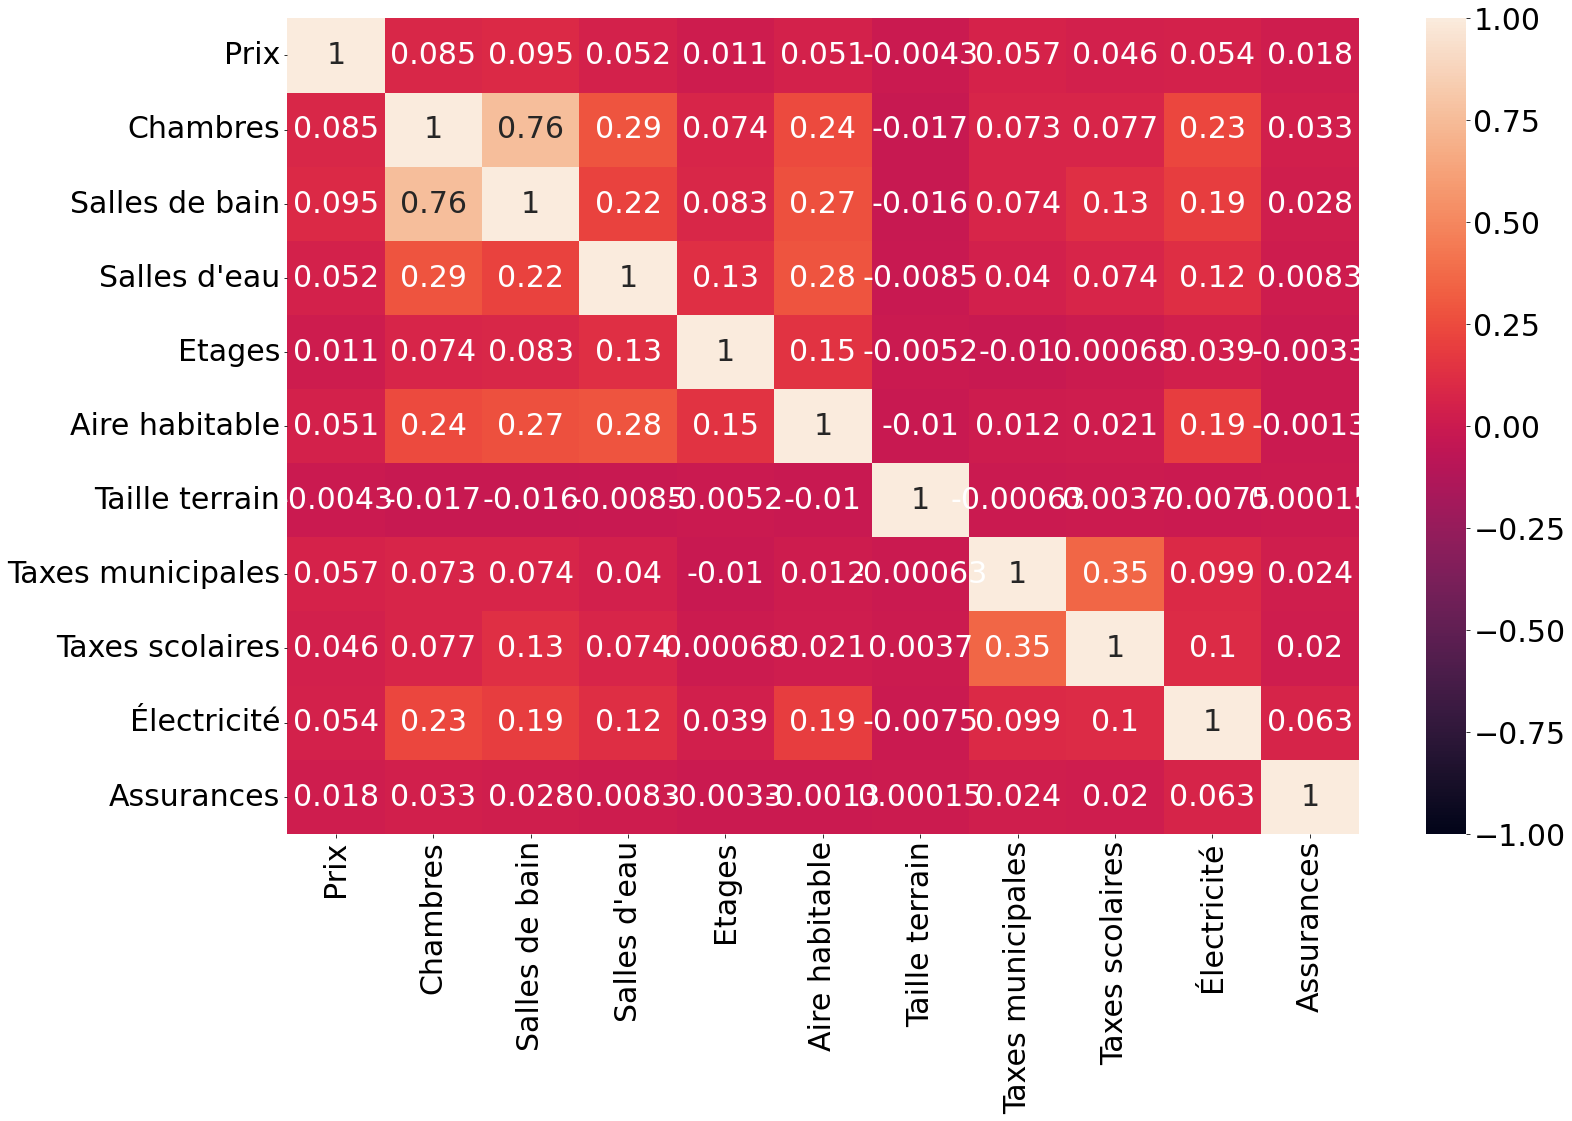

In [227]:
plt.figure(figsize=(24,15)) 

ax = sns.heatmap(dfimmob.corr(), vmin=-1, vmax=1, annot=True)
ax.figure.axes[-1].yaxis.label.set_size(20)

2. Presenter visuellement la proportion num´erique de chaque region en matiere
de nombre d’annonces, par rapport `a l’ensemble des annonces. Quelle
region occupe la plus petite proportion ?


In [228]:

region_annonces =  dfimmob.groupby('Region')['Adrresse'].count().reset_index(name="count")
region_annonces['Pourcentage'] = 100 * region_annonces['count']  / region_annonces['count'].sum()
region_annonces

Region  count  Pourcentage
0            Abitibi-Témiscamingue     30     0.484105
1                Bas-Saint-Laurent    183     2.953042
2                 Centre-du-Québec    233     3.759884
3                       Charlevoix     86     1.387768
4             Chaudière-Appalaches    304     4.905599
5                        Côte-Nord     38     0.613200
6                           Estrie    513     8.278199
7    Gaspésie-Îles-de-la-Madeleine     59     0.952074
8                       Lanaudière    384     6.196547
9                      Laurentides    612     9.875746
10                           Laval    167     2.694852
11                        Mauricie    191     3.082137
12                Montréal / l'Île    816    13.167662
13  Montérégie (Rive-Sud Montréal)    755    12.183315
14                Montérégie Ouest     89     1.436179
15                       Outaouais    416     6.712926
16                        Portneuf     71     1.145716
17                Québec Rive-Nord    737    11.892851
18         Québec Rive-Sud (Lévis)    243     3.921252
19         Saguenay-Lac-Saint-Jean    270     4.356947

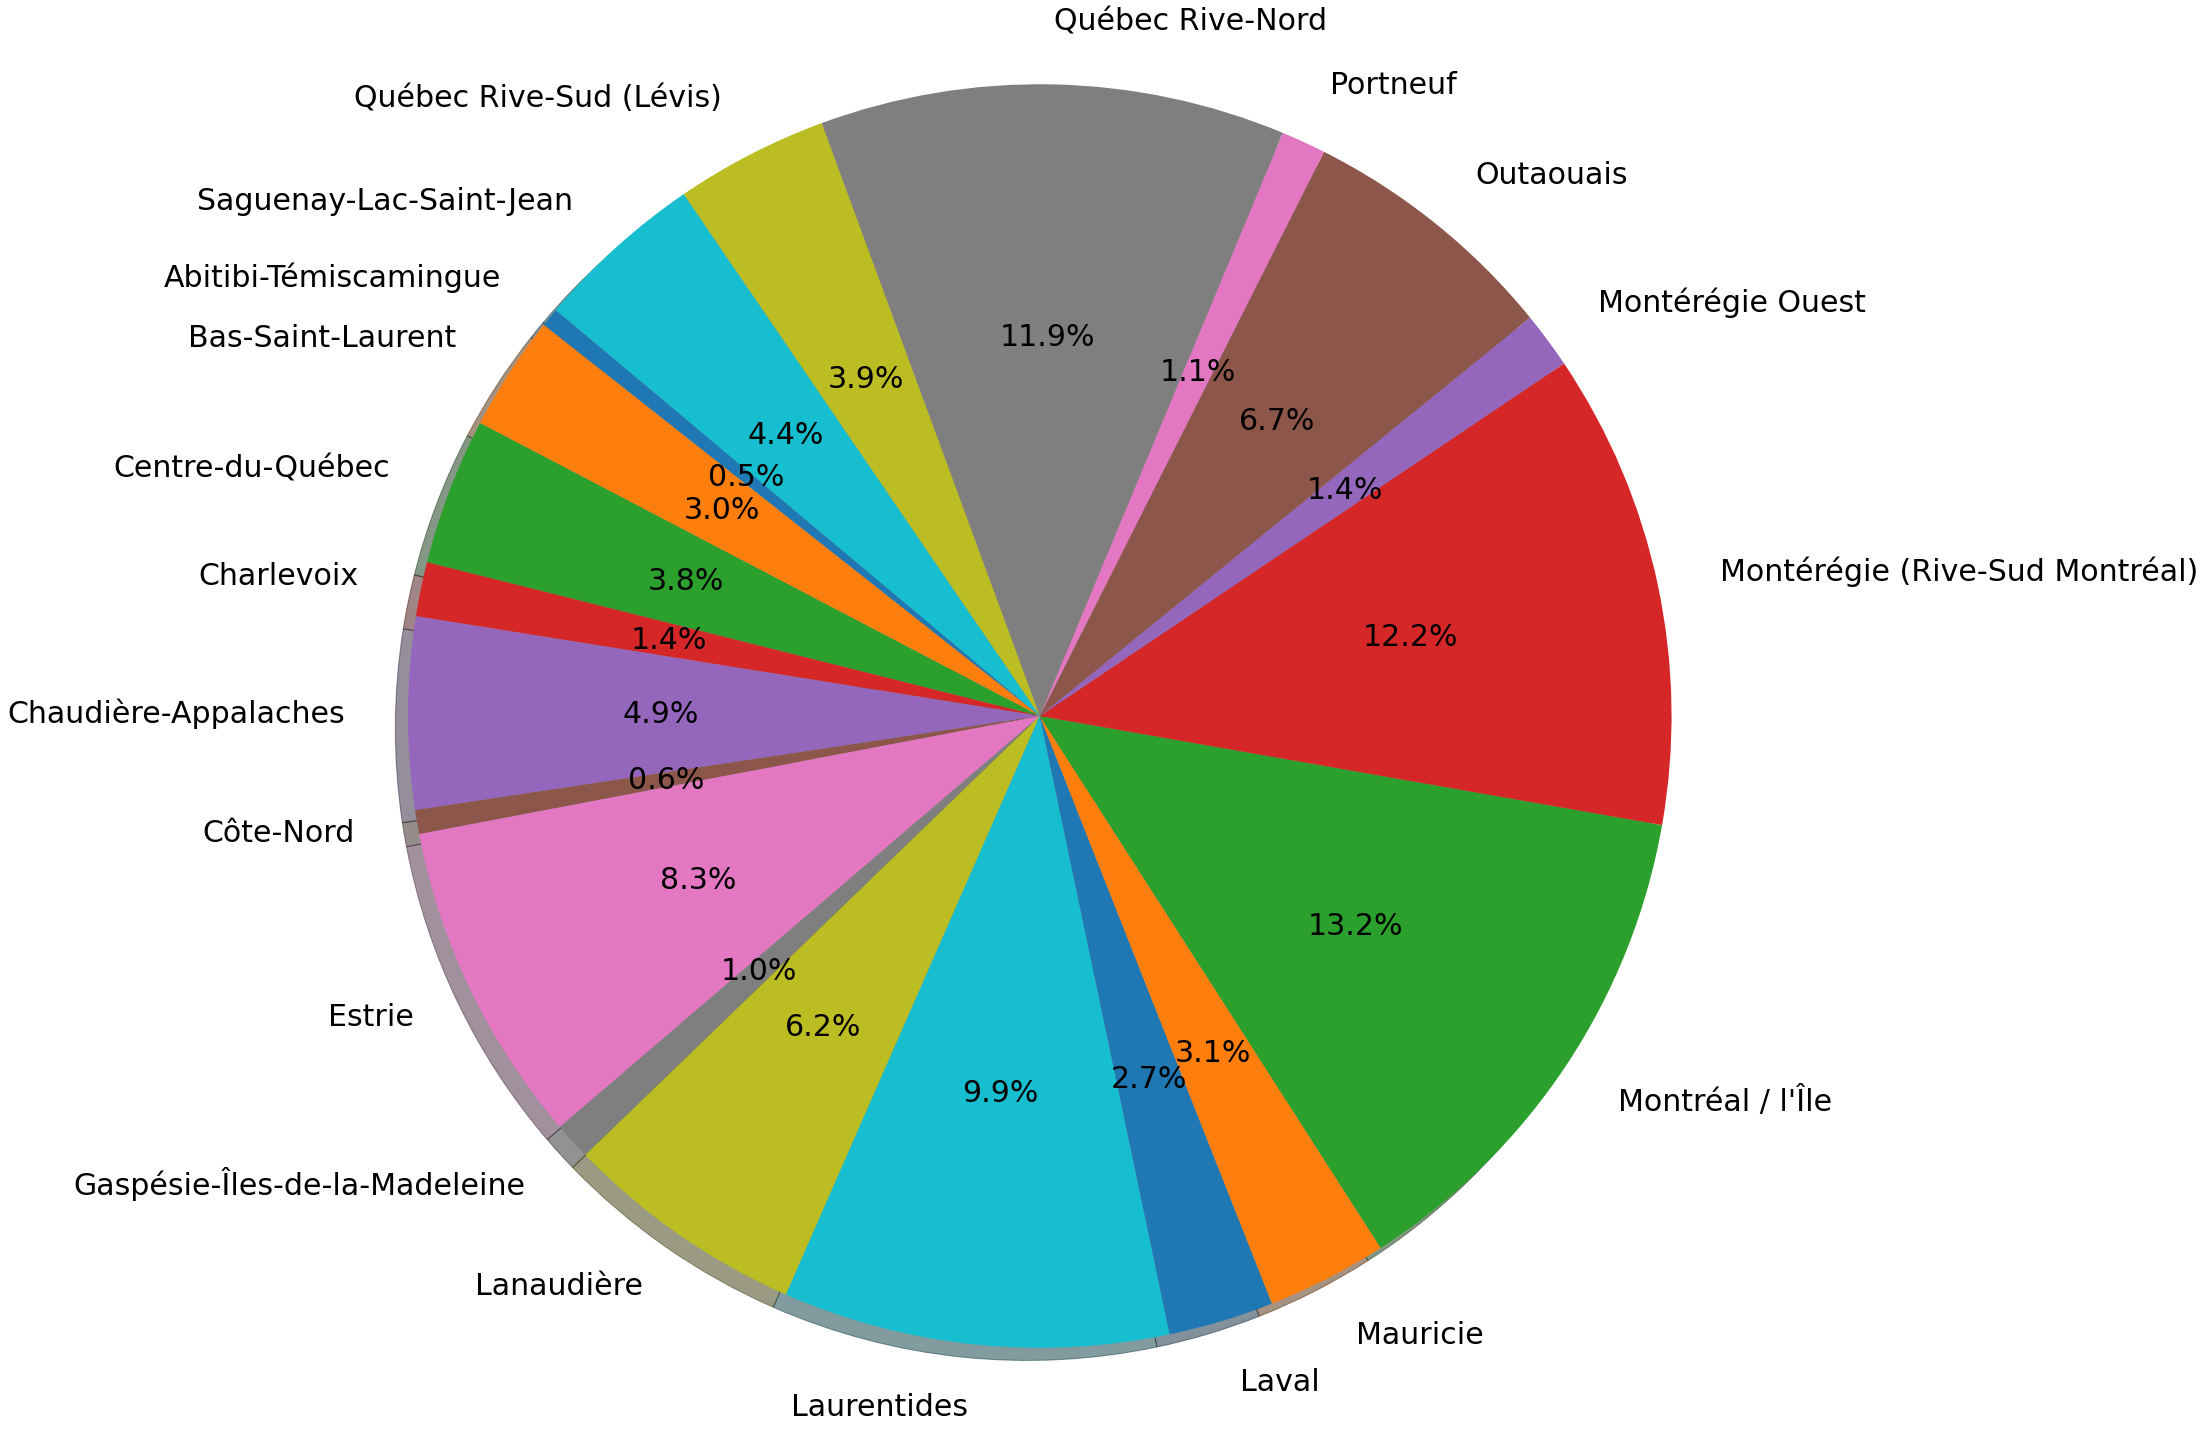

In [229]:

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  

plt.rcParams['font.size'] = 30.0

plt.figure(figsize=(25,25))
plt.pie(region_annonces['Pourcentage'], labels=region_annonces['Region'], 
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

3. A l’aide d’un graphique different de celui de la question precedente, comparer le nombre d’annonces de vente pour chaque region. Quelle region possede le plus d’annonces de vente ?


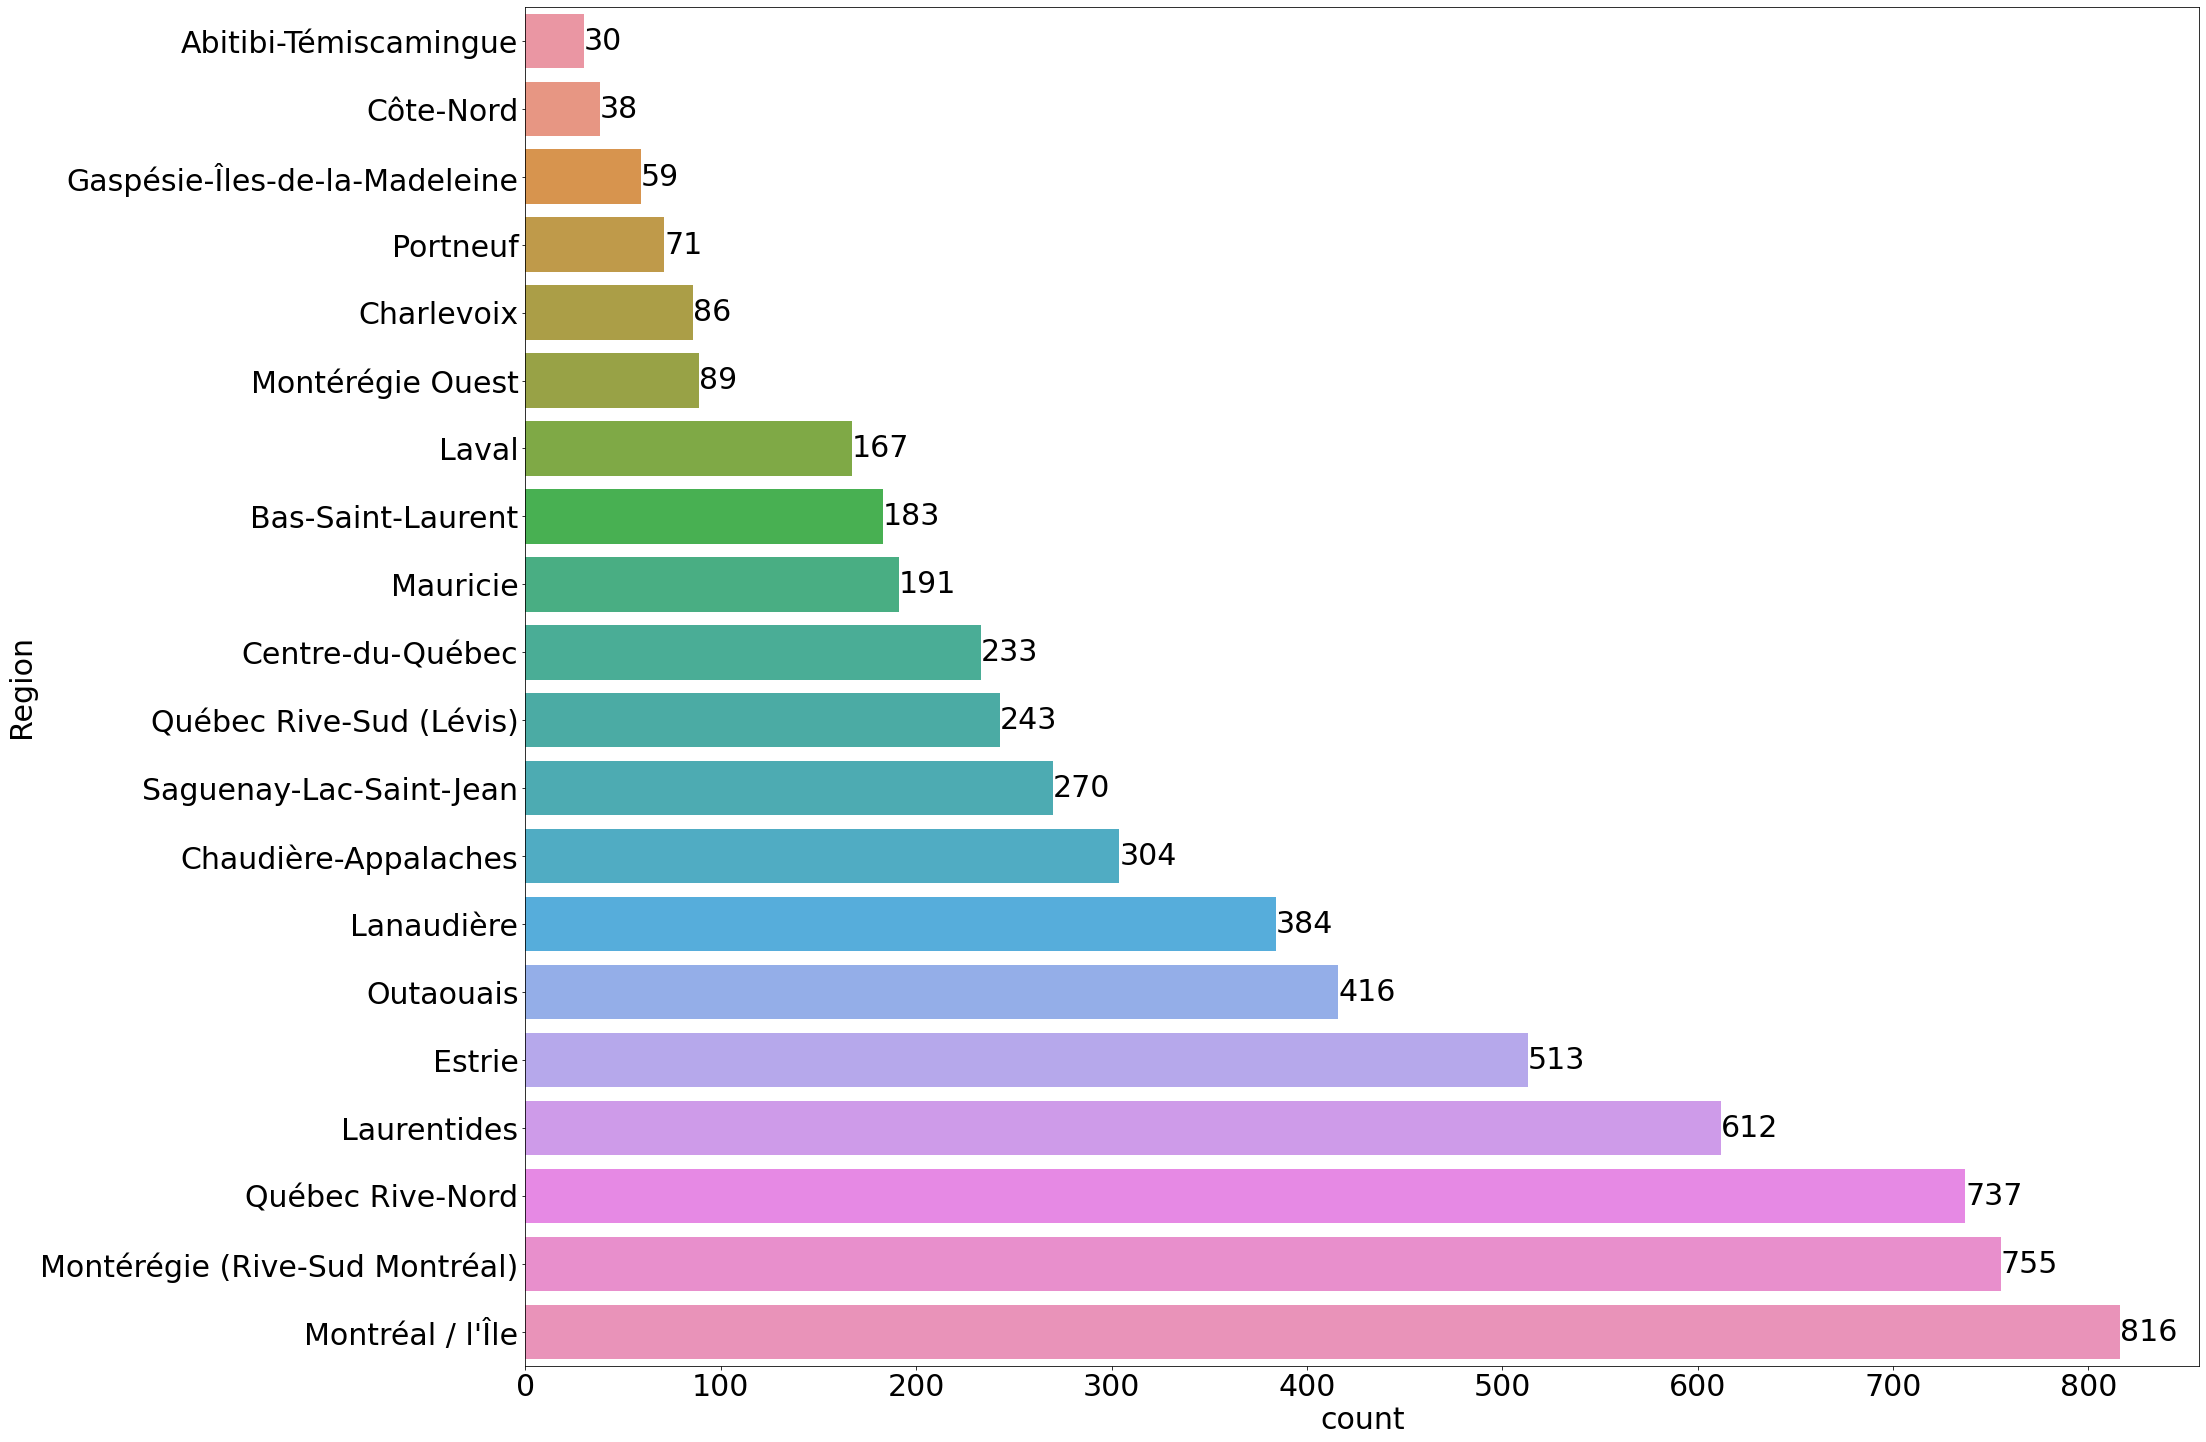

In [302]:
plt.figure(figsize=(30,25))

v = sns.barplot(y = 'Region',
            x = 'count',
            data = region_annonces, order=region_annonces.sort_values('count').Region)
 
v.bar_label(v.containers[0])
plt.show()

4. A l’aide d’un graphique, comparer le prix moyen des annonces pour chaque region. Quelle region possede le prix moyen le plus eleve ?


In [231]:
region_mean =  dfimmob.groupby('Region')['Prix'].mean().reset_index(name="Moyenne")
region_mean

Region        Moyenne
0            Abitibi-Témiscamingue  361771.633333
1                Bas-Saint-Laurent  363395.010929
2                 Centre-du-Québec  479788.093991
3                       Charlevoix  413840.970930
4             Chaudière-Appalaches  342968.092599
5                        Côte-Nord  279478.947368
6                           Estrie  520403.330409
7    Gaspésie-Îles-de-la-Madeleine  347209.983051
8                       Lanaudière  470880.963802
9                      Laurentides  589865.086520
10                           Laval  695573.934132
11                        Mauricie  366228.877696
12                Montréal / l'Île  850930.308260
13  Montérégie (Rive-Sud Montréal)  625530.829762
14                Montérégie Ouest  697581.483146
15                       Outaouais  557015.981875
16                        Portneuf  366320.439437
17                Québec Rive-Nord  428057.772646
18         Québec Rive-Sud (Lévis)  480250.671975
19         Saguenay-Lac-Saint-Jean  352387.059259

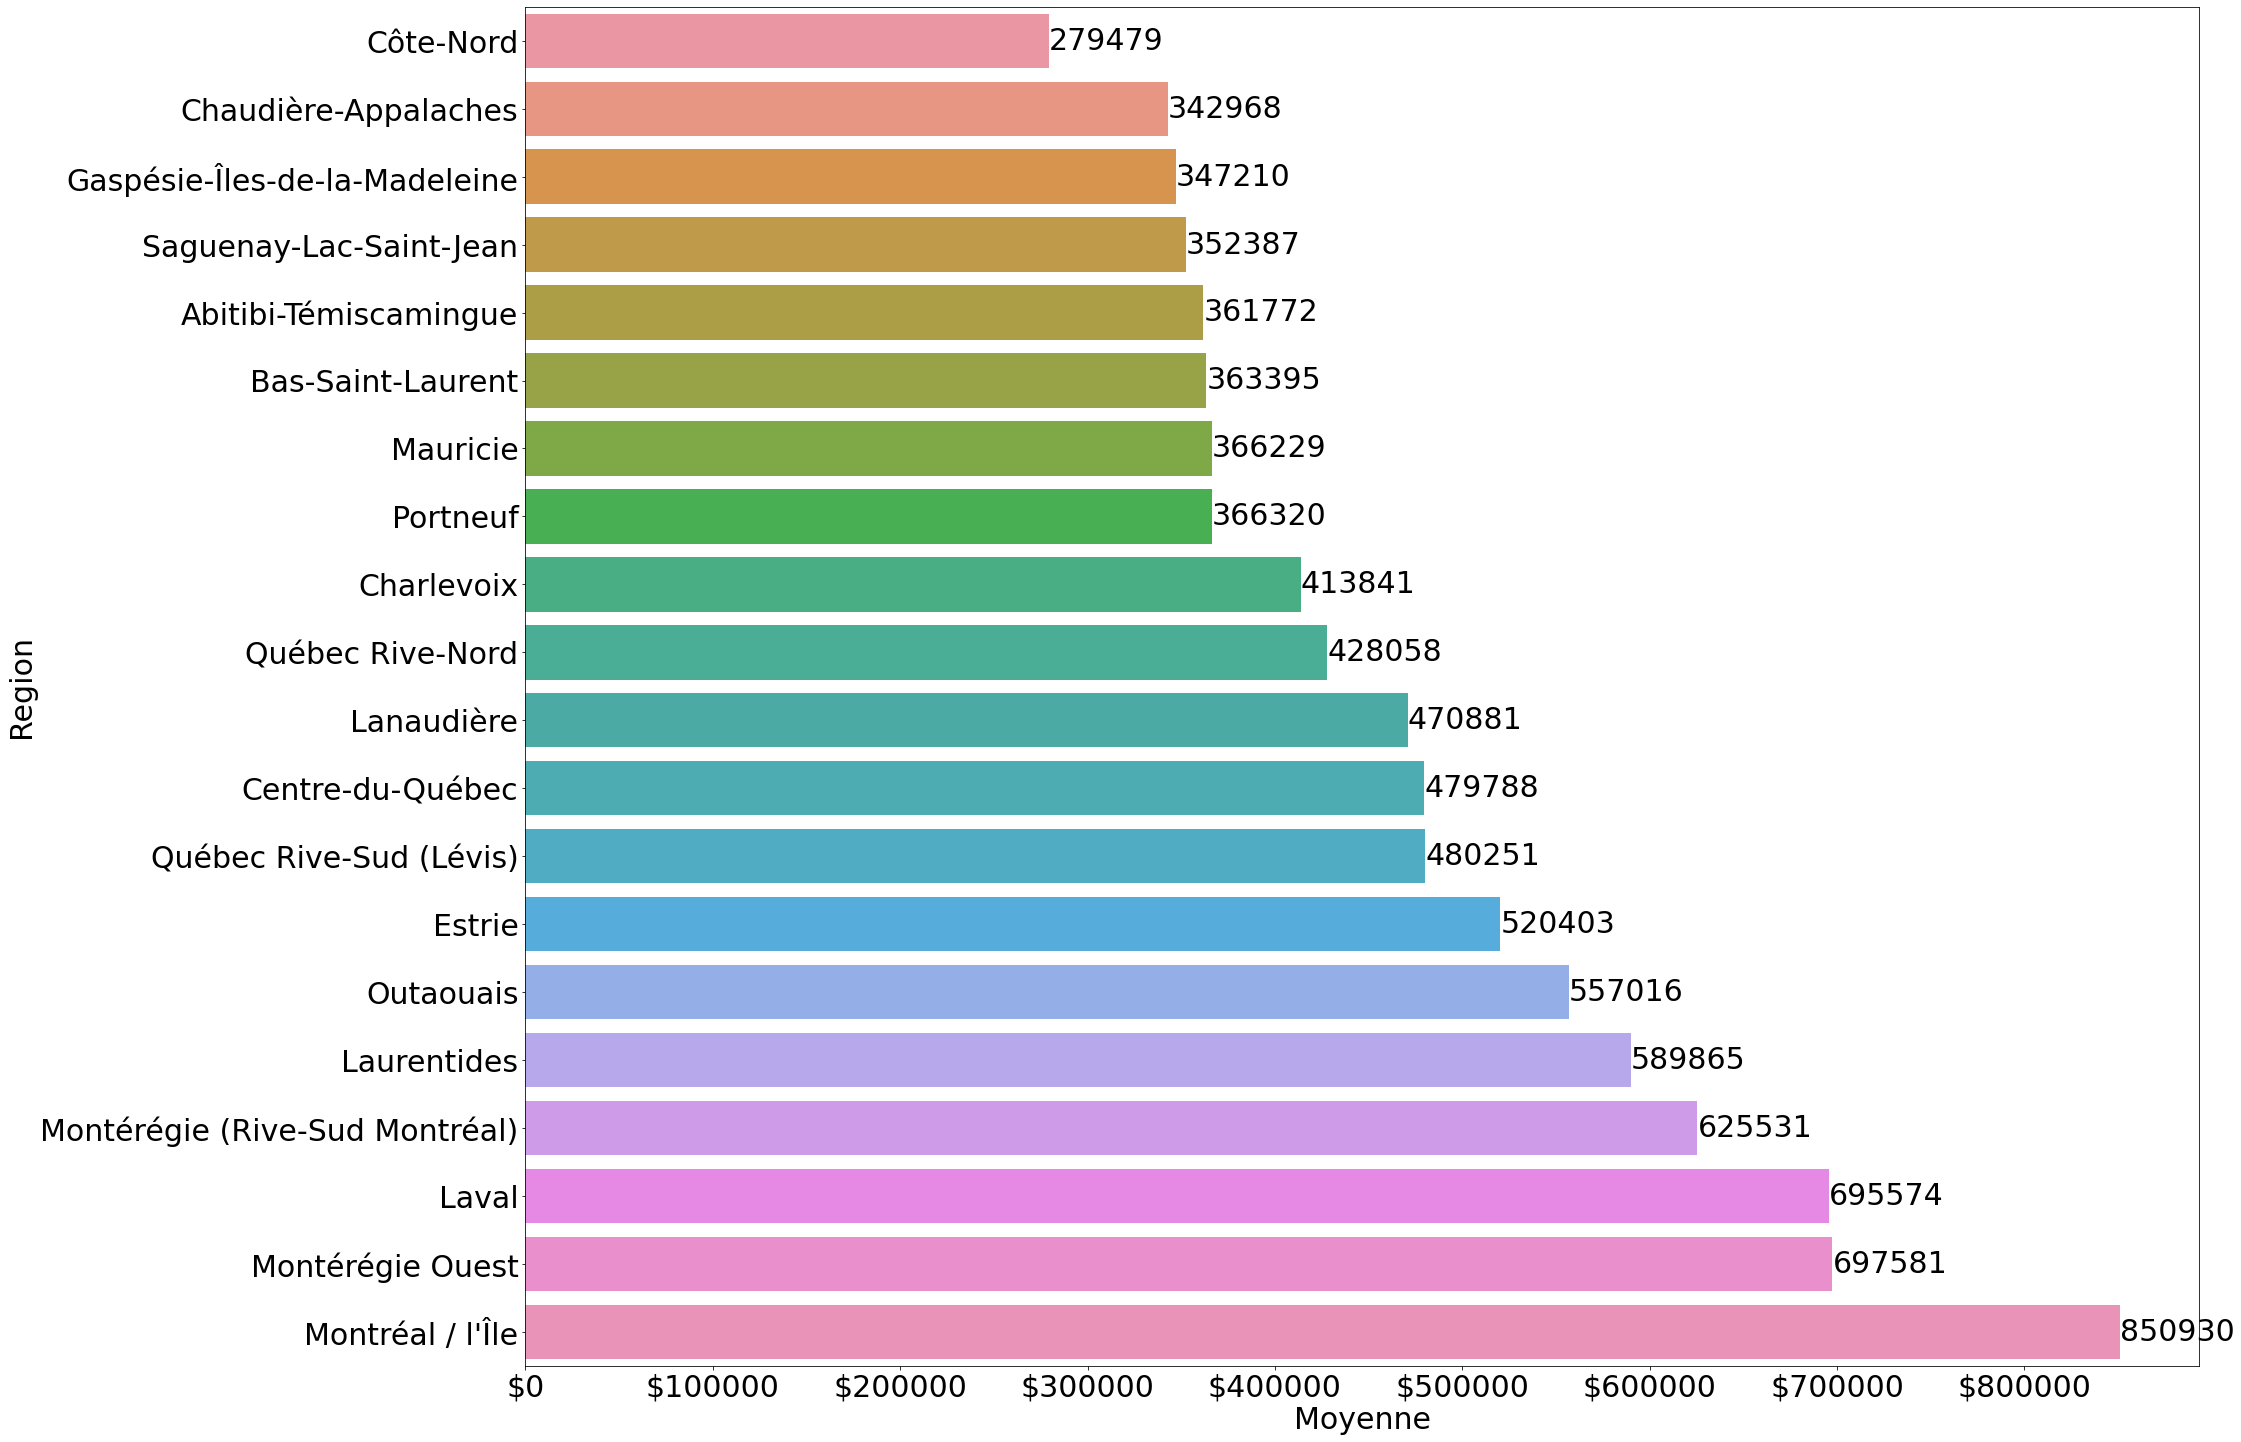

In [232]:
plt.figure(figsize=(30,25))

v = sns.barplot(y = 'Region',
            x = 'Moyenne' ,
            data = region_mean,order=region_mean.sort_values('Moyenne').Region)
v.bar_label(v.containers[0])
v.xaxis.set_major_formatter('${x:1.0f}')
plt.show()

5. Pour ce point, on se limite aux annonces ayant au moins 1 chambre et 1 salle de bain. A l’aide d’un graphique, comparer le prix moyen de ces  annonces pour chaque region. Quelle region possede le prix moyen le plus eleve pour les annonces avec au moins 1 chambre et 1 salle de bain?


In [233]:
df_ch_sb = dfimmob[((dfimmob['Chambres'] >= 1) & (dfimmob['Salles de bain'] >= 1))]
df_ch_sb

Adrresse         Prix  \
9                 2479, chemin Bellerive         1.00   
11                     1655, rue Rathier         1.00   
62    X, chemin de la Rivière des Cèdres     24500.00   
241                  129, rue Lemarquand     75000.00   
248                  10, rue de l'Église     75000.00   
...                                  ...          ...   
6821               7970, rue de Chamilly   3900000.00   
6822    5967, Rang du Bas-Saint-François   4000000.00   
6825                  3250, chemin Royal   5000000.00   
6829                       42, rue Tracy   6500000.00   
6832                 2248, rue Hochelaga  99999999.99   

                                        Ville                          Region  \
9                                    Carignan  Montérégie (Rive-Sud Montréal)   
11            Trois-Rivières (Trois-Rivières)                        Mauricie   
62                           Portneuf-sur-mer                       Côte-Nord   
241                                 Paspebiac   Gaspésie-Îles-de-la-Madeleine   
248                       St-Marc-Du-Lac-Long               Bas-Saint-Laurent   
...                                       ...                             ...   
6821                            Saint-Léonard                Montréal / l'Île   
6822                             Duvernay-Est                           Laval   
6825              Ile d'Orléans (St-Francois)                Québec Rive-Nord   
6829                             St-Hippolyte                     Laurentides   
6832  Ville-Marie (Centre-Ville et Vieux Mtl)                Montréal / l'Île   

      Chambres  Salles de bain  Salles d'eau  Etages  Aire habitable  \
9            3               1             0       1          700.00   
11           3               2             0       2         2750.00   
62           1               1             0       1          330.00   
241          3               1             1       2          904.17   
248          3               2             0       2          968.75   
...        ...             ...           ...     ...             ...   
6821        13               6             5       0            0.00   
6822         4               2             1       3            0.00   
6825         3               2             2       2         3016.05   
6829         3               2             0       2         4800.00   
6832         1               1             0       1          742.00   

      Taille terrain  Taxes municipales  Taxes scolaires  Électricité  \
9           10375.00            1194.86       138.600000         0.00   
11          14412.00            7670.00       350.000000      3576.00   
62          43000.00             127.00        75.000000         0.00   
241          8600.00            1512.77       250.589667        44.58   
248          7771.00            1875.00       200.000000      1200.00   
...              ...                ...              ...          ...   
6821         8775.00           10286.25      1249.340000       600.00   
6822      2918520.01            3037.46       335.630000         0.00   
6825      3893844.61            4046.92       764.750000      3455.79   
6829      8712000.03            5033.13       943.500000      1600.00   
6832         1600.00            1940.00       230.000000      1000.00   

       Assurances  
9     1278.256680  
11     800.000000  
62    4869.701538  
241   1585.020000  
248   2114.911186  
...           ...  
6821  5397.660000  
6822  1006.691967  
6825  5493.600000  
6829  4432.000000  
6832   350.000000  

[5043 rows x 14 columns]

In [234]:
region_mean2 =  df_ch_sb.groupby('Region')['Prix'].mean().reset_index(name="Moyenne")
region_mean2

Region        Moyenne
0            Abitibi-Témiscamingue  391322.681818
1                Bas-Saint-Laurent  400996.101695
2                 Centre-du-Québec  488300.607143
3                       Charlevoix  595123.684211
4             Chaudière-Appalaches  388650.217822
5                        Côte-Nord  246639.285714
6                           Estrie  570049.236364
7    Gaspésie-Îles-de-la-Madeleine  364567.352941
8                       Lanaudière  534553.046429
9                      Laurentides  668327.686711
10                           Laval  698682.528662
11                        Mauricie  419498.485075
12                Montréal / l'Île  840756.092408
13  Montérégie (Rive-Sud Montréal)  633191.732240
14                Montérégie Ouest  728986.609756
15                       Outaouais  582070.117799
16                        Portneuf  389510.377358
17                Québec Rive-Nord  441954.078621
18         Québec Rive-Sud (Lévis)  431322.337867
19         Saguenay-Lac-Saint-Jean  385662.532020

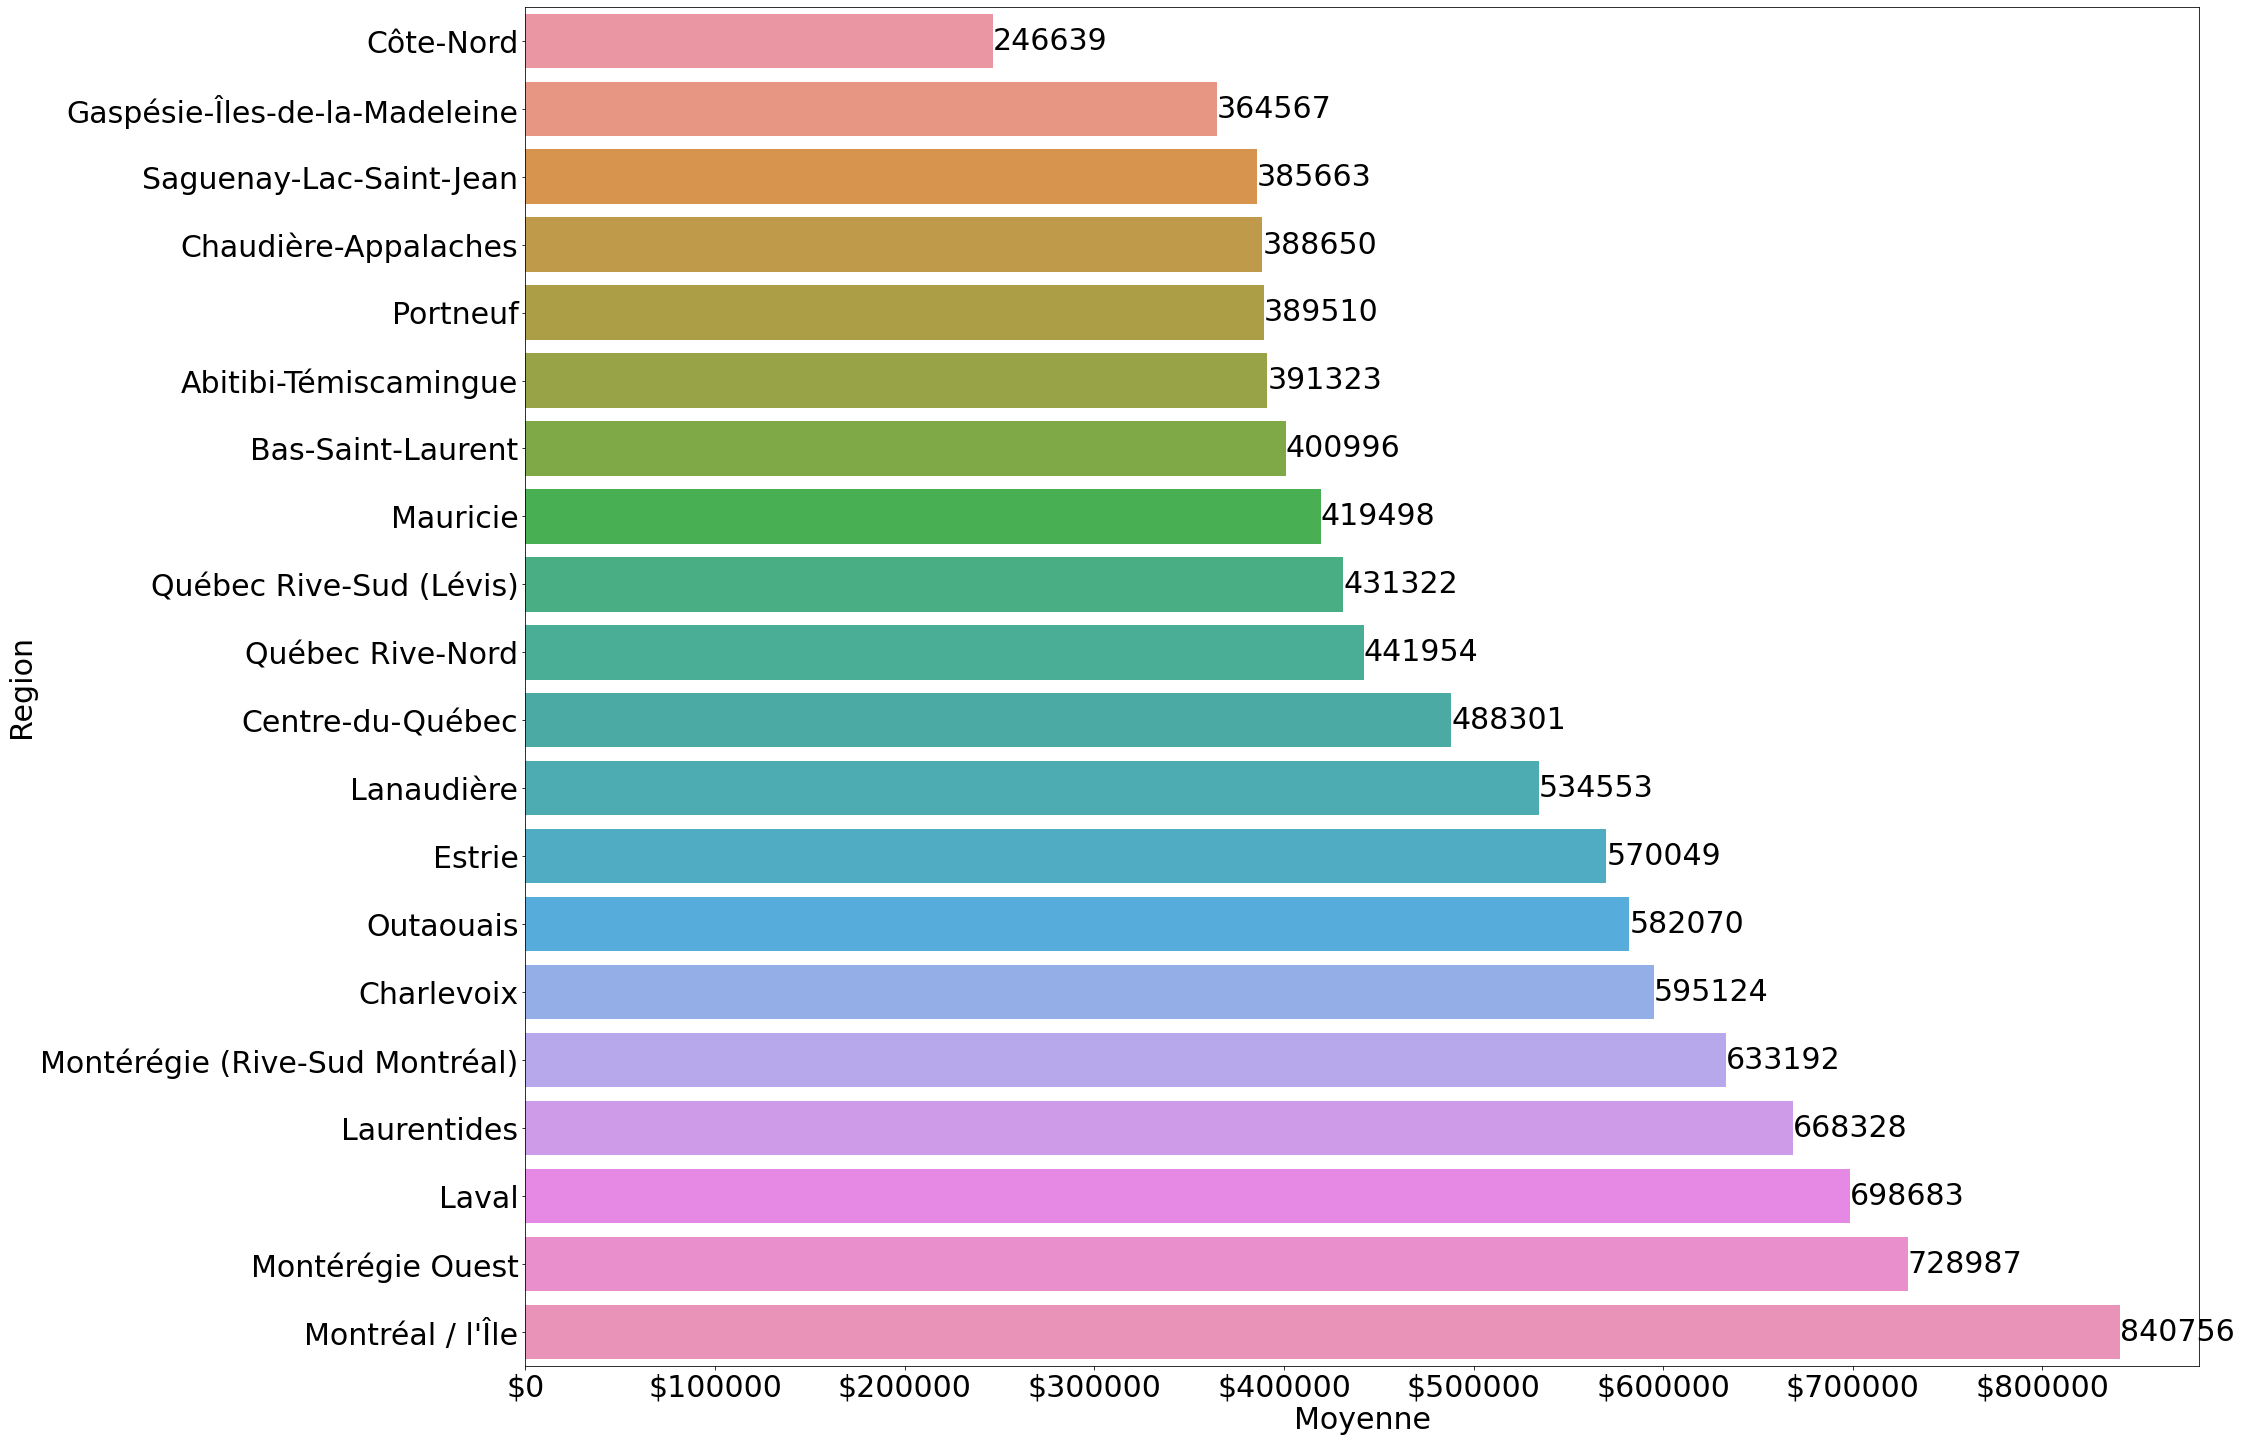

In [235]:
plt.figure(figsize=(30,25))

v = sns.barplot(y ="Region",x="Moyenne",data = region_mean2, order=region_mean2.sort_values('Moyenne').Region)
v.bar_label(v.containers[0])
v.xaxis.set_major_formatter('${x:1.0f}')

6. A l’aide d’un graphique, analyser la relation entre le prix des annonces et le nombre de chambres. Y a-t-il un lien quelconque ? Est-ce que la
region y joue un rˆole dans cette relation? Peut-on apercevoir des valeurs aberrantes ? Si oui identifiez-les : donnez toutes les valeurs des colonnes de ces valeurs aberrantes.


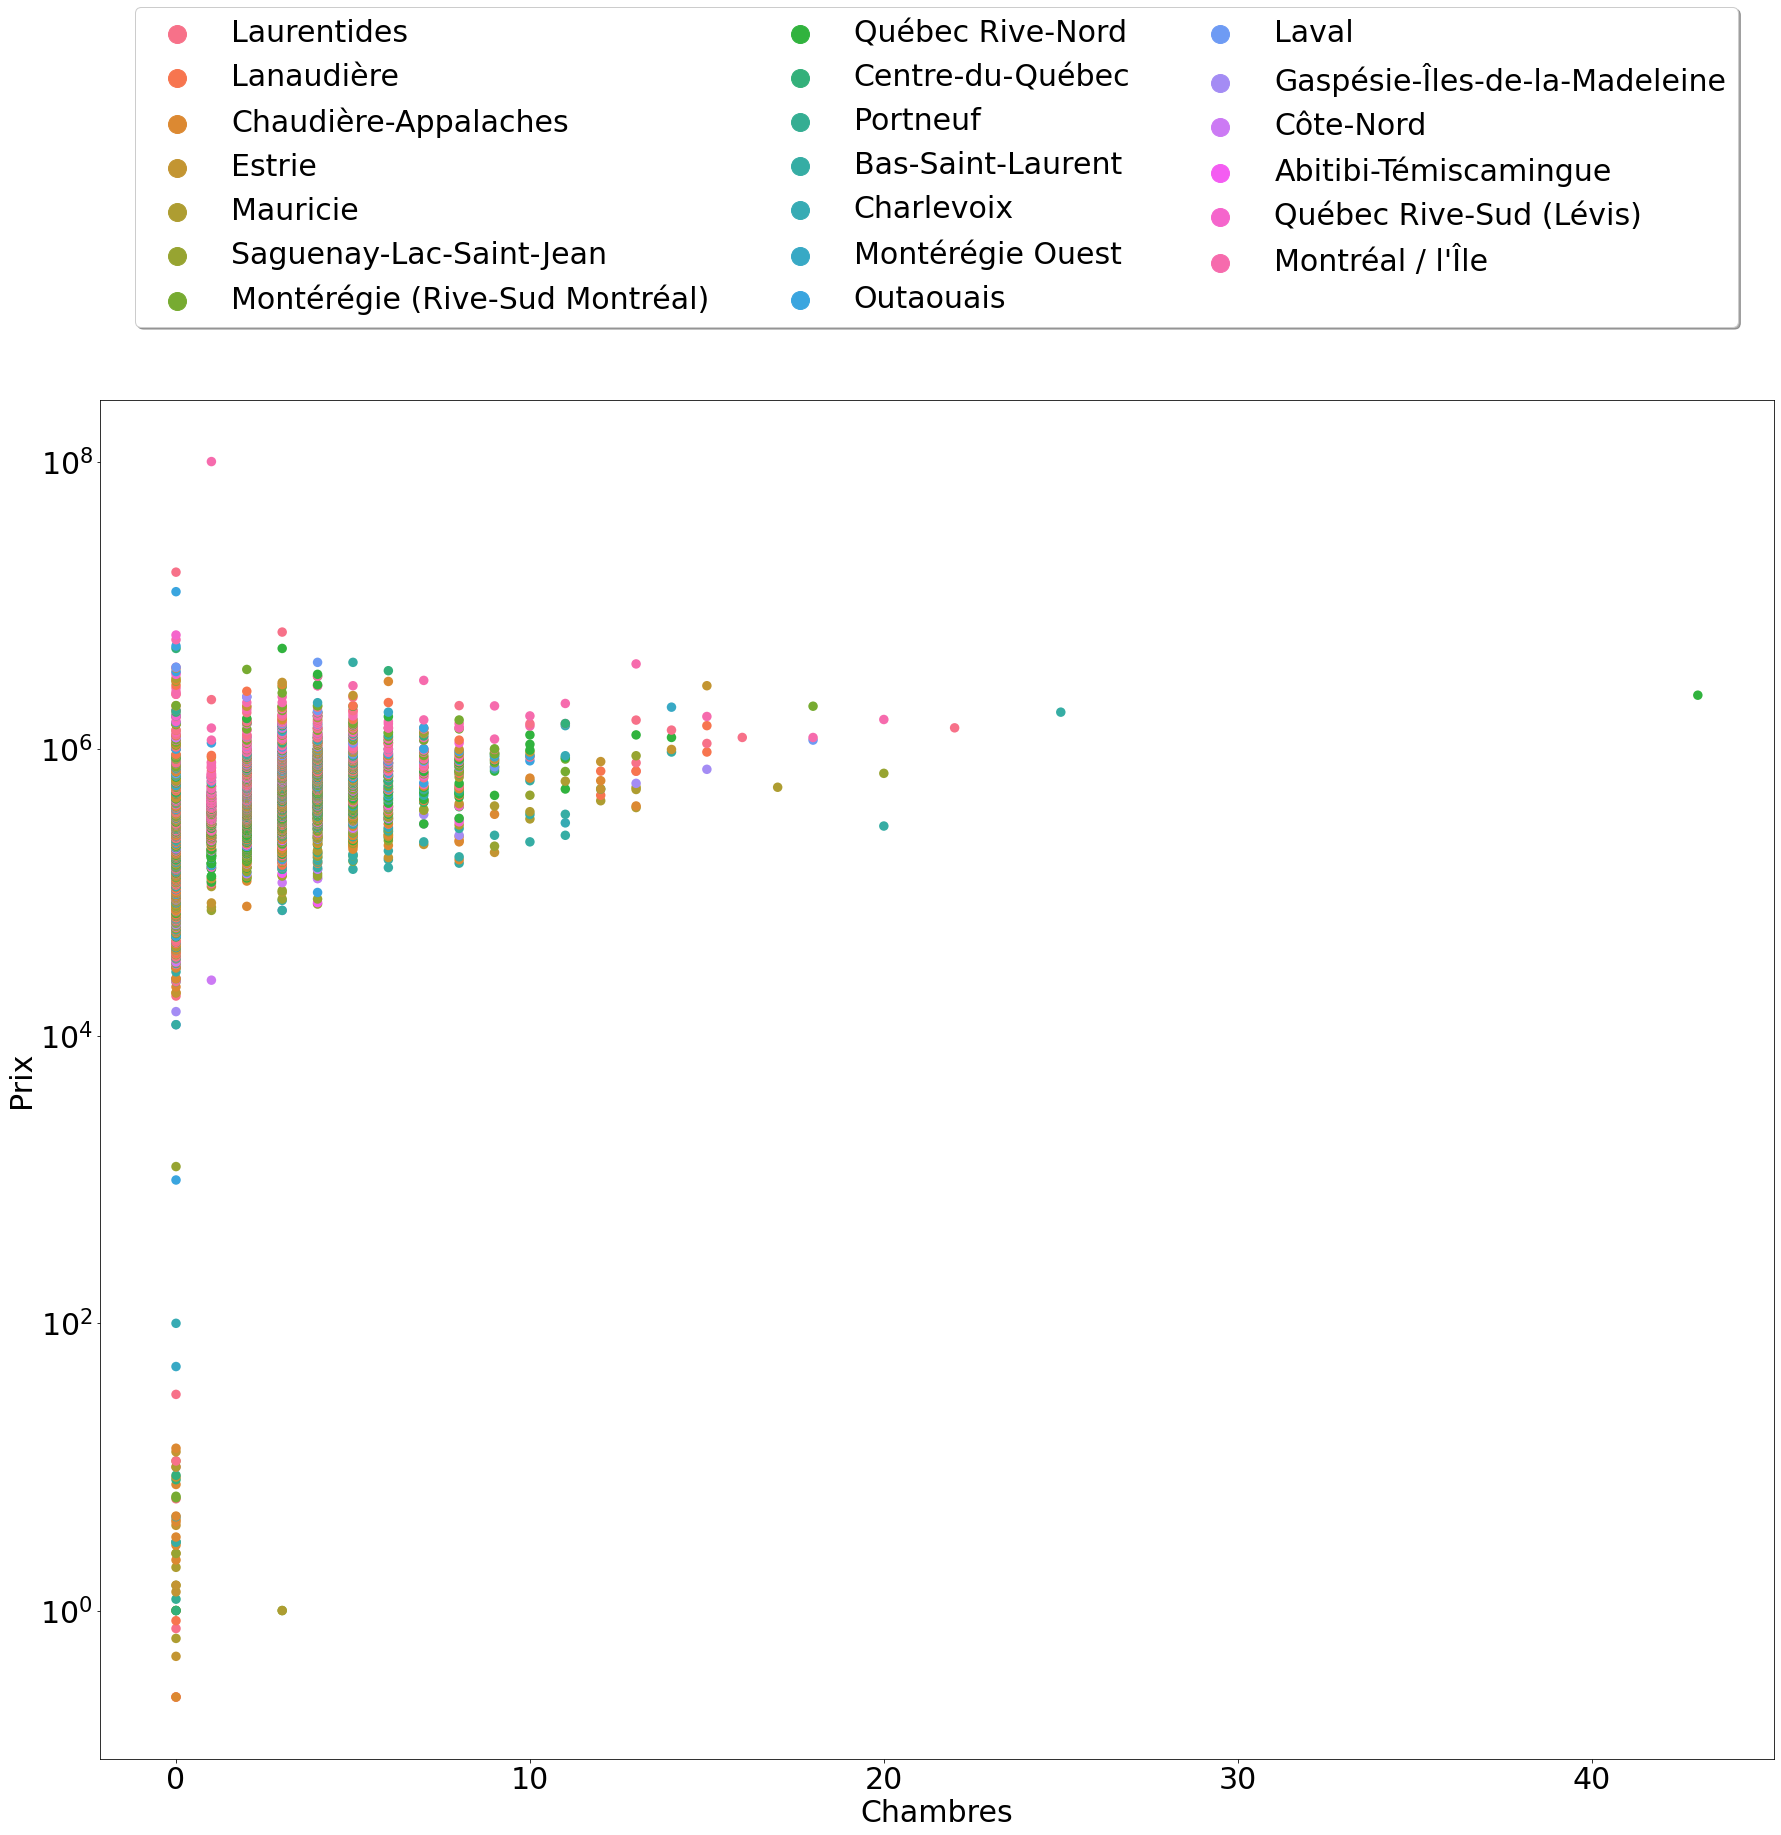

In [236]:
plt.figure(figsize=(30,25))

ax = sns.scatterplot(x='Chambres', y='Prix', data=dfimmob, hue='Region',s=90,linewidth=0)
plt.setp(ax.get_legend().get_texts(), fontsize='50') 
ax.set_yscale("log")
# ax.set_xscale("log")

# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1,fontsize=40, title_fontsize=20,markerscale=5)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),markerscale=3,
          ncol=3, fancybox=True, shadow=True)

plt.show()

7. A l’aide d’un graphique, analyser la relation entre la valeur des taxes  municipales annuelles des annonces et la taille du terrain. Y a-t-il un lien quelconque ? Est-ce que la r´egion y joue un rˆole dans cette relation?
Peut-on apercevoir des valeurs aberrantes ? Si oui identifiez-les : donnez toutes les valeurs des colonnes de ces valeurs aberrantes.


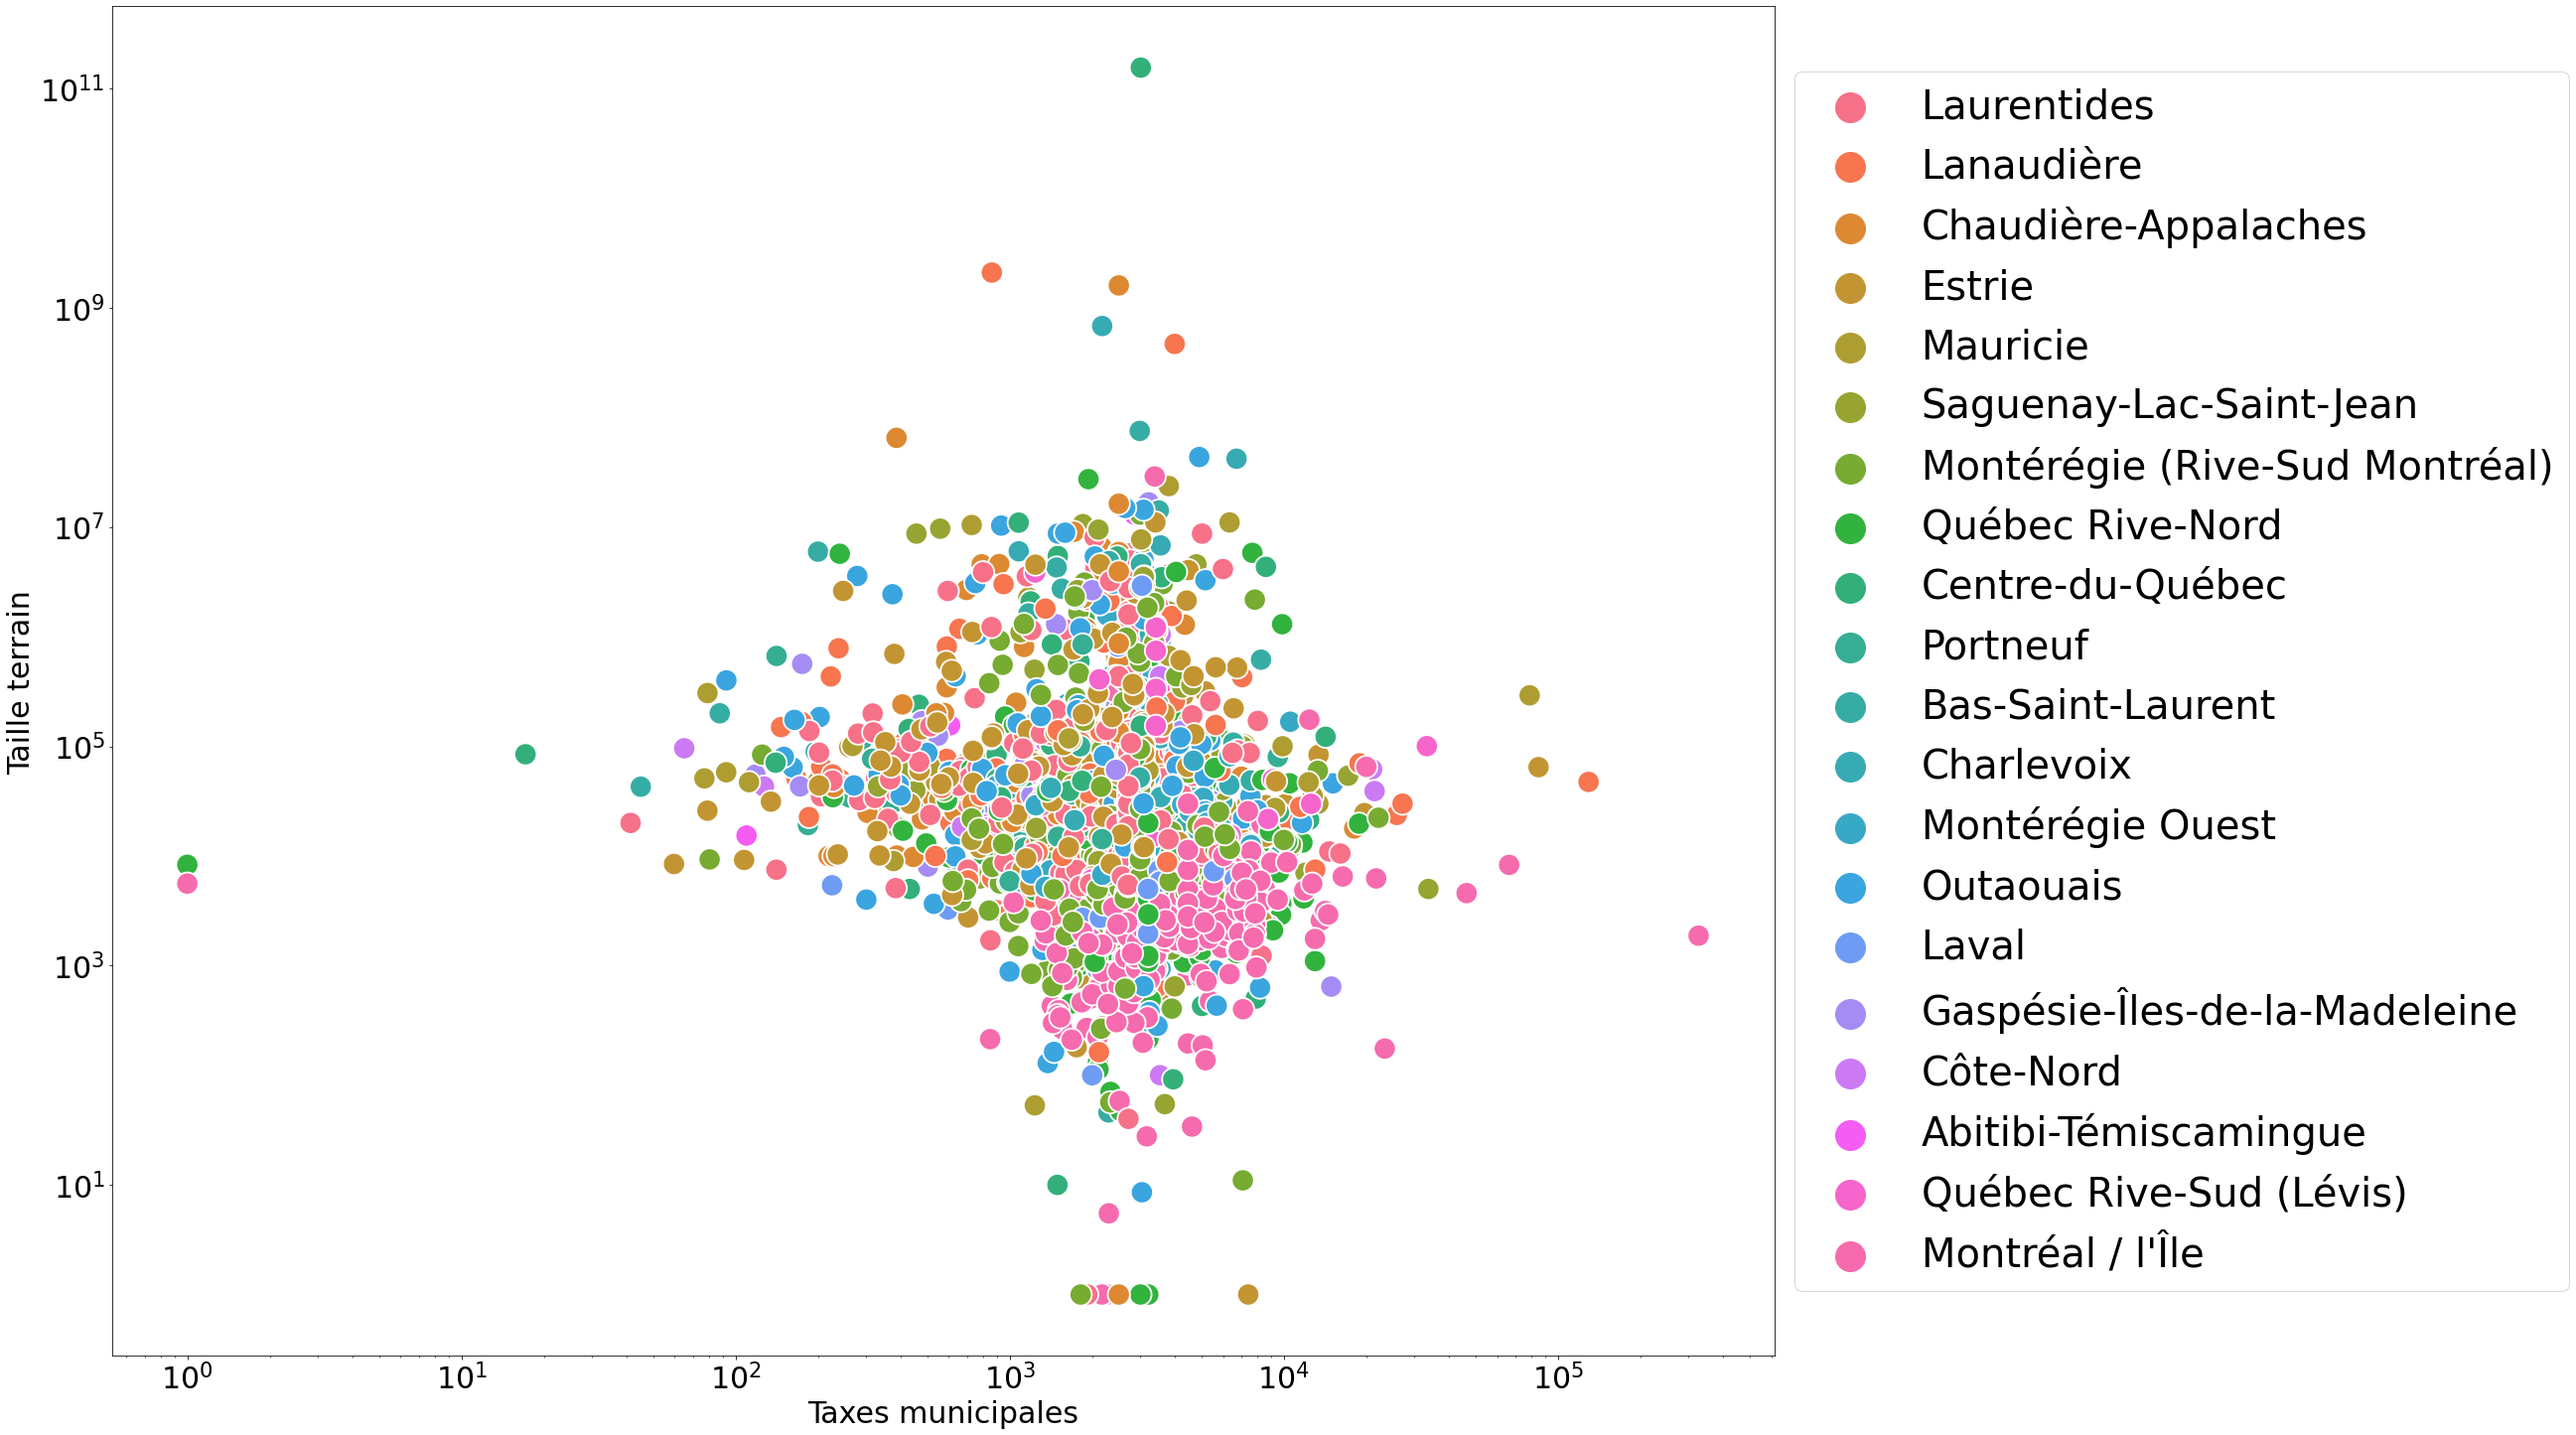

In [237]:
plt.figure(figsize=(30,25))

ax = sns.scatterplot(x='Taxes municipales', y='Taille terrain', data=dfimmob, hue='Region',s=500)
plt.setp(ax.get_legend().get_texts(), fontsize='50') 
ax.set_yscale("log")
ax.set_xscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1,fontsize=40, title_fontsize=20,markerscale=5)

plt.show()

In [238]:
dfimmob['Taille terrain'].max()

155186856471.77

8. A l’aide d’un graphique, analyser la relation entre la valeur des taxes municipales annuelles des annonces et le prix. Il y a-t-il un lien quelconque ?
Est-ce que la r´egion y joue un rˆole dans cette relation? Peut-on apercevoir des valeurs aberrantes ? Si oui identifiez-les : donnez toutes les valeurs des colonnes de ces valeurs aberrantes.


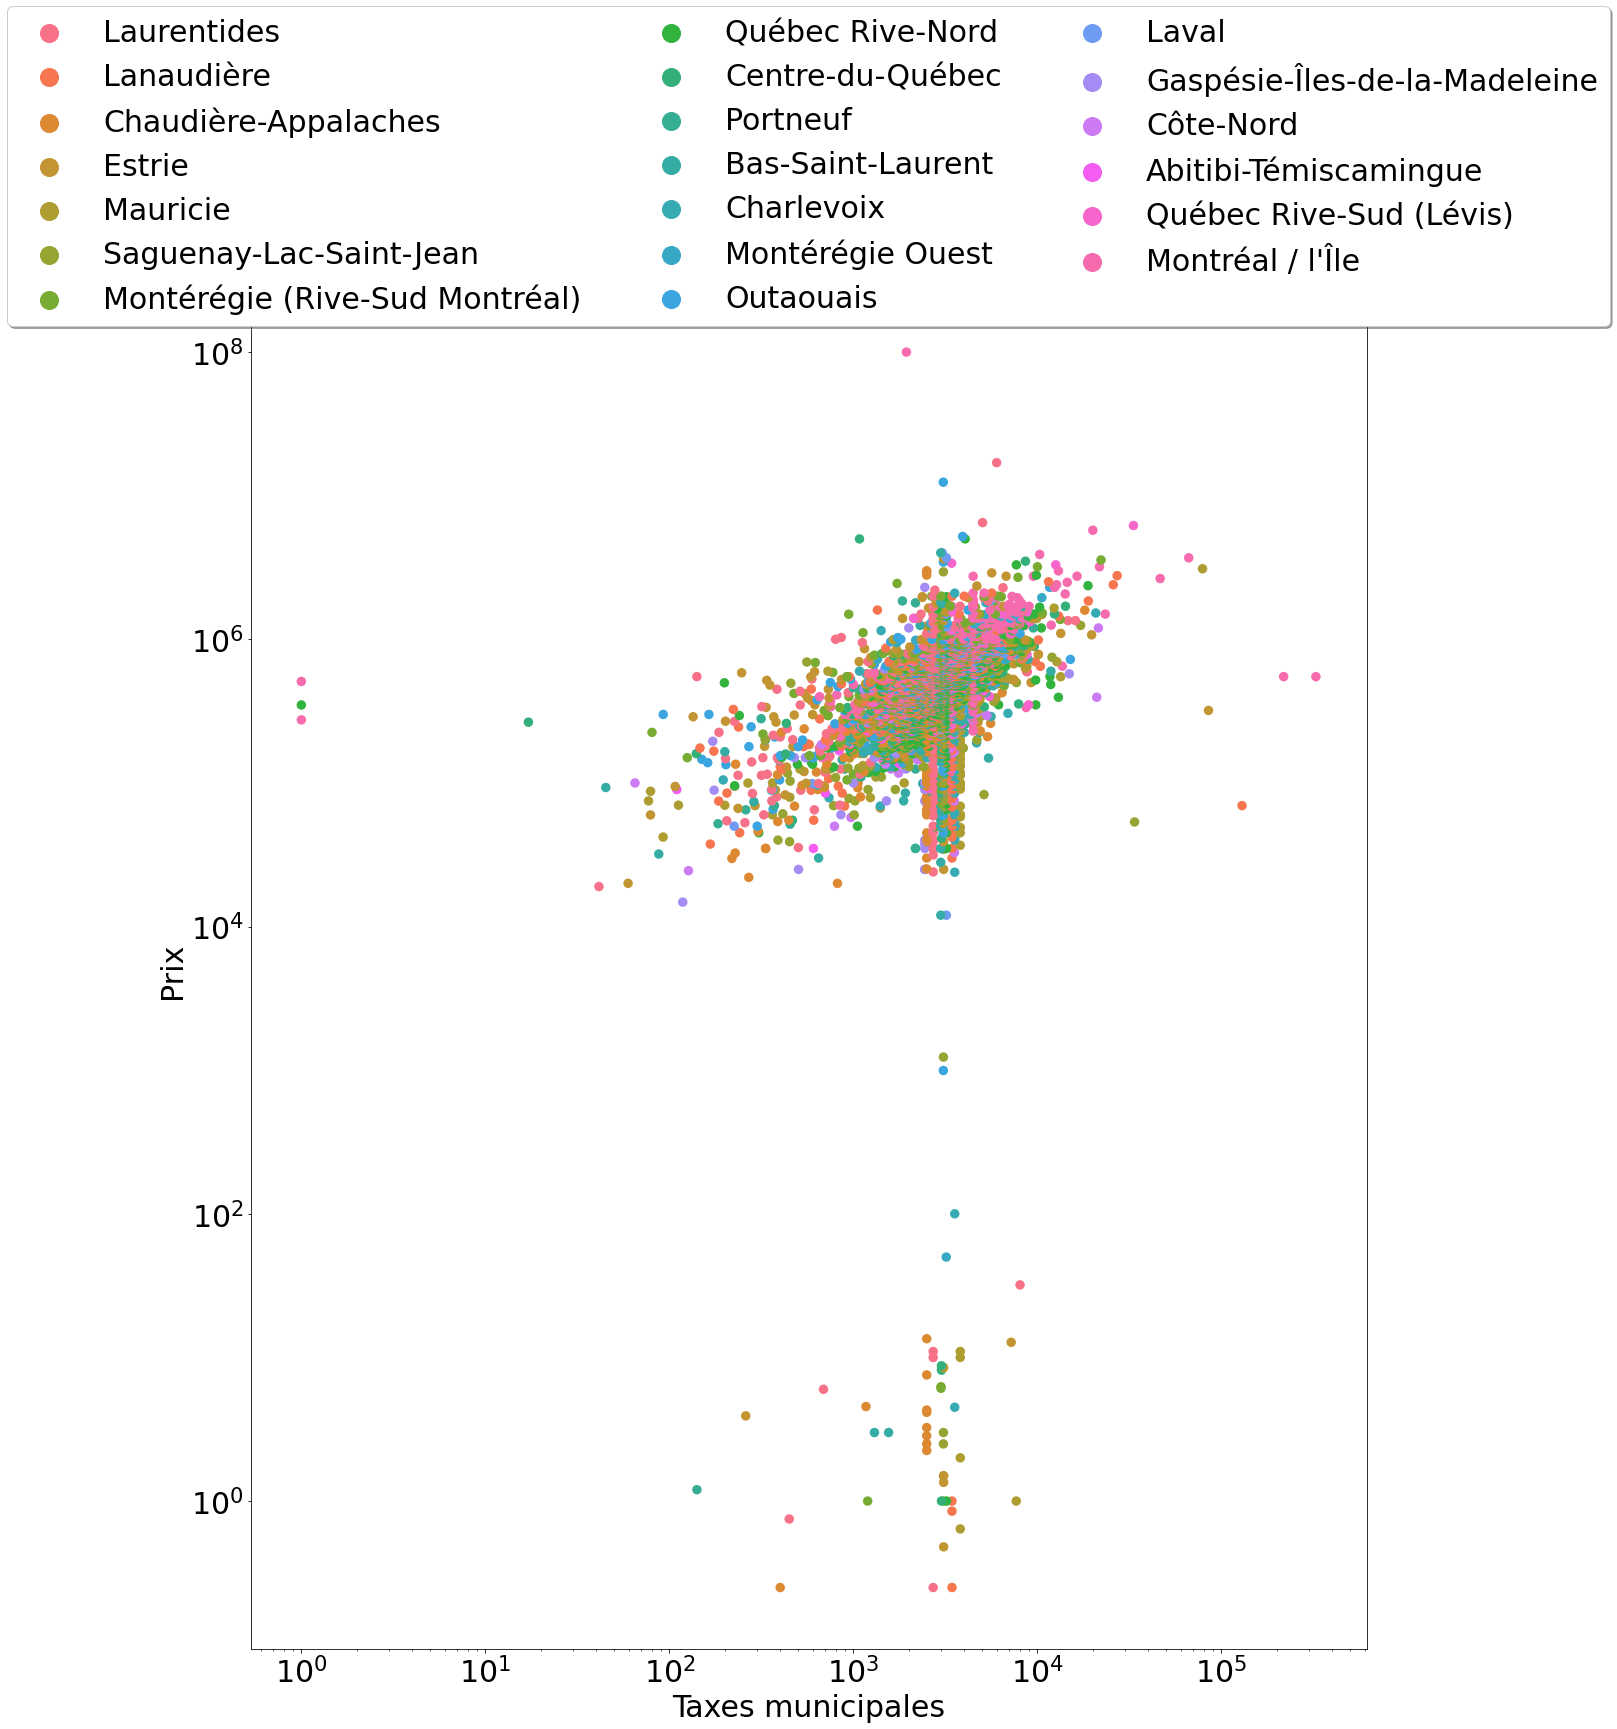

In [239]:
plt.figure(figsize=(20,25))


ax = sns.scatterplot(y='Prix', x='Taxes municipales', data=dfimmob, hue='Region',s=90,linewidth=0,edgecolor="none")
# plt.setp(ax.get_legend().get_texts(), fontsize='50') 
ax.set_xscale("log")
ax.set_yscale("log")


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22),markerscale=3,
          ncol=3, fancybox=True, shadow=True)
plt.show()

9. On s’int´eresse pour cette question aux annonces qui ont un prix affiche de moins de 1 million de $, pour toutes les regions. Dessiner dans un
meme graphique un boxplot representant la r´epartition de prix par region. Analyser de mani`ere d´etaill´ee le graphique obtenu.

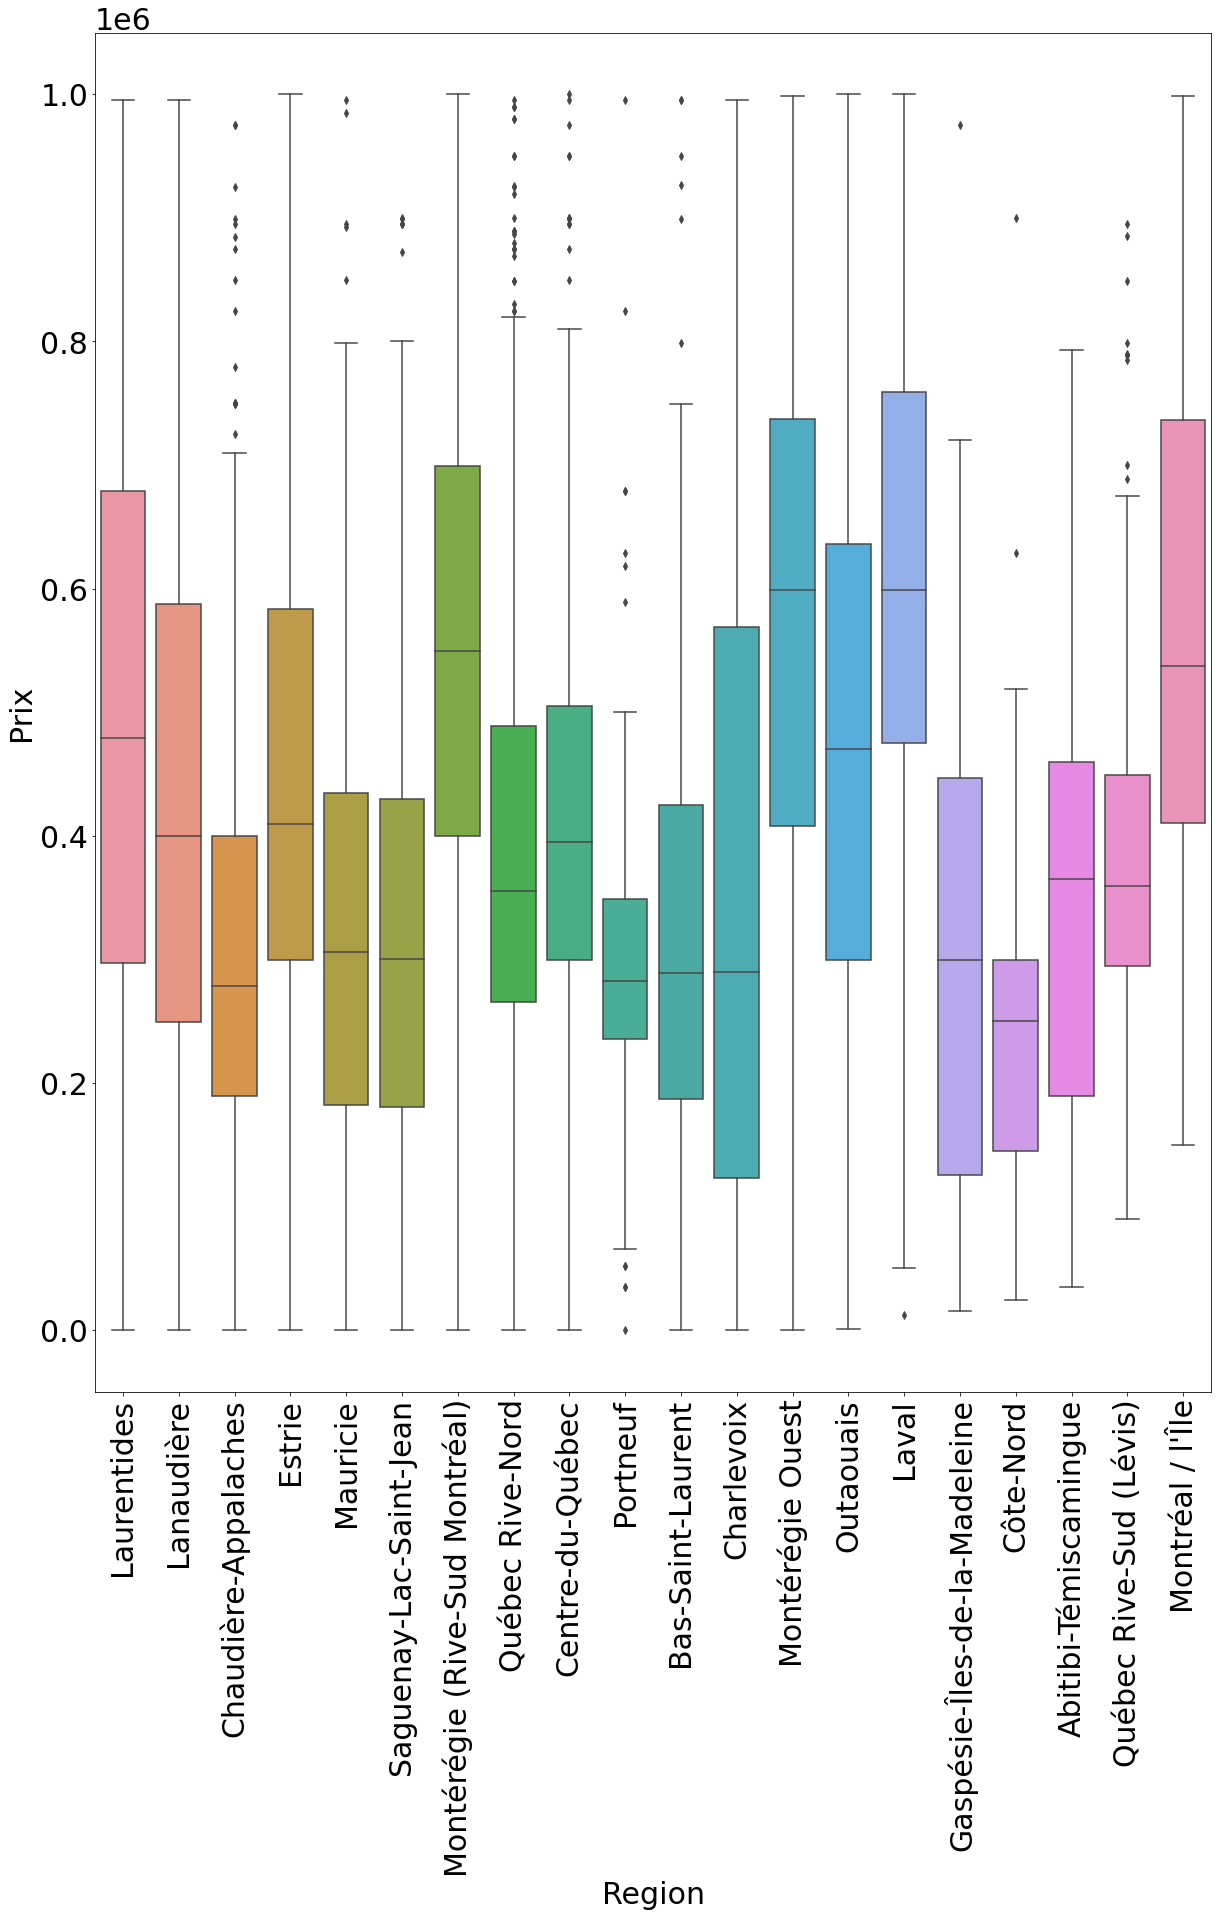

In [240]:
df_question9 = dfimmob[((dfimmob['Prix'] < 1000000))]
plt.figure(figsize=(20,25))

g = sns.boxplot(x="Region", y="Prix", data=df_question9) 
# g.set_yscale("log")
plt.setp(g.get_xticklabels(), rotation=90)

plt.show()

10. On s’interesse pour cette question aux maisons de 2 chambres au moins et une salle de bain au moins et qui coˆute moins de 1 million de $, pour toutes les r´egions. Dessiner dans un mˆeme graphique un boxplot repr´esentant la repartition de prix par regions. Analyser de mani`ere d´etaill´ee le graphique obtenu. Est-ce qu’il y a des diff´erences entre ce graphique et celui de la question pr´ec´edente ? Si oui donner en 4.


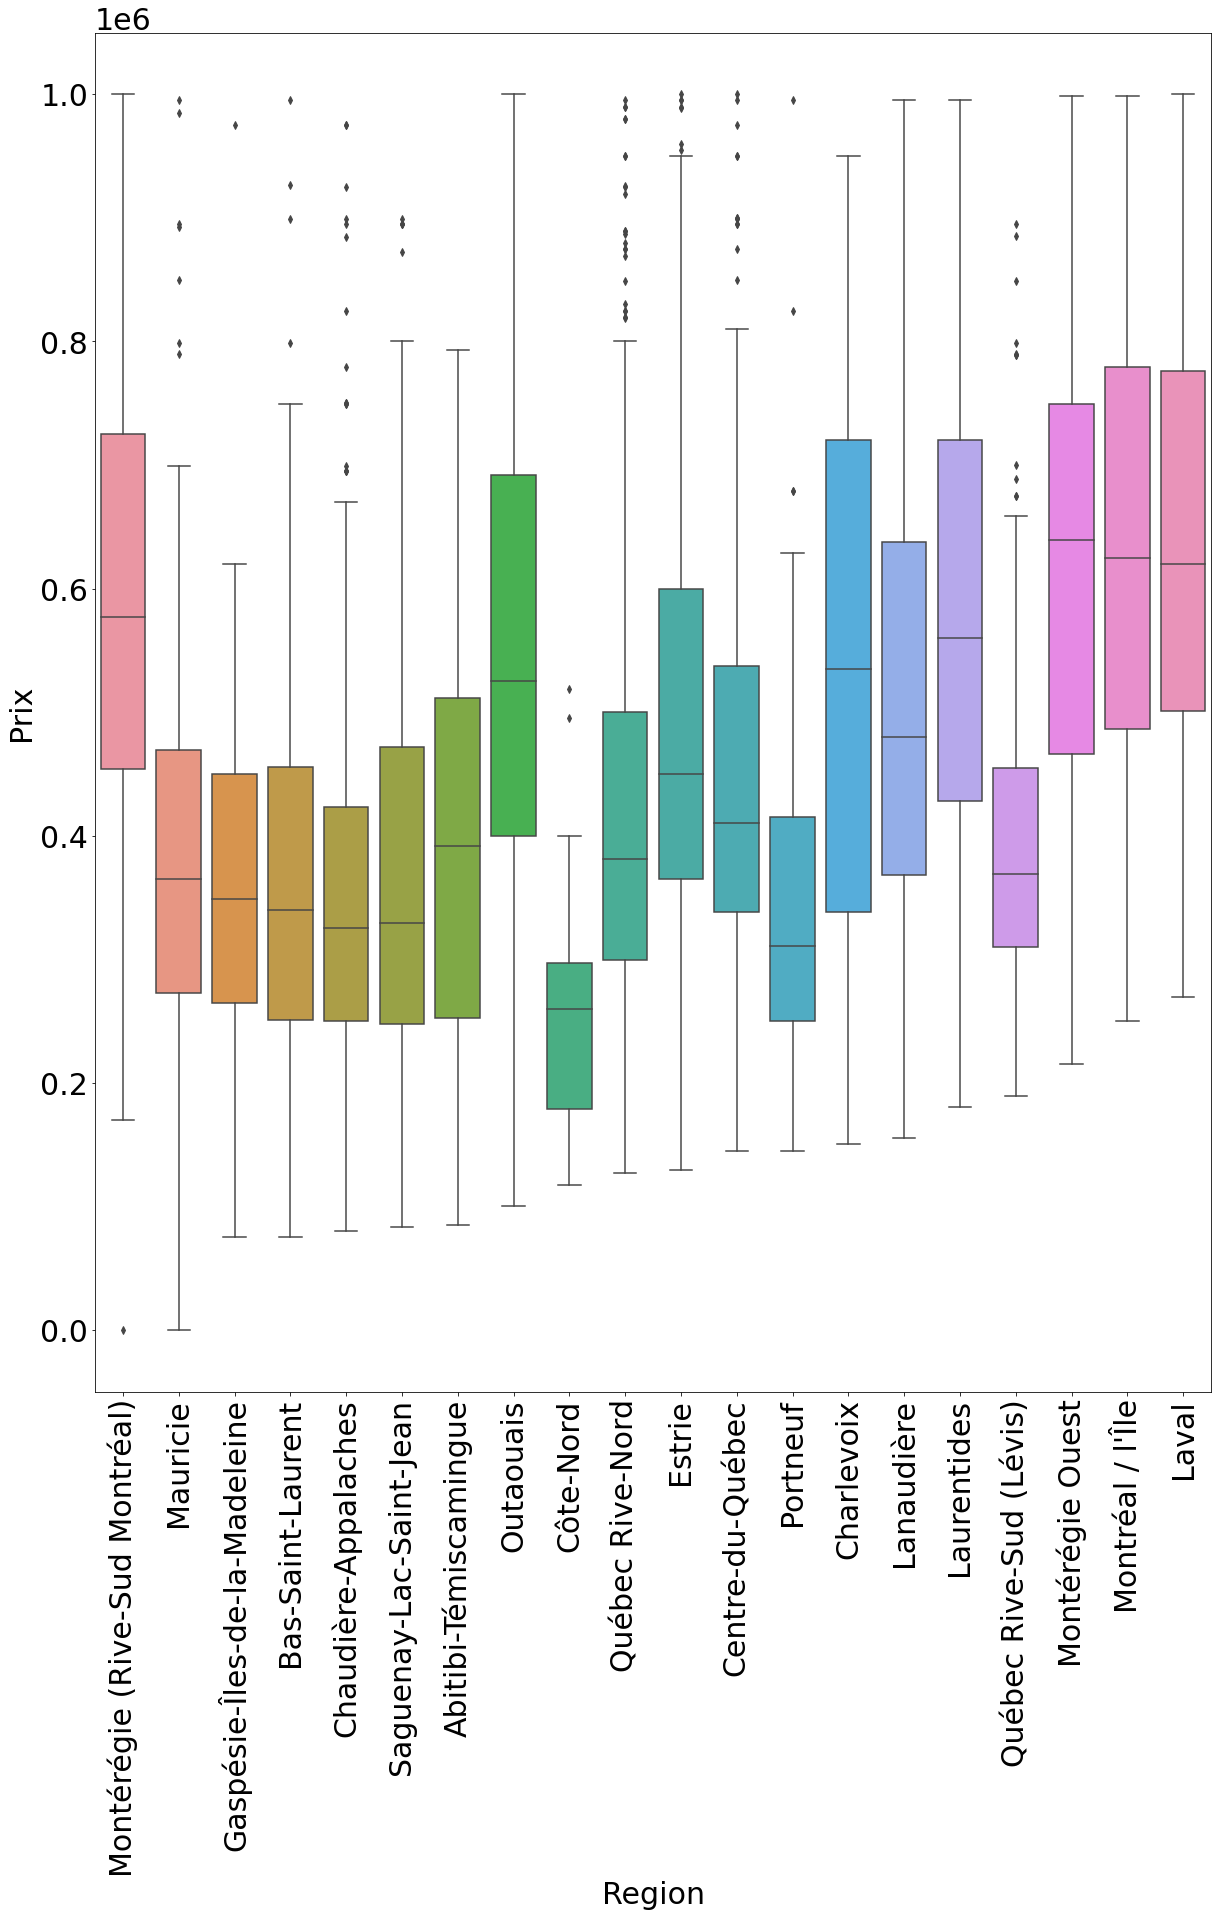

In [241]:
df_question10 = dfimmob[((dfimmob['Chambres'] >= 2) & (dfimmob['Salles de bain'] >= 1) & (dfimmob['Prix'] < 1000000))]
plt.figure(figsize=(20,25))

g = sns.boxplot(x="Region", y="Prix", data=df_question10) 
# g.set_yscale("log")
plt.setp(g.get_xticklabels(), rotation=90)

plt.show()

11. En un seul graphique, presenter une analyse bivariee de toutes les colonnes numeriques de votre jeu de donn´ees. Analyser en d´etail le graphique obtenu.

<Figure size 1800x1800 with 0 Axes>

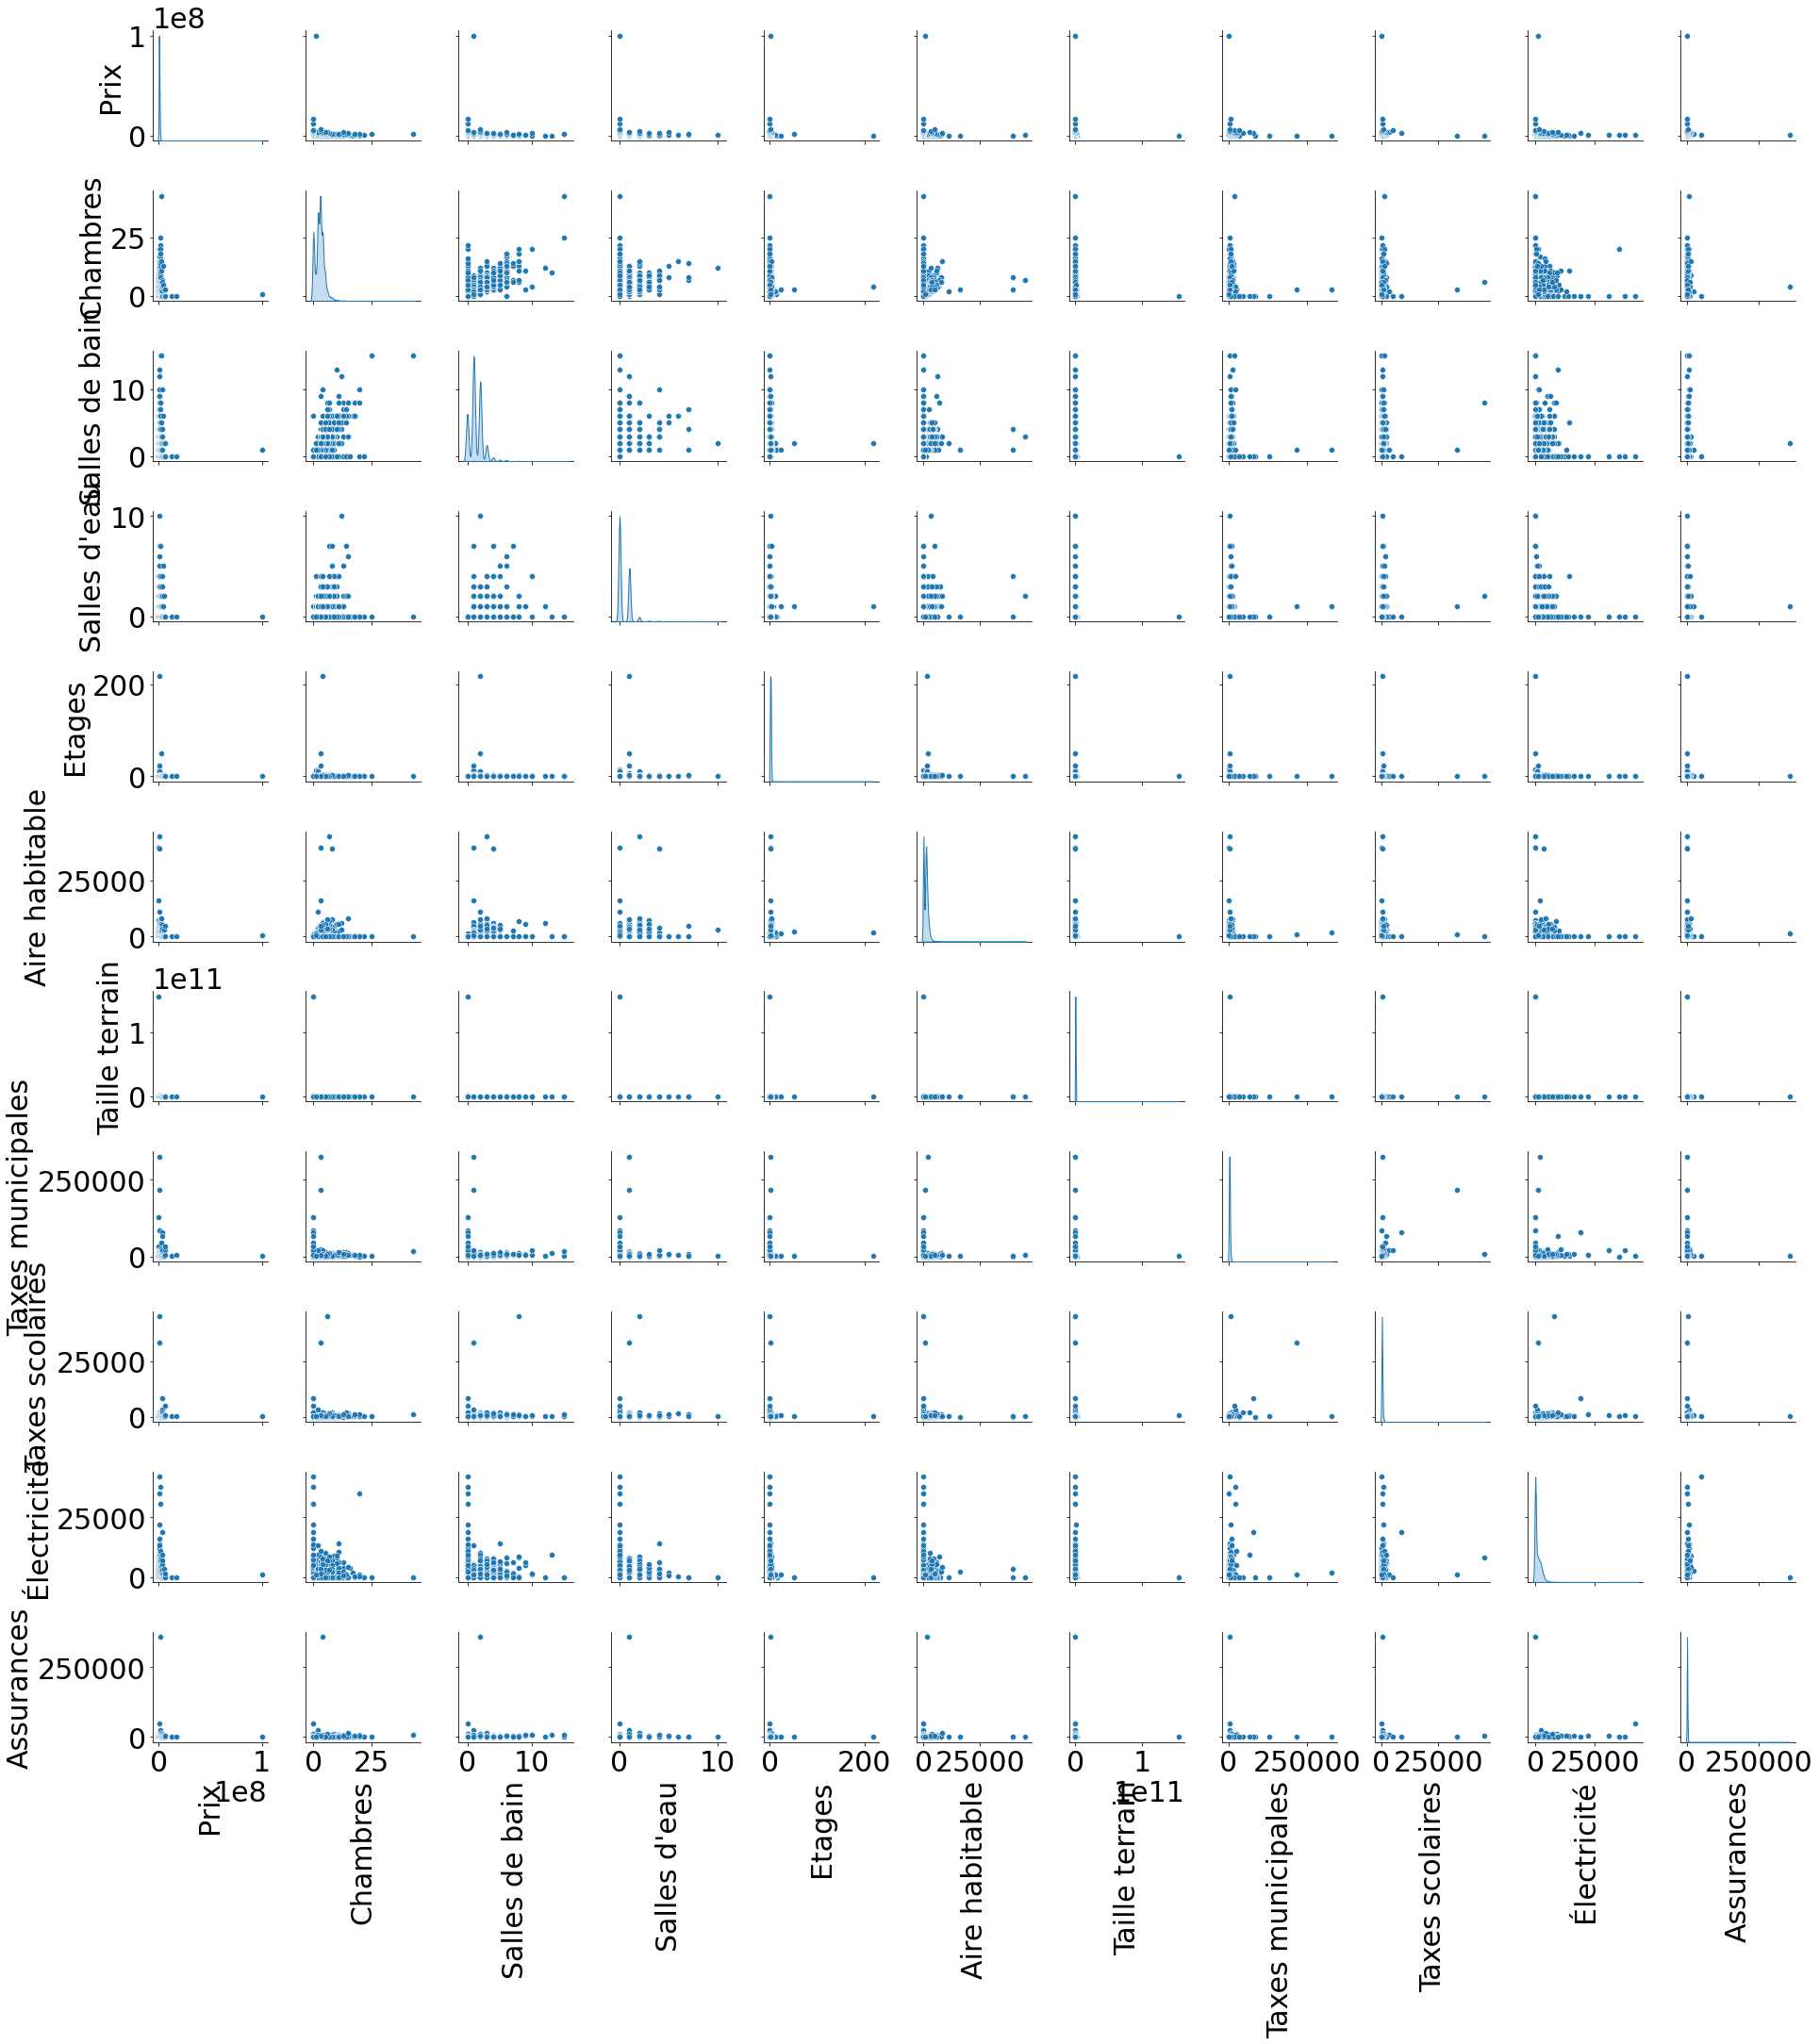

In [242]:
plt.figure(figsize=(25,25))

g = sns.pairplot(dfimmob , diag_kind='kde')

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 90)

plt.show()


In [243]:
dfimmob.head()

Adrresse  Prix           Ville                Region  \
0     chemin des Chatons  0.25         Lantier           Laurentides   
1       chemin Lamoureux  0.25    Ste-Julienne            Lanaudière   
2  route de la Normandie  0.25       Montmagny  Chaudière-Appalaches   
3          chemin Keenan  0.48       Melbourne                Estrie   
4   route de la Traverse  0.64  Lac-Aux-Sables              Mauricie   

   Chambres  Salles de bain  Salles d'eau  Etages  Aire habitable  \
0         0               0             0       0             0.0   
1         0               0             0       0             0.0   
2         0               0             0       0             0.0   
3         0               0             0       0             0.0   
4         0               0             0       0             0.0   

   Taille terrain  Taxes municipales  Taxes scolaires  Électricité  \
0      3700000.00        2713.081749       292.642646          0.0   
1      1429232.03        3433.780767       316.747444          0.0   
2        34000.00         400.000000       262.786954          0.0   
3      3280068.00        3092.640687       282.421691          0.0   
4       150500.00        3806.888029       300.749520          0.0   

    Assurances  
0  1399.706347  
1  1483.170519  
2  1400.240449  
3  1531.215061  
4  1678.386000

In [244]:
def delete_outliers(df,column):#fonction pour supprimer les valeurs aberrantes
#  df.reindex()
 df.reset_index(drop=True, inplace=True)
 q1 = np.percentile(df[column], 25,interpolation = 'midpoint')
 q3 = np.percentile(df[column], 75,interpolation = 'midpoint')
 iqr = q3 - q1
 print("Dimension du dataframe avant la suppression des valeurs aberrantes de la colonne:",column,"est"  ,df.shape) #dimension avant la suppression des valeurs abberantes
 
 upper = np.where(df[column] >= (q3+1.5*iqr))
 lower = np.where(df[column] <= (q1-1.5*iqr))
 

 df.drop(upper[0], inplace = True)
 df.drop(lower[0], inplace = True)
#  condition = ~((df[column] < (q1 - 1.5 * iqr)) | df[column] > (q3 + 1.5 * iqr)).any(axis=1)

# # Filter our dataframe based on condition
#  df = df[condition]
  
 print("Dimension du dataframe apres la suppression des valeurs aberrantes de la colonne:",column,"est"  ,df.shape) #dimension apres la suppression des valeurs abberantes
    

In [245]:
#suppression des outliers 
delete_outliers(dfimmob,'Prix') 
delete_outliers(dfimmob,'Chambres')
delete_outliers(dfimmob,'Salles de bain')

delete_outliers(dfimmob,"Salles d'eau")
delete_outliers(dfimmob,'Etages')
delete_outliers(dfimmob,'Aire habitable')

delete_outliers(dfimmob,"Taille terrain")
delete_outliers(dfimmob,'Taxes municipales')
delete_outliers(dfimmob,'Taxes scolaires')

Dimension du dataframe avant la suppression des valeurs aberrantes de la colonne: Prix est (6197, 14)
Dimension du dataframe apres la suppression des valeurs aberrantes de la colonne: Prix est (5881, 14)
Dimension du dataframe avant la suppression des valeurs aberrantes de la colonne: Chambres est (5881, 14)
Dimension du dataframe apres la suppression des valeurs aberrantes de la colonne: Chambres est (5695, 14)
Dimension du dataframe avant la suppression des valeurs aberrantes de la colonne: Salles de bain est (5695, 14)
Dimension du dataframe apres la suppression des valeurs aberrantes de la colonne: Salles de bain est (5643, 14)
Dimension du dataframe avant la suppression des valeurs aberrantes de la colonne: Salles d'eau est (5643, 14)
Dimension du dataframe apres la suppression des valeurs aberrantes de la colonne: Salles d'eau est (5627, 14)
Dimension du dataframe avant la suppression des valeurs aberrantes de la colonne: Etages est (5627, 14)
Dimension du dataframe apres la supp

# 4.4 Algorithmes de regression (6pts) :


1. Dans la matrice de corr´elation pr´esent´ee ci-dessus, identifier 2 variables
differentes qui ont le plus haut coefficient de correlation. Concevez un
mod`ele de regression lin´eaire dont l’une des valeurs est `a pr´edire et l’autre
est la valeur d’entree. Le mod`ele de r´egression construit n’est autre qu’une
droite. Vous devez repr´esenter cette droite dans un graphique, ainsi que
les points de donn´ees qui repr´esentent les 2 variables. Est-ce que la droite
telle que pr´esent´ee sur votre graphique fait une bonne approximation de
vos points/donn´ees? V´erifier votre r´eponse avec les donn´ees de test

In [246]:
y = dfimmob['Chambres'].values 
X = dfimmob["Salles de bain"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) #diviser les données

In [247]:

reg = LinearRegression()

In [248]:
#modification de dimension des données
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

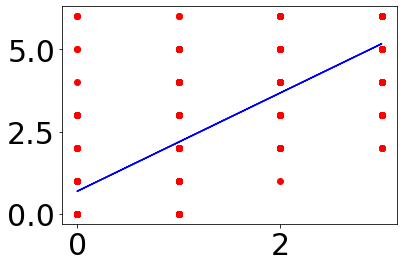

In [249]:
reg.fit(X_train,y_train) #entrainer le modele 

plt.scatter(X_train,y_train,color='r') #vérifier la linearité avec les données d'entrainement
plt.plot(X_train,reg.predict(X_train),color='b')
plt.show()

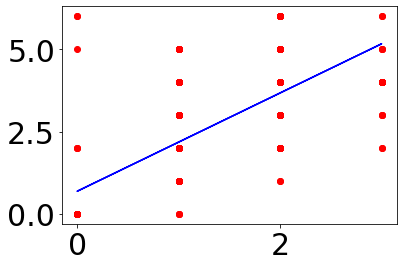

In [250]:
plt.scatter(X_test,y_test,color='r') #vérifier la linearité avec les données de test
plt.plot(X_train,regre.predict(X_train),color='b')
plt.show()

In [251]:
y_pred = reg.predict(X_test) #appliquer le modéle sur les données de test

In [252]:
errors = mean_squared_error(y_test, y_pred) #Erreur quadratique moyenne
errors

1.0614513787982325

In [253]:
r2 = r2_score(y_test, y_pred) #erreur R2
print('r2 score est:    ', r2)

r2 score est:     0.5073881740108948


2. Dans cette question, on s’interesse a predire si le prix d’une annonce sera superieur ou inferieur a 350000$ en fonction de la r´egion, du nombre de chambres, le nombre de salles de bain, le nombre de salles d’eau, le nombre d’´etages, la superficie de l’aire habitable, la taille du terrain, les taxes municipales et les taxes scolaires. Concevez un mod`ele de regression qui permet de faire cette prediction et evaluer votre modele.

In [254]:
df_reg2 = dfimmob.drop(['Adrresse','Ville','Électricité','Assurances'],axis=1) #supprimer les colonnes qu'on ne va pas utiliser

In [255]:
df_reg2

Prix                          Region  Chambres  Salles de bain  \
0           1.0         Saguenay-Lac-Saint-Jean         0               0   
1           1.0                      Lanaudière         0               0   
2           1.0  Montérégie (Rive-Sud Montréal)         3               1   
3           1.0                Québec Rive-Nord         0               0   
4           1.5         Saguenay-Lac-Saint-Jean         0               0   
...         ...                             ...       ...             ...   
4649  1149900.0                     Laurentides         3               2   
4650  1150000.0  Montérégie (Rive-Sud Montréal)         2               1   
4652  1150000.0                     Laurentides         4               2   
4654  1150000.0                      Charlevoix         4               3   
4655  1157240.0  Montérégie (Rive-Sud Montréal)         0               0   

      Salles d'eau  Etages  Aire habitable  Taille terrain  Taxes municipales  \
0                0       0             0.0        23000.00        3083.770654   
1                0       0             0.0        40000.00        3433.780767   
2                0       1           700.0        10375.00        1194.860000   
3                0       0             0.0        10500.00        3203.917690   
4                0       0             0.0        35000.00        3083.770654   
...            ...     ...             ...             ...                ...   
4649             1       1          1729.0        21959.00        2713.081749   
4650             1       2          1400.0        16691.00        2990.902470   
4652             1       2           153.6        10794.05        3691.000000   
4654             0       2          3024.0        41802.00        1414.300000   
4655             0       0             0.0        57861.00        2990.902470   

      Taxes scolaires  
0          309.958636  
1          316.747444  
2          138.600000  
3          331.835161  
4          309.958636  
...               ...  
4649       292.642646  
4650       371.283018  
4652       462.000000  
4654       142.500000  
4655       371.283018  

[4478 rows x 10 columns]

In [256]:
labelencoder = LabelEncoder()
df_reg2['Region_encoded'] = labelencoder.fit_transform(df_reg2['Region'])#convertir la colonne region vers des valeurs numériques


In [257]:
d1 = df_reg2.drop_duplicates('Region').set_index('Region')
d1 = d1[['Region_encoded']] #savoir le nombre de chaque region
d1

Region_encoded
Region                                        
Saguenay-Lac-Saint-Jean                     19
Lanaudière                                   8
Montérégie (Rive-Sud Montréal)              13
Québec Rive-Nord                            17
Chaudière-Appalaches                         4
Bas-Saint-Laurent                            1
Laurentides                                  9
Centre-du-Québec                             2
Mauricie                                    11
Montérégie Ouest                            14
Outaouais                                   15
Laval                                       10
Charlevoix                                   3
Gaspésie-Îles-de-la-Madeleine                7
Estrie                                       6
Côte-Nord                                    5
Portneuf                                    16
Abitibi-Témiscamingue                        0
Québec Rive-Sud (Lévis)                     18
Montréal / l'Île                            12

In [258]:
df_reg2 = df_reg2.drop(['Region'],axis=1) #supprimer la colonne categorique Region

In [259]:
df_reg3 = df_reg2.copy() #faire une copie de la dataframe pour l'utiliser 

In [260]:

df_reg3['Prix'] = np.where(df_reg3['Prix'] > 350000, 1,0) #covertir les prix plus de 350000 en 1 et moins à 0

In [261]:
X1 = df_reg3.drop('Prix',axis=1) 
y1 = df_reg3["Prix"].values #colonne cible

In [262]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.15, random_state=42) #split des données 
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)

In [263]:
model1 = sm.OLS(y_train1,X_train1).fit() #entrainer le modéle
y_pred1 = model1.predict(X_test1) #tester le modéle 

In [264]:
y_pred1 = np.where(y_pred1 > 0.5, 1, y_pred1)#on remplace les valeures plus de 0.5 par 1 
y_pred1 = np.where(y_pred1 <= 0.5, 0, y_pred1)#on remplace les valeures moins de 0.5 par 0 

In [265]:
accuracy_score(y_test1, y_pred1) #exactitude 

0.7395833333333334

3. Dans cette question, on s’interesse a predire le prix d’une annonce en fonction de la region, du nombre de chambres, le nombre de salles de bain, le nombre de salles d’eau, le nombre d’´etages, la superficie de l’aire habitable, la taille du terrain, les taxes municipales et les taxes scolaires.
Concevez un modele de regression qui permet de faire cette prediction et evaluer votre modele.

In [267]:
df_reg2

Prix  Chambres  Salles de bain  Salles d'eau  Etages  \
0           1.0         0               0             0       0   
1           1.0         0               0             0       0   
2           1.0         3               1             0       1   
3           1.0         0               0             0       0   
4           1.5         0               0             0       0   
...         ...       ...             ...           ...     ...   
4649  1149900.0         3               2             1       1   
4650  1150000.0         2               1             1       2   
4652  1150000.0         4               2             1       2   
4654  1150000.0         4               3             0       2   
4655  1157240.0         0               0             0       0   

      Aire habitable  Taille terrain  Taxes municipales  Taxes scolaires  \
0                0.0        23000.00        3083.770654       309.958636   
1                0.0        40000.00        3433.780767       316.747444   
2              700.0        10375.00        1194.860000       138.600000   
3                0.0        10500.00        3203.917690       331.835161   
4                0.0        35000.00        3083.770654       309.958636   
...              ...             ...                ...              ...   
4649          1729.0        21959.00        2713.081749       292.642646   
4650          1400.0        16691.00        2990.902470       371.283018   
4652           153.6        10794.05        3691.000000       462.000000   
4654          3024.0        41802.00        1414.300000       142.500000   
4655             0.0        57861.00        2990.902470       371.283018   

      Region_encoded  
0                 19  
1                  8  
2                 13  
3                 17  
4                 19  
...              ...  
4649               9  
4650              13  
4652               9  
4654               3  
4655              13  

[4478 rows x 10 columns]

In [268]:
X2 = df_reg2.drop('Prix',axis=1)
y2 = df_reg2["Prix"].values 


In [269]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.15, random_state=42) #diviser les données


In [270]:
model2 = sm.OLS(y_train2,X_train2).fit() #entrainer le modéle
y_pred2 = model2.predict(X_test2) #faire des prédictions sur les données du test

In [273]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              3892.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                        0.00
Time:                        18:57:00   Log-Likelihood:                         -50814.
No. Observations:                3806   AIC:                                  1.016e+05
Df Residuals:                    3797   BIC:                                  1.017e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Chambres            1.43e+04   2714.702      5.266      0.000    8973.875    1.96e+04
Salles de bain     6.927e+04   5341.055     12.970      0.000    5.88e+04    7.97e+04
Salles d'eau       2.766e+04   5372.396      5.149      0.000    1.71e+04    3.82e+04
Etages             1.173e+04   4311.348      2.720      0.007    3273.280    2.02e+04
Aire habitable       49.3224      4.921     10.023      0.000      39.675      58.970
Taille terrain        0.0453      0.173      0.262      0.793      -0.294       0.385
Taxes municipales    41.6859      3.180     13.111      0.000      35.452      47.920
Taxes scolaires     482.7913     25.052     19.272      0.000     433.675     531.908
Region_encoded    -1918.2820    456.248     -4.204      0.000   -2812.797   -1023.767
==============================================================================
Omnibus:                      289.079   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.163
Skew:                           0.596   Prob(JB):                     7.94e-98
Kurtosis:                       4.183   Cond. No.                     4.50e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. Le couple Formidable aimerait vendre 2 de ses propri´et´es. En vous servant de votre mod`ele construit ci-dessus, `a combien est estim´e le prix de vente
de chacune des deux propri´et´es ?

In [274]:
couple_formidable = [3,2,1,2,1700.2,5060,4272.39,411.06,17] #quebec rive nord est encodé en 17
prediction = model2.predict(couple_formidable)
prediction

array([660582.39376479])

In [275]:
couple_formidable2 = [0,0,0,0,0,8021.06,2324.75,65.59,9] #Laurentides est encodé en 9
prediction2 = model2.predict(couple_formidable2)
prediction2

array([111674.58359983])

5. Sans toutefois impl´ementer, pensez-vous que rajouter la ville dans vos 2 derniers modeles de regression concue ameliorerait la pr´ediction ? Justifiez votre reponse (un graphique ou un calcul).

In [276]:
df_reg4 = dfimmob.copy()
labelencoder = LabelEncoder()
df_reg4['encoded_Ville'] = labelencoder.fit_transform(df_reg4['Ville']) #transformer les villes en forme numériques

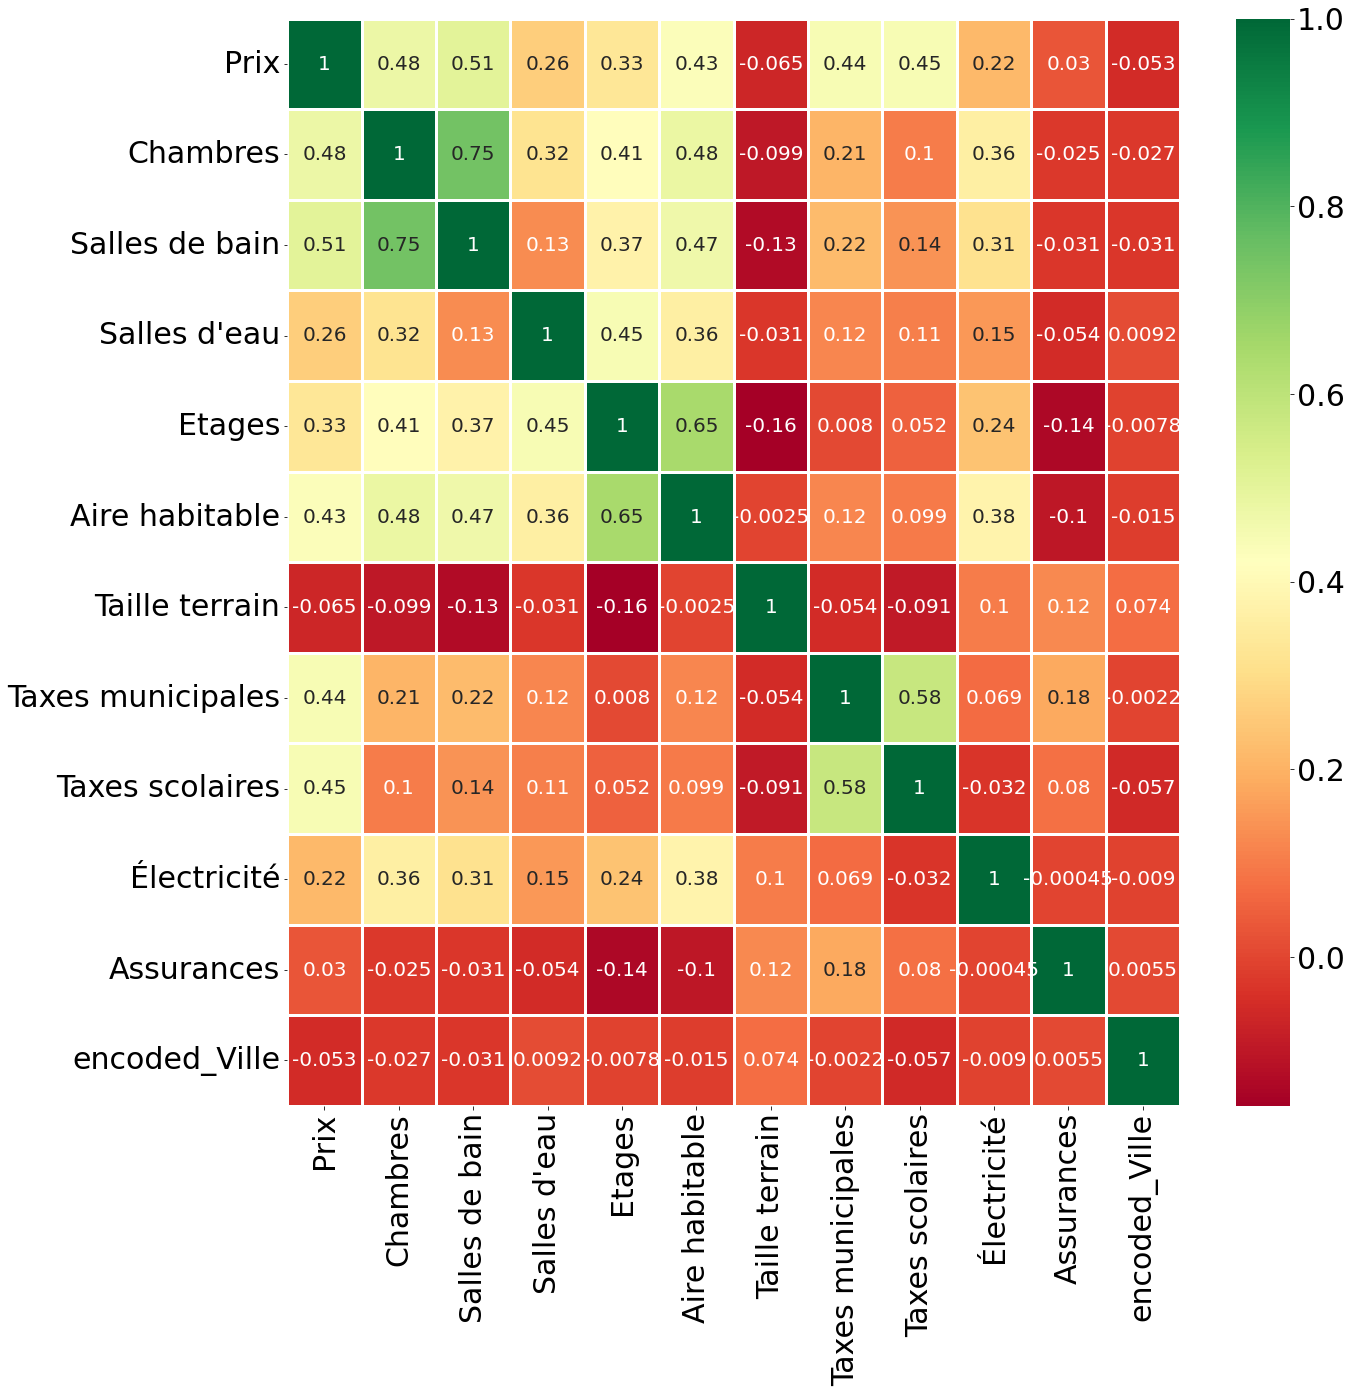

In [277]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df_reg4.corr(),annot=True,cmap='RdYlGn',linewidths=1.2,annot_kws={'size':20}) #matrice de correlation
plt.show()

Colonne numero: 0, Score: 15598.72882
Colonne numero: 1, Score: 69528.13869
Colonne numero: 2, Score: 26057.51922
Colonne numero: 3, Score: 15414.89611
Colonne numero: 4, Score: 45.81174
Colonne numero: 5, Score: 0.33462
Colonne numero: 6, Score: 44.08802
Colonne numero: 7, Score: 473.16393
Colonne numero: 8, Score: 2.65525
Colonne numero: 9, Score: 3.24216
Colonne numero: 10, Score: -25.60469


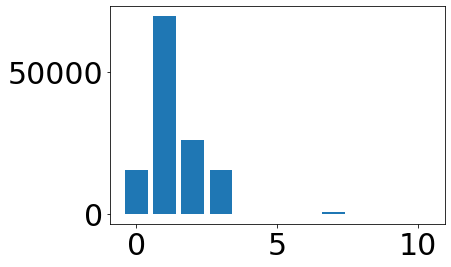

In [278]:
x5= df_reg4.drop(['Prix','Adrresse','Region','Ville'],axis=1)
y5= df_reg4["Prix"].values
 
model5 = LinearRegression() #utiliser la régression lineaire pour calculer l'importance des colonnes
model5.fit(x5, y5)
importance = model5.coef_
for i,v in enumerate(importance):
    print('Colonne numero: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()